In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [69]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30


In [11]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [12]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [15]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [16]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,166,179,188,188,207,220,228,252,260,310
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,356,385,394,403,410,422,431,455,470,488
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,309,333,344,344,344,385,398,423,468,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,11


In [17]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-01-2020.csv')

In [18]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-02 02:32:27,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-02 02:32:27,30.295065,-92.414197,133,10,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-02 02:32:27,37.767072,-75.632346,303,5,0,298,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-02 02:32:27,43.452658,-116.241552,681,16,0,665,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-02 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [19]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20',
       '4/28/20', '4/29/20', '4/30/20', '5/1/20'],
      dtype='object', length=105)

In [20]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [21]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,782
2,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,745
4,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,30
5,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,25
6,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532
7,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,2148
8,0,0,0,0,0,0,0,0,0,0,...,104,104,105,106,106,106,106,106,106,106
9,0,0,0,0,3,4,4,4,4,4,...,2971,2976,2982,2994,3002,3004,3016,3016,3025,3030


In [251]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
india_recoveries = []

In [252]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum()) 
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum()) 
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum()) 
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [36]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [213]:
world_daily_increase = []
china_daily_increase = []
italy_daily_increase = []
us_daily_increase = []
spain_daily_increase = []
france_daily_increase = []
germany_daily_increase = []
uk_daily_increase = []
india_daily_increase = []

In [214]:
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [46]:
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [47]:
india_daily_death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69]

In [49]:
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [50]:
india_daily_recovery

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939]

In [65]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Australia',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala

In [68]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
        unique_countries.remove(i)


unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1),reverse=True)]
   
for i in range(len(unique_countries)):
        country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
        country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
        country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
        country_active_cases.append(country_confirmed_cases[i]-country_death_cases[i]-country_recovery_cases[i])
        country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [73]:
country_df = pd.DataFrame({'Country Name' : unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                         'Number of deaths':country_death_cases,'Number of Recoveries':country_recovery_cases, 'Number of active cases':country_active_cases,
                          'Mortality Rate': country_mortality_rate})

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of deaths,Number of Recoveries,Number of active cases,Mortality Rate
0,US,1103461,64943,164015,874503,0.0588539
1,Spain,213435,24543,112050,76842,0.114991
2,Italy,207428,28236,78249,100943,0.136124
3,United Kingdom,178685,27583,892,150210,0.154367
4,France,167305,24628,51124,91553,0.147204
5,Germany,164077,6736,126900,30441,0.0410539
6,Turkey,122392,3258,53808,65326,0.0266194
7,Russia,114431,1169,13220,100042,0.0102158
8,Iran,95646,6091,76318,13237,0.0636827
9,Brazil,92202,6412,38039,47751,0.069543


In [74]:
unique_provinces = list(latest_data['Province_State'].unique())

In [81]:
unique_provinces

['New York',
 'New Jersey',
 'Hubei',
 'Massachusetts',
 'Illinois',
 'California',
 'Pennsylvania',
 'Michigan',
 'Florida',
 'Texas',
 'Connecticut',
 'Louisiana',
 'Quebec',
 'Georgia',
 'Maryland',
 'Ohio',
 'Indiana',
 'Ontario',
 'Virginia',
 'Colorado',
 'Washington',
 'Tennessee',
 'North Carolina',
 'Rhode Island',
 'Missouri',
 'Arizona',
 'Iowa',
 'Wisconsin',
 'Alabama',
 'Mississippi',
 'South Carolina',
 'Minnesota',
 'Alberta',
 'Nevada',
 'Nebraska',
 'Delaware',
 'Kentucky',
 'Utah',
 'District of Columbia',
 'Kansas',
 'Oklahoma',
 'New Mexico',
 'Arkansas',
 'New South Wales',
 'Oregon',
 'South Dakota',
 'New Hampshire',
 'British Columbia',
 'Idaho',
 'Guangdong',
 'Puerto Rico',
 'Victoria',
 'Henan',
 'Zhejiang',
 'West Virginia',
 'Maine',
 'North Dakota',
 'Hong Kong',
 'Queensland',
 'Hunan',
 'Anhui',
 'Nova Scotia',
 'Heilongjiang',
 'Jiangxi',
 'Vermont',
 'Shandong',
 'Jiangsu',
 'Shanghai',
 'Hawaii',
 'Beijing',
 'Chongqing',
 'Wyoming',
 'Sichuan',
 'We

In [86]:
province_confirmed_cases = []
province_death_cases = []
province_active_cases = []
province_recovery_cases = []
province_mortality_rate = []
no_cases = []
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
        unique_provinces.remove(i)


unique_provinces = [k for k,v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1),reverse=True)]

for i in range(len(unique_provinces)):
        province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
        province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
        province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
        province_active_cases.append(province_confirmed_cases[i]-province_death_cases[i]-province_recovery_cases[i])
        province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])
    

In [88]:
province_df = pd.DataFrame({'province Name' : unique_provinces, 'Number of Confirmed Cases': province_confirmed_cases,
                         'Number of deaths':province_death_cases,'Number of Recoveries':province_recovery_cases, 'Number of active cases':province_active_cases,
                          'Mortality Rate': province_mortality_rate})

province_df.style.background_gradient(cmap='Reds')

,province Name,Number of Confirmed Cases,Number of deaths,Number of Recoveries,Number of active cases,Mortality Rate
0,New York,308314,24039,0,284275,0.0779692
1,New Jersey,121190,7538,0,113652,0.0621999
2,Hubei,68128,4512,63616,0,0.0662283
3,Massachusetts,64311,3716,0,60595,0.0577817
4,Illinois,56055,2457,0,53598,0.043832
5,California,52026,2126,0,49900,0.0408642
6,Pennsylvania,49579,2635,0,46944,0.0531475
7,Michigan,42356,3866,0,38490,0.091274
8,Florida,34728,1314,0,33414,0.0378369
9,Texas,29692,840,0,28852,0.0282904


In [89]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

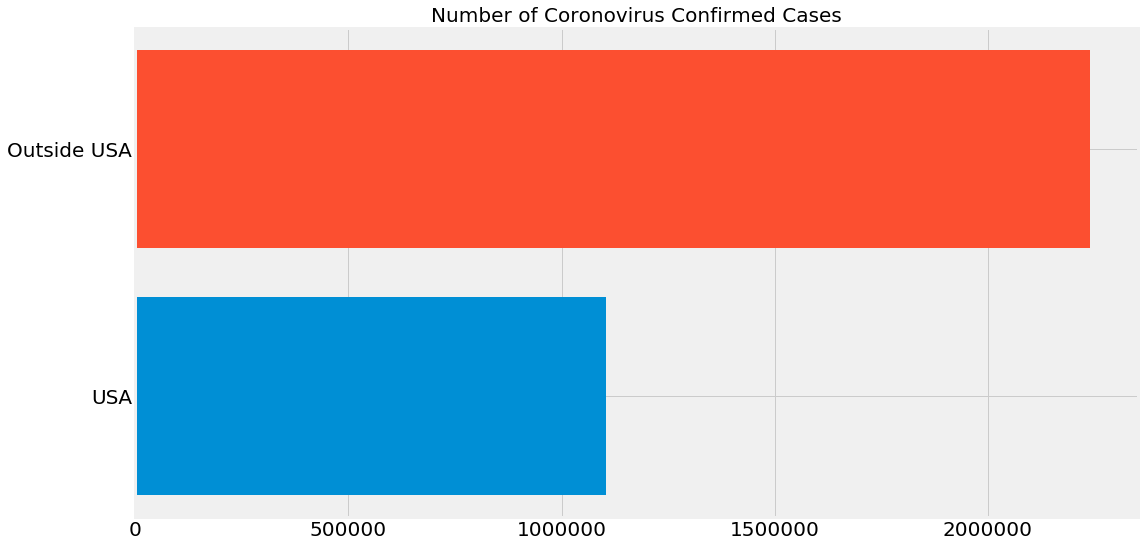

In [90]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16,9))
plt.barh('USA',USA_confirmed)
plt.barh('Outside USA',outside_USA_confirmed)
plt.title('Number of Coronovirus Confirmed Cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [92]:
print('Outside USA {} cases'.format(outside_USA_confirmed))
print('USA: {} cases'.format(USA_confirmed))
print('Total: {} cases'.format(USA_confirmed+outside_USA_confirmed))

Outside USA 2240316 cases
USA: 1103461 cases
Total: 3343777 cases


In [93]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i]);
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [94]:
def plot_bar_graphs(x,y,title):
    plt.figure(figsize=(16,9))
    plt.barh(x,y)
    plt.title(title,size=20)
    plt.xticks(size = 20)
    plt.yticks(size=20)
    plt.show()

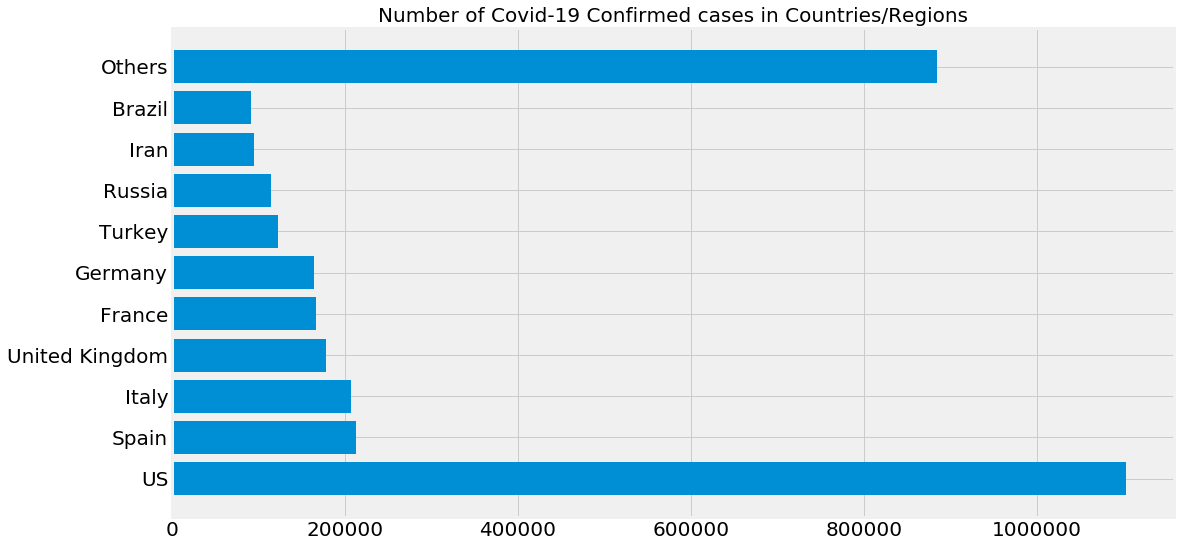

In [97]:
plot_bar_graphs(visual_unique_countries,visual_confirmed_cases,'Number of Covid-19 Confirmed cases in Countries/Regions')

In [101]:
def plot_pie_charts(x,y,title):
    c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title,size=20)
    plt.pie(y,colors=c)
    plt.legend(x,loc='best',fontsize=15)
    plt.show()

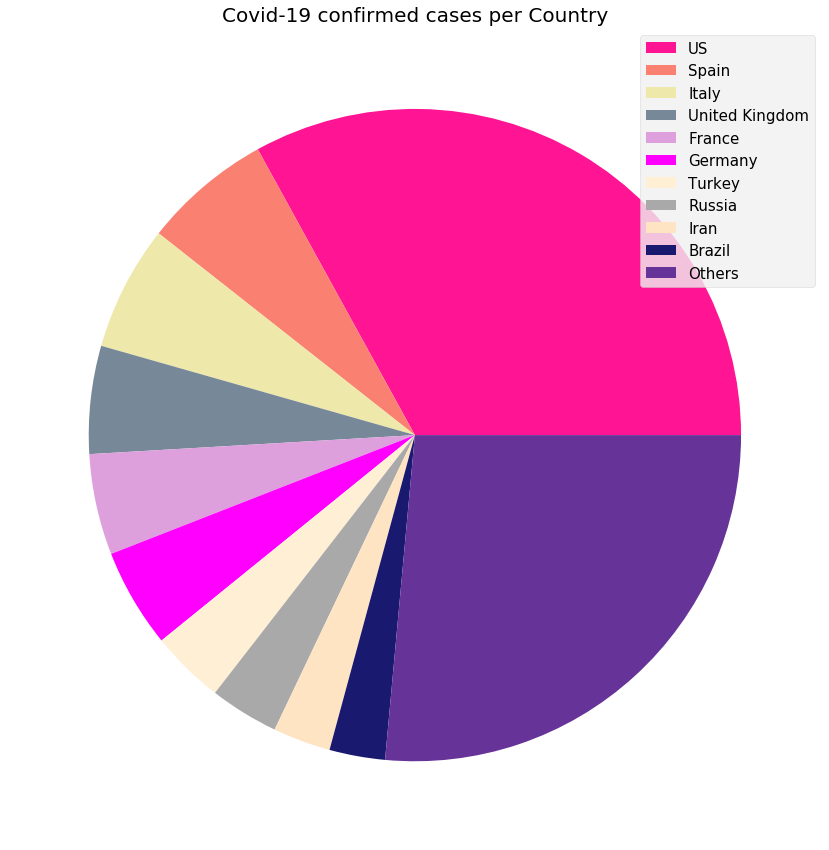

In [103]:
plot_pie_charts(visual_unique_countries,visual_confirmed_cdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAz0AAANSCAYAAABPyqD6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3XlcFPX/B/DXZxcQOXRhHS5RAUXFi5Q8Un+eqYmWmldpFqWmX8XqG+VdRqV5ZIftV8lMzeurZqWlmfk1y6xvfUuzslS8RUUuBeRe2Pn9MbO6rIscAgvr6/l4zGPZmc/MvGf2YN77OUbIsgwiIiIiIiJHpbF3AERERERERFWJSQ8RERERETk0Jj1EREREROTQmPQQEREREZFDY9JDREREREQOjUkPERERERE5NCY9RHQLIYQshPi2HOV7qeu8UnVROT4hRKgQ4jMhxBX1fKar819Rn/eyc4iVRggRpR5TlL1jISIix8ekh6gGEEK0FEK8J4Q4KoTIEEIUCCEuCyF2CSHGCyFc7R1jZRNC6IQQLwohNgoh/hZCFKoXwfeXsl64EGKLmhgUCCEShBAfCCEaVlfsVUEIoQWwHUAkgJ0AYgEstGtQROUghHAXQjwnhPhGCJGsfj7ThRD/E0LMF0KE2DvGsijvjz5EVDs42TsAorudEOJlAPOg/AjxE4CPAGQB8AXQC8AqAP8AcG81hhUGIKeK9xEEYLH690UAqVCOuURCiEgAnwFwBvAFgHgALQCMB/CQEKKbLMunqirgKhYMoBWAD2RZftpqmQHAZgAXqj0qojIQQnQBsA1AQyif5y8BXAbgDqA9gBkAXhRCdJFl+bDdAiWiuxaTHiI7EkLMhvKLfgKAkbIs/2yjzGAAMdUZlyzLx6thN+cB3A/gN1mWrwoh1gJ4oqTCam3XhwBcAAyXZflTi2UjAWyFkiD2qsKYq1KA+njZeoEsy6lQkkKiGkcI0RLAHgAeAGYCWCrLcqFVmWAAiwDUq/4IiYjYvI3IboQQQQBeAWAEEGkr4QEAWZZ3AnjAxvqjhBAH1OZwuUKIP4UQs4QQdSzKuKrNS5KFEDZ/5BBCxKnNOQZZzLPZvEMI4SuE+FAIkaTu84gQosRE5XZkWb4my/I+WZavlnGVrgD8APxqmfCo2/oYwCEAPYUQbcsagxDCTQgxQwjxqxDiuhAiSwhxTAixTAjha1XWXwjxLyHEObXZTooQ4lMhRISN7d7oryKE6C2E+FbdfqbaZDHMqrwM4Dv16Tx13Rt9pErq02N+nYQQfkKIVUKIS0KIInM/GSHEWrVMsBAiWm1GmKcew2whhFDLjVSbIGWr7xVDSU0q1aaYa9Vmhfnqe2GTEKJFCeWbCSE+FkJcU7f/o+V7rTyEEFohxGQhxA8W7/tT6rGHWpQLEEK8rJYzN4O8rMYZVsK2HxJC7BNCJKrHdVkI8Z0QYoqNst5CiDfU90quGss+IUR/G2VdhBDPCCEOq+cgRz3/O0QpTTkttmF+HUOEEM8LIY6rr+NFIcTbQgibiYQQIlB9Lc+ox5QmhPhcCNHRRtkb7zEhxBghxM/q5+FcGUJ8D0oys0iW5UXWCQ8AyLJ8VpblUQD+a7XfUCHEOvW9a36d1lm+njbOQ5CNZTb7FaqfD1kI4aS+50+q5yJBCLFICOFiUTZKKJ9FQPkukcWtn8Ug9flaIURzoTS1TRZCmNQYfhLKZ/CWGNX1X1DXr9YfsoiINT1E9vQklGZam2VZPnq7grIs51s+F0IsADALyq//m6A0hxsIYAGAAUKIfrIsG2VZzhNCbAHwtLr8C6vt1AEwCkASlF9qSySE0AP4EUAIgIPq5A8gDsDXZTngO+SnPp4pYfkZABEA+gL4s7SNCSG8AOwHEA7gBIDVAAoANAXwFIBPoZwX86/UB6HUxnwD4N8AGgEYCWCQEGK4mpxaGwxgCIDdUM5TKyh9djoKIVqpNTiAUtsXBKWm6zsA36rzv0XpvKE0i8xSYzaZ47bwJpQasC+gvFYPAZgPwEUIcRVK36HtAL4H0A/AVABaKM0qbxBCPKDuw9y88BSAQAAPq+eht2XTJfXC9b8A9Oo5OAKgmbqv3WU4Nst9uwDYBaV2MAHK+z4TynkbBuX1OakW7wGlxmE/gE/UcxMKYARuNoP83WLbTwN4H8AV9bhSAfgAaAflc7rcomwTKK9LkHq+voLShGswgK+EEJNkWf7AIvS1AB4FcBTAOgC5UN5H3aH8mPGfcpyGt9Vj2wpgB4ABAJ4D8H9CiO6yLOdZxNkBymvtDeWz/SmABgCGAjgohBgmy/KXNvYRA+U98AWU81f/dgGpn437AeThZnPVEll+l6nJ138AeAL4HMDfAFoCGAtgiBCiryzLv5a2zTLaBOD/oLzvMqF8DqdDeZ2fVMscgfJZnAelJnqtxfrfWm2vKYCfoTSx3Qigrrrd5VCaKE8EMMdGHBMA5KtliKg6ybLMiRMnO0wA9gGQAUwo53r3qetdAOBnMd8JyoWKDGC2jfLbbGxrpLpsqdV8GcC3VvNWqvPftpp/L5TaKhnAK3dwPtaq27i/hOX91eX/K2H5r+ryuDLub5NafgUAjdUyTwD1LZ7vUcvOsSrXFUAhgDQAHhbzo9TyhQD6Wq3zhrpsutX8XiWdQyg1gjKAXjZeJxnKxbTTbc7pOQANLebroFzYZwNIARBmsawOlIvPfAA+FvO9AFxT12tltZ/WUBKLw1bzv1b3/6zV/CEWsUeV8fVaoJb/HEAdq2V1AEgWz30AeNrYRrga526r+Yesj9diWQOr599CSSwfsZqvg3LRnAvAV51XXy37KwCtjW3ry/nZSAXQxGK+BkpSJwN4yWK+E5SENA9AT6ttBQC4BCDR8jxavMeyAbQvx+d2nLrewbKuo64nABxT1x1rtWy0Ov84LD6bFuchyMb2esHG50d9vWT1Nfa2mO+unqMiWHyPWnyuvi0h7iCL9+4CG8vrqK9TIgDnEmLcWJ5zxYkTp8qZ2LyNyH781ceL5VzvKfXxdVmWr5hnykqTkhgoF1kTLOb/F8qvkQ8KIbyttmVumnbbXx2FEM5Qfn29DuXi6AZZ+SV2YzmPoSJ+gHLR3VEIMcQqvoeh1PIAysX5bQkhfKBcWCUCeEGWZZPlclmWr8uynKGWDYSScF2A1S/Zsiz/CKXWxxtKbYe1zbIs77Oat1J97FRanGVUAOUYbmlSZOE1WZYvmZ/IspwOJXlwA7BCluVjFsvyAWyB0nfKsinY41Au7OfJsvy35cZlWf4LwAcA2gshWgE3zls/AGehDMRgWX4HbjbnK5VQRrabAiWhmCxb1XzKspwvy3KKxfNkWZavW29HVmp3vgHQW31PWyqEkrxbr3OjL5UQIhxATwCfyLK82apcOpQaAlcAw82zoVzc50P5XFpvO62kYy7Bu7Isn7dY3wTgRXXbT1mUGwSlJuI9WZaLnWdZli9DeR/7QakVtbZSluXfyhFTRb/HukKp1fmvLMvFvj9kWd4CpeauBZQascowQ7ZoSivLcjaU7y0NKjZITBKUWqFi1PfmGijn9yGrxZPUx/crsD8iukNs3kZkP0J9lG9b6lYd1MdvrBfIshwvhLgIIFgIoVMvxAAlqZkP4BGoTXWE0mdlAJSBBP4oZZ8toVwgf29OBqx8C6tBCIQQQwHcY1XuiCzL20vZl02yLGcLIaZBqdX4VAhhHr2tOZSLiz+gNEcqKsPmOkK52DmgXvzcTnv18XtZlm+5KIbyOjymlltntcxW05wE9bHU5KyMzsmynFxKGVtxmAdMOGRjmTlBCrSYd5/6GG7db0LVXH0Mg1JTZD5vB2VZtvWafAslgSiLllBqTX5WL9pLJZR+Q5OhXNA2wK3/7xpASXoB5eJ3KYC/1Oag3wH4wTKRUpnPQf0SzoGkPoYBgCzLmer79EEAR4QQn0BpEvezLMsVGR3xlkRRluUzQogEAEEWn3lznE1KiNPcXyYMyihrlv5Xzpgq/XvMYn53KO+jA+Xcti2V/Vn83Tr5trACyg9Qk6DUxEEI0QBKM8xjsixXxvEQUTkx6SGyn8tQLuYCSytoxdzGPrGE5YkAGqvlzEnPOgCvQUlMzP0TxkL5DihL23LzPq37iphdsTFvKG4dje0jKP05KkSW5Y3qBd4MKH0bBkJpojINyq/dywGUlgAASo0FcPPi/nbKcr4tt2kp3XqGLMuFQhk/QFuGfZeFrXNvzVaiWliGZZa1IXr1cWIp+/JQHyvynilJeV4vCCGeAfAulJrBvVBq6XKgXJgPhdLM7caAH7IsvyWESIVSm/QMlH4yshDiOwAvyjf7lZjPQT91KomHxd+jobxfx+BmzUCeEGIblBq6ks6PLbc7l01w8zNvjnNkKdvzsDGvPK8LcDN5rorvMcD256rcLH4AsmR+n1fks1jieVIT0T1Q+lc2lWX5NJQmr3XAWh4iu2HSQ2Q/BwH0gdLE5MNyrGe+SPUDcNrGcn+rcpBl+aIQ4hsA9wshWsrKkNRPQGnOs6kc+yzpPjp+1jNkWY6C8o++Uqm/kt7yS6kQwpy8/VKGzZgvgMpyQ1PL823LLee7mpX3F/aKMh9feBlqBi3Ll/k9cxtlfr2EMkphLJSL0g6yLCdaLb/P1nqyLK8DsE4IoYPS9GoYlCZje4QQYWptmvmYnpVleVlZApdlORdKk9BXhBCNoCTrUVBqB4OgdK4vK18og25YM5/LDKvHIbIsf16O7QPlfz8dVB/vFULUL6Em2JaKfK7MTQRtXbtUSnJUDqWdpxVQBqqYCGVQjQlQ+lhZ1wYTUTVhnx4i+1kDJekYbu4HURJhMQw1AHN7+142yjWD8ovrWRu/bK5VH58QQtwDpSnYbhtNeGw5DuWX8nuEELZGc7olluqkjiw3DEqfoy9KKQ4oTXhMAHoIIdxLKWs+392F7WG/e6uPjn7DxZ/Ux7JepFueN1u/pPcqx76PQ0l82gkhAkop2wDKBfCPNhIeD9xsVmWTLMvpsix/KcvyRCifGW/cPObyngPrbSeo/VcGQBlprrv63i2rW5oDCiFCoIwkeM7iM39HcZaHLMtnoYzA5gqlf9FtWXyXlfg9ZjXf8nN1TX1sZKN8Zd682YQ7r4ndCaWG8UmhDGXeAsBWWZav3X41IqoqTHqI7ESW5XNQfgF2AbBLCGHzn7Y6TLDl8L6r1ce5QgjJopwWytDEGtiuOfoUypCqj+FmDczaMsZqhNLvwRNWAxmocY8ty3bulBDC08Y8DwAb1NhelWU5s7TtqIneZii/Jr8phCj2XSiE8DAnd7IsX4TSRCoISrMny3KdoTRbugbgswocUm2yBkriMU8IccsgDEIIjbC4j5DFeQsGEG1VdgjK3p8Hap+g5VCGBY6z+hHAfC8c82chGUqCHqG+N8xlnKE0eWtgI/YHSkhofdTHHDWOX6H0yXlYCPGUjfIQQrRVB8qAEEJS3yPW3KG8XwuhDERRVs+qQ2ab96UBsATKZ36NRbkdUGqBpwohIkuI8z4hhFs59n0706B8t8wSQsTYOpdCiMZCiM242d/oByi1Vt2FECOsyo6AUiMWj5s1ScDN/kYTrcq3BfBsZRyIKg22E6syUweZWAnlPWT+zo67w7iI6A6weRuRHcmyvEC9QJgH4BchxI9QOtxmQWnK0gNKp+NfLdb5UQixGMo9Jo6qfQOyofRvaQPlImGJjX3lCiE+BjAeSt+FNCj3PSmr2VCa4j2nJjrm+/SMhtIZ2nqkolIJId7EzYtQ8yhNLwohHlP/3m418METQrmp37dQ2vxLUDqJ+0IZPeytcuw+Gsr5mgygl9oGvwDKRfoA9Xi+VctOhnKRtkT91fZX3LxPjwnAk7ZGC3MksiynqRejnwH4SQixD8BfUI6/MZSLWT2UX/zNpkK5T8876nn7Hcp9eoZBqZF7sBwhxALorK4TL4TYCaVmrxGU0fVeBLBWlmWTEGIZlCZFfwohdkD5YaE3lFqb/bhZO2e2GUo/m4NQhvcWUGpJOkIZ6MHyXjpjoHSy/1DtO/QzlGQwEErtaRv1XCRDaY73kxDiGJQaiwQoN/EcDKVZ17Jyvm9+gDIgwhYozb4GQOmfdAgWIwvKsmxURzTcA+UHlR+hDKedo56vjlDut+WvzrsjsiwfF0IMgNJp/00oydk+KP193NUYu0FpErZIXUcWyo2N9wLYor5Ox6HUiAyF8to+bjWy4g4oNWSPqqMD/gzlvTdEXTbqTo9FtQ/AI+ogFIegJKcHKjAAwSoAL0N5H/ypjqRJRPZyp2Nec+LE6c4nKKMovQflBoaZUC6+E6HU8IyH1X1J1HUegZJ4XIfSVvwvKDfDc73Nfrrj5j0m3rtNOZv3qYByobYayr1dcqFcSEXhNveYKeW4z1nEY2t6xap8FygJVqJ6jtKg3BxySAXPu7t6zv6AcvF3HcrIY+/A6p4tUC5cVkC5aWEBlHtxbAfQ0cZ2o3Cbe9DYOr+3O4e4/X16bnmdLJavRcn3NbG5zdLih1LjZYBy8Zmnvl+PA1gPYKiN8s0AbIOSGGRDSYIGlXaOSjgeJyjJ6v+g/DCQrcaxEkAzq3LPq69lLpT+PeuhdPa/5ZxASWo/g3KD2xwAV6E0v5oO2/f78YTyI8AhNY5cKENz74JyI2B3tZwOykXvN1AGYchX37vfQrlhqSjjcZtjDoEyKthx9dxfUt+r9UpYzwfKjWePqseVpZ6vbVBqfJ0sypb4fijH6+MB4J9QEstkKM13M9Tz9AaAYBvrtFBfm0S1fCKUmtsWJeyjEZQh1a+q5/0XKMPF98Jt7tNTwrZsvgfV87YJysARRZbbxc379Kwt4zn5TC0/taLnlRMnTpUzCVmurj6wREREVF5CiLVQBh4JlpVmsVQLqM0PT0GpifaXy9D0loiqDvv0EBEREVW+EVCay65jwkNkf+zTQ0RERFRJhBAzofQfexpKE8yF9o2IiAAmPURERESV6Q0o/ZP+hnJz2/N2joeIAPbpISIiIiIix8Y+PURERERE5NCY9BARERERkUNj0kNERERERA6NSQ8RERERETk0Jj1EREREROTQmPQQEREREZFDY9JDREREREQOjUkPERERERE5NCd7B0BERERE1e+3337zd3V1naXVauuDP4RTzWYqKirKyMvLe6N9+/aJFdmAkGW5soMiIiIiohrst99+83d3d18jSZKk0Wh4MUg1nslkEikpKSnZ2dlPViTxYVZPREREdJdxdXWdxYSHahONRiNLkiS5urrOrtD6lR0QEREREdVsWq22PhMeqm00Go2s1WrrVWjdyg6GiIiIiGo8XgNSbVWh9y7f8ERERERE5NCY9BARERERkUPjkNVEREREBACo32x9hD32m3Fq3KHyrtOnT58WXl5exk8++eSM9bIuXbqEhYaG5q5fv/5cQUGBWLp0qc/HH3/c4NKlSy6urq6mhg0b5g8YMCB93rx5VyrnCKimY9JDRERERA7rH//4R+Mvv/zSe9KkSYmdO3fOvnbtmvaXX37x2Ldvn45Jz92DSQ8REREROaSsrCzNjh079M8999yluXPnJpnnjxkzJt1kMtkzNKpm7NNDRERERA7p+vXrmsLCQuHr62u0XqbR8DL4bsKaHiIiIiJySP7+/oU+Pj4Fb7/9doC7u7spMjIyU6fTsYrnLsQUl4iIiIgc1rvvvnsuJydHO2XKlKYhISHtu3TpEjZ//nzfvLw8Ye/YqPow6SEiIiIihzVw4MDrR44c+fOdd945M3To0NSMjAynJUuWBA4YMKB5UVGRvcOjasKkh4iIiIhqHa1WKxcVFdmsrTGZTMLJyUk2P9fpdKaoqKhrq1evPv/XX3/9OXny5MTff//dY9u2bbrqi5jsiUkPEREREdU63t7extTUVGdby1JTU531en2hrWUajQYzZ868AgAnTpxwrcoYqeZg0kNEREREtU6XLl2yjh8/7nb+/Pliic+BAwfcr1696tStW7frBQUFIi0tTWu97rFjx1wBwMfH55ZR3cgxcfQ2IiIiIqp1xo8fn7Zq1SrfgQMHtpg2bVpiUFBQwbFjx1yXLVsW0K5du+yHHnooMyUlxaljx45thgwZktajR49MnU5XdOLECdfly5f7S5JkHDVqVLq9j4OqB5MeIiIiIgIAZJwad8jeMZRVvXr1TLt37z4xZ86chosXLw7MzMzUent7Fw4cOPDqggULLmm1Wuh0uqIJEyZc2b9/f/1du3Z5Z2dnayVJKujWrVvGnDlzEr29vTmSwV1CyLJceikiIiIichjx8fHrfX19w+wdB1F5JSUlHWvevPm48q7HPj1EREREROTQmPQQEREREZFDY9JDREREREQOjUkPERERERE5NCY9RERERETk0Jj0EBERERGRQ2PSQ0REREREDo1JDxEREREROTQmPURERERE5NCY9BARERFRrRQXF6fv3LlzmL+/f/vAwMB7OnXq1GratGmBVbGvPXv2eOp0uojDhw+7VsX2qWo52TsAIiIiIqoZ3N55NcIe+8157uVD5V3nlVde8Vu2bFnDp5566kqvXr0u5ebmit9++819x44d3gAuVnaMnTp1yt6xY8fxFi1a5Ff2tqnqMekhIiIiolpnw4YNPiNHjkx58803L5nnjRw5MuP111+/XBX78/LyMvXs2TO7KrZNVY/N24iIiIio1snKytL6+PgYredrNDcvb0+ePOmi0+kiVq9e7T127Nhgf3//9kFBQeFz5szxt1znjz/+cB01alRI8+bN2/n6+rZv375960WLFvkUFRXdKGOreZtOp4tYvHixzwsvvNCwSZMm4UFBQeGTJk1qnJubK6rmqKmiWNNDRERERLVOixYtctavX+8TGBhYMGzYsHQfH5+iksouWLAgsGfPnhlxcXGnDx486Ll8+fIAvV5f+Pzzz6cAwMWLF52bNm2aN3LkyLR69eqZjhw5UnfZsmUBubm5mldeeeXK7eJYtWqVb+fOna8vW7bs7J9//ln3rbfeCgwMDMx/6aWXkir7mKnimPQQERERUa2zdOnSC48//nizGTNmBM2cORNBQUF5AwYMuDZjxowrXl5eJsuyTZs2zf3www/PA8CQIUMy09LSnJYvX+7/7LPPpmi1WkRGRl6PjIy8DgAmkwl9+vS5npubq9m6datUWtITEBBQsH79+nPmbf/yyy8eX331lReTnpqFzduIiIiIqNa59957cw8dOnT0gw8+ODV69OgUWZYRFxfn36NHj1aZmZnFrnEHDhyYbvn8wQcfvJaamup87tw5FwDIyckRs2bNCmjdunUbHx+fDpIkRbzzzjsNL1++7GI03tKCrpgePXpkWj4PDQ3NS05Odqmkw6RKwqSHiIiIiGqlunXryiNHjsyIi4u7cOTIkb/mz59/PiEhoU5cXFwDy3KSJBXLXHx9fQsB4NKlS84A8MILLwSuWbPG95FHHkn56KOPTu7atevYpEmTEgEgNzf3ttfL9evXL7R87uLiIhcUFLBPTw3DpIeIiIiIHMLUqVNT69WrV3Ty5Mli99JJSUlxtnyelJTkBAANGzY0AsCePXu8xo4dm/zSSy8lDRo06Hq3bt1ynJyc5OqLnKoakx4iIiIiqnUuX758S9/0xMREp6ysLK0kScVqX3bv3q2zfP7FF1946fV6Y1BQUAEA5Ofna1xcXG4kOYWFhdi5c6d3VcVO1Y8DGRARERFRrdOtW7fWvXv3Tu/Tp0+mr6+v8dy5cy7vv/++n6urqykqKirVsuzp06frjh8/vsnQoUOvff/99x6fffZZgzlz5iRotVoAQJcuXTI3bdokhYSE5Hl7exd9+OGHktFoZOWAA2HSQ0REREQAgJznXj5k7xjKatq0aZf37NmjmzdvXqPr1687eXt7G++5556s1atXn2nevHmBZdlZs2Zd/Prrr+s//fTTTV1cXEyTJ09OfP7555PNy999990LU6dObTJv3rwmderUMQ0dOjQtMjIyfe7cuU2q/8ioKghZZnNFIiIiortJfHz8el9f3zB7x1HVTp486dKxY8e2q1atOjVixIgMe8dDdy4pKelY8+bNx5V3PVbbERERERGRQ2PSQ0REREREDo19eoiIiIjIIYWGhhakp6fXmn5KVHVY00NERERERA6NSQ8RERERETk0Jj1EREREROTQmPQQEREREZFDY9JDREREREQOjUkPERERERE5NCY9RERERETk0HifHiIiIiICAJjyvo6wx341rv0rdC+d2bNnB2zcuFE6f/7870ePHq2zadMmfUxMTJJery8qz3ZOnjzp0rFjx7arVq06NWLEiIyKxEI1G2t6iIiIiKjWO378uOvy5cv9r169qrV3LFTzMOkhIiIiIiKHxqSHiIiIiGq1PXv2eE6YMKEZAHTs2LGtTqeLaNmyZVsASEhIcH7iiSeCWrVq1dbHx6dD27Zt20yfPj0gLy9PlLS95557LrBVq1ZtTSZTsfkrVqzQN2jQoMOVK1fYRaSWYdJDRERERLVap06dsqdPn34RAFasWHF6x44dxz/66KNTAJCcnOyk0+kKX3755YQNGzbET5o06cqnn37aYOrUqY1L2t748eNTLl++7LJ3715Py/lbt25t0KNHjww/P7/Cqj0iqmzMUomIiIioVvPy8jI1b948DwDuvffenNDQ0ALzsoiIiNyIiIiL5ue9e/fOcnNzM82cOTMoLy/vgqurq2y9vbZt2+aHh4dnrV+/Xj9gwIDrAHDixAmXI0eOeHzwwQenquOYqHIx6SEiIiIih2UymbBkyRKff//739Lly5frFBQU3GjWdvbsWZewsLB8W+s98sgjqa+++mrjzMzMC/Xq1TOtWbOmgbe3t3HIkCEc3a0WYvM2IiIiInJYixcv9lm0aFGjfv36pX/44Yendu7ceWzevHkXACA3N7fEfj2PPfbYNSEENmzY4GUymbB9+3b9kCFD0pydnasveKo0rOkhIiIiIoe1a9cu7/vvv//akiVLLpnn/fXXX3VLW8/T09P0wAMPXN26dWuDoKCggitXrrg88cQTaVUbLVUV1vQQERERUa1Xp04dGQByc3OLXd/m5+drXFxcig3D9umnn3qXZZtRUVGpR44c8Vi0aFFAmzZtssPDw/MqL2KqTkx6iIgsO+qIAAAgAElEQVSIiKjWCwsLywOAlStXSgcOHHA/dOhQXQDo1q1b5tdff+399ttvSzt27Kg3duzYoISEBNeybLNHjx7ZISEheb///rvH6NGjU6syfqpabN5GRERERAAAjWv/Q/aOoaKaNWtWMH369IsfffSRz6ZNm3x8fHwKjh8//mdsbOzltLQ0p7feeqshANx///3XXn311Qvm+/qU5v7777/20Ucf+T722GNXq/YIqCoJWb5llD4iIiIicmDx8fHrfX19w+wdR23QtWvXsODg4LyNGzeetXcsBCQlJR1r3rz5uPKux5oeIiIiIiIrP/zwg9s333zj+ffff7stXrz4vL3joTvDpIeIiIiIyMqgQYPCPDw8iv75z39e6t69e46946E7w6SHiIiIiMhKenp6re3fRLfi6G1EREREROTQmPQQEREREZFDY9JDREREREQOjUkPERERERE5NCY9RERERETk0Dh6GxERVQ3JUAeAm/pMBmBSH+USnhuREs07ZhMRUaVj0kNERArJUBdAPQCeADysHkv6+3bLnSsQQyGAfHUqsPjb8nkegKsAUgCkqo+3/p0SXVDu/RNRrdGnT58WXl5exk8++eSM9bIuXbqEhYaG5q5fv/5cWbd38uRJl44dO7ZdtWrVqREjRmQAwGuvvebbqVOnnAEDBlyvjJi3bdtWf8KECc1++eWXP0NDQ21+R+3Zs8dz9OjRzb/55pu/OnTokGee/+6770rz5s1rPHXq1Mvz589PHDduXNDJkyfr/vTTT8cqI7ayGD58eMi1a9ecv/nmmxPVtc/KwqSHiOhuoNS6NLKYGls9NoKS8Nibkzq53/GWJEMmSkqIbv5tfp6MlOisO94nUS33RtyWCHvsd9bk0Xa/J05gYKBxx44dx9u0aXMj0Vi1apVfbm5uSmUlPRUVFxenf+WVVxqPHz/+yvz58xMBYM6cOYk5OTnCnnHVJkx6iIhqO8mgAeAP24mM+W8JwN32z7GeOjUtU2nJkArgJIB4q8eTSInOrqIYiaiGqFu3rtyzZ88a91lfs2aN9+zZs4PGjh2bvHTp0kvm+S1btsy3Z1y1DQcyICKqLSRDE0iGByEZ5kIybIRk+B6S4TyUJl8XAfwIYAuAJQCeATAMQAQAH9x9CU9FNABwH4AnALwOYCuA3wBkQTJcgmTYD8mwEpLhBUiGIZAMYZAMLvYMmIjKpk+fPi2GDx8esnr1au/WrVu3CQgIaD9w4MDQs2fP3miGe/LkSRedThexbdu2+gDQsmXLthkZGU7Lly/31+l0ETqdLmLPnj2eAFBUVITY2Fi/1q1bt5EkqUPbtm3bvP/++3rLfZpMJsyePTsgKCgo3N/fv/3YsWODMjMzteWJe9OmTboXXnghaMSIESkGgyHBctm4ceOCunTpEmZ+HhcXp9fpdBGHDh2q279//1A/P7/27dq1a71p0yaddVwzZswICAoKCg8ICGj/xBNPBK1du9ZLp9NFnDx58sZ32pkzZ5wjIyOb+fj4dGjZsmXbf/3rXw1sxbh7927Prl27tvTx8ekQHBwc/vTTTzfOzMy8kWPs2bPHU6fTRXz55ZeeDz30UFM/P7/2bdq0afPFF1/UKywsxHPPPRfYpEmT8GbNmrV74403fMtzfsqDNT1ERDWNZHAH0BZAO6upvj3DussFqFMvq/lFkAwXYLuG6BxSoouqM0giKtmff/7pkZyc7PLyyy9fzM3NFbGxsY2nTp3a5Msvvzxlq/xHH310avjw4S369et3LSoqKhUA2rVrlwsAU6ZMafz555/rp0yZcrlDhw45+/btqzdr1qwgvV5faO4P9Oabb/qsWLHCf+LEiYndunXL+vzzz73eeOONwLLGu3PnTt17770XMHjw4KtxcXEXyrrexIkTg8eMGZM6bdq0pJUrV/o888wzIffdd9+fwcHBRgBYvHixzwcffOD/9NNPJ3br1i1r586dugULFhSLy2Qy4ZFHHmmWnp7utHDhwnOurq6mN998MyAzM9OpcePGN2qYjhw54jpu3LjQzp07Z65YseL0xYsXXZYsWdIwISGhzu7du09abvPFF19s8uijj6ZMnDgxZdmyZX6TJk1qOmjQoDRZlmEwGM7u3r27/qJFiwK7du2aVRU1bkx6iIjsRTIIAMG4mdSEq48hYE18baGF8hoGA+hvtSwfkuF3AD+r0/+QEn0SRGQX2dnZms8+++xkgwYNigAgKSnJ+Y033miUnZ0t3N3dbxk5snPnzrlarVb29/c3Wl6EHzt2rM7WrVulhQsXnps0aVIaAAwaNOh6UlKS89KlSwNGjBiRUVhYiPfff99vxIgRKYsXL74MAEOGDMns379/aEpKSpkGeXnrrbcatmzZMmf16tXnNJqy/0uYMGFC0pQpU9LUY8hu2bLlPZ9//rnu2WefTSksLMQHH3zgN3LkyJSFCxdeBoAHH3wwMzIysllycvKNWp7t27fXj4+Pd/v888+P9+jRIxsAOnXqlNOpU6e2lknPggULAvz8/Ap27NhxyslJSSu8vLwKn3nmmZBvv/3WvVevXjfO29ChQ9Pmzp2bBACNGjUq6NWrV+uzZ8+6/uc//4kHgMjIyMyvvvrKe8eOHbqqSHr4T5WIqDpIBk9Ihq6QDP+AZFgByfADgAwApwF8BiAWwMMAmoHfzY6iDoBOAKYB2AAgHpIhDZJhNyRDLCRDJCSDzeYiRFT5WrVqlWNOeNTneQBw4cKFcjVT3bt3r6cQAqNGjbpmNBphnnr06HE9Pj6+bmFhIc6ePeuSlpbmPGjQoHTLdSMjI9NL2q61Ll26ZB4/ftzNutlcaQYOHJhp/tvHx6fIy8vLeOnSJWcAN+KyjmPAgAEZls9//fVXd29v70JzwgMAzZo1K2jZsmWxZOTo0aPu/fr1SzcnPAAwZsyYa1qtVj548KCHZdk+ffrcGAzC3B+pa9euN+ZptVo0bNgw/8qVK1XSbJg1PUREVUEyNIbSFKongP+DksywXw15A3hAnRSS4Qwsa4OA35ASnWdzbSK6QavVykVFRTa/V00mk3BycipWe1OvXr1Cy+cuLi4yAOTm5pbruzktLc3JZDIhODi4va3lCQkJzpcvX3YGAF9f32L7lCTJWNb9vP766xcXL17sP3fu3CBJkgpHjhyZUfpagF6vL9as1tnZWc7Pz9cAgDkuHx+fYnE1aNCgWFzJyclOXl5et8Sq1+sLs7Ozb/RLSk1NdbY+JicnJ9SvX7/o2rVrxfIMLy+vG/t0dXWVAaB+/frF4lBjrZL/lUx6iIgqg2QIws0kpxeAIPsFQ7VMiDo9qj43qs3i/oebidAJ3riVqDhvb2/jpUuX6thalpqa6qzX6wttLbtTXl5eRVqtVt6+fftxW83O/P39CwsLCwUAJCUlFbvWLmvTNgDQaDTyunXrzj700EPa6OjoEG9v75N9+/a9o6H1AwICjICS1FjOT01NLRaXj49P4bVr126JNS0tzcmcsABKspSamlpsW4WFhcjIyNBaJjk1AZtQEBFVhGQIgWR4EpLhI0iGcwDOAlgDIApMeOjOOAO4F8AUAB8BOAbgKiTD15AM8yAZOqvDlBPd1bp06ZJ1/Phxt/Pnzxe7OD9w4ID71atXnbp163bH99ZxcnK6peahb9++mSaTSWRkZDh169Ytx3pydXWVg4ODC/R6vXHXrl3FRk778ssvdSgHV1dXeevWraeDg4PzoqKimh0+fNj1To6npLj27NlTbKCciIiI7KtXrzodOHDgxj3TTp8+7XLixAk3y3Jt27bN2rt3r1dh4c385t///rdXUVGR6N69e4269xlreoiIykIyNMXNmpyeUO5/Q1RddAD6qdMrANIgGfYC+ArAV0iJTrJjbER2MX78+LRVq1b5Dhw4sMW0adMSg4KCCo4dO+a6bNmygHbt2mU/9NBDmaVv5faCg4Pz9u/fX3/Pnj2ZHh4eRa1bt85r27Zt/siRI1OmTJkScvjw4Sv33ntvdm5urubvv/92PXPmjOuaNWvOOzk5YeLEiVcWL17cyNvbu7B79+5Z27dv9zp79mzd8sag0+lMn3766cn+/fu3HD16dPOvvvrqeNOmTQsqcjxOTk6YMGFC0pIlSwL1en1h165ds3bt2qU7deqUGwCYa66GDRuWsXDhwtwJEyaEzJo165Krq6tpyZIlAda1NzNnzkzs169fq2HDhjV78sknUy5duuS8aNGiwPvuuy/TchCDmoBJDxGRLZIhFDebqvUEUOZhRomqgR7AI+okQzIcgTkBAn5ESnSNalZCtcesyaMP2TuGsqpXr55p9+7dJ+bMmdNw8eLFgZmZmVpvb+/CgQMHXl2wYMElrbZct8Sx6dVXX7344osvNn7iiSea5eXlabZs2RI/YMCA63FxcReWLFmSt3nzZum9994LcHNzKwoJCcl79NFHU83rTp8+PfnatWtOmzdvltatW+fbq1ev9FmzZl18/vnng8sbR0BAQOGnn34aP3DgwJYPP/xw6N69e49X9JhmzJiRlJ6ert20aZO0du1a3169eqVPmTIl8ZVXXmms0+mKACX52bx586no6OgmM2bMCPLy8jJOnTo18bvvvqtn2eytffv2eevWrTv5+uuvN5w8eXJTNze3osjIyKtvvvnmxYrGV1WELLOJMBGRepPJ+6Hc0HMggIb2DYiowjIA7MPNWqCEUsrTXSg+Pn69r69vWOkl6W7w5JNPNvnxxx/rnThx4k97x1KapKSkY82bNx9X3vVY00NEdy/J4AEgEkqiEwmgnn0DIqoU9aEMf/4wAEAy/A1gN5Qk6HukROeXvCoRObrDhw+7btmyxbtLly5ZGo0GX3/9df0dO3Y0iImJqXG1M5WJSQ8R3V0kgx7AQ1AuCO8HcEedQolqgVbqFAMgG5LhWygJ0G6kRJ+2Z2BEVP08PDxMv/76q8fGjRt98vLyNH5+fgUxMTEXZ82a5dB9A9m8jYgcn2QIhFKbMwxADwB33tCbyDHEA9gMYCNSouPtHQxVHzZvo9qKzduIiCxJhhZQkpyHoQz/yxuDEt2qOYCXAbwMyXAIwCYAm5ESfdm+YRERVS4mPUTkOCRDBG4mOvwFk6h8ItRpidoEbhOAT5ASnW7XqIiIKgGTHiKq3SRDRwBjAQwF0MTO0RA5Ag2APur0L0iGL6EkQDuREp1n18iIiCqISQ8R1T6SwQvAOADjAbSzczREjqwObvaHy4Rk+BRKAvQNUqKL7BoZEVE5MOkhotpBMggoNwqdAKX5GkddI6pe9QBEqdMVSIYtADYhJfp/9gyKiKgsmPQQUc0mGfwAPAngKQDN7BwNESn8ADwL4FlIhpMA/g2OAEdENRiTHiKqeSSDFsrNQieoj/yuIqq5QnFzBLifAfwLwBakRBfYNywiopt4IUFENYdkCIbST+dJAAF2joaIyq+zOi2BZFgJYAVSohPtHBOVQ9r2tAh77Fc/VH+oIuvNnj07YPny5f7W8zt27Hh97969rHmkG5j0EJF9SQZzR+kJUEaL4v10iGo/XwAvAZgJyfAJgGVIif6vnWMiB+Xh4VG0cePGk5bzdDodB9qgYpj0EJF9SIbWACYCeAyA3s7REFHVcAbwCIBH1Jufvgfl5qf59g2LHIlWq5V79uyZXZay2dnZwt3dXa7qmKjm0dg7ACK6i0gGDSTDCEiGHwEchdIRmgkP0d0hAsBaAAmQDK9DMrAJK1Upo9EInU4XsXjxYp8pU6Y0atKkSfh9993XCgA+/vjj+v369WvepEmT8ICAgPbdu3dvuWvXLk/L9adPnx4QEhIS/sMPP7h17dq1pa+vb/tOnTqF7d+/3916X8uWLWvQoUOH1j4+Ph2Cg4PDR4wYEZKenn7jOvvrr7/26NWrVwtfX9/2jRs3vmf8+PFNMjMzeR1ejXiyiajqSQYXSIYJAI4B+BjAfXaOiIjsRwIwB8B5SIYtkAzd7B0Q1X5Go7HYZDKZbix7//33/a5ever07rvvno2NjU0AgHPnztUZMGBAusFgOLty5crT4eHh2ePGjWt+4MCBYglNbm6uZtq0aUGPP/54Slxc3GknJyc89dRTzXJycm40xZ49e3bAvHnzmnTp0iVz5cqVp+bPn3/ezc3NlJ2drQGAvXv3eowZM6a5r69vQVxc3Ok5c+YkfPvtt/UnTJgQVD1nhwA2byOiqiQZPAFMAvBPcGACIirOCcAoAKMgGQ5Dafr2bzZ9o/LKyMhwkiSp2AAMGzdujO/fv/91APDx8TFu3rz5rOXyF198Mdn8d1FREQYMGJB54sSJumvXrm3Qo0ePG03lcnNzNYsWLbrQr1+/LHVbhYMGDQrbv3+/x6BBg64nJydrV61a5RcVFZX09ttvXzSvN2bMmHTz37GxsYEdOnS4vmXLlhsxBAQEGB9//PHQP/74w7Vdu3Z5lXk+yDYmPURU+SSDD5Sma1MA6OwcDRHVfB0ArAGwGJLhAyijvl0sZR0iAMpABlu2bCk2Ulvr1q1vJBK9e/fOsF7nzJkzzi+99FLgzz//7JmWluYsy0o3H5PJVGwwHRcXF7lv375Z5ufh4eF5AJCQkOACAN99951HQUGBiIqKSrUVW2Zmpuavv/5yf+21184bjcYb8/v27XtdCIFffvnFjUlP9WDSQ0SVRxly+gUoQ07XtXM0RFT7SABmA5gOyfAZgAVIiT5i55iohtNqtXK3bt1yrOebkwwfHx+j5fzCwkKMGjUqtKCgQBMTE3OpadOm+e7u7qZXX321YVZWltayrIeHR5FGc7M3SJ06dUwAkJ+frwGAtLQ0JwAIDAwstg+z5ORkJ1mWMXfu3CZz585tYr384sWLLuU9XqoYJj1EdOckQzsAM6E0VdGWUpqIqDROAEYCGAHJsB3APKRE/2nnmKiWEqL4nRCOHj3qeurUqbobN26MHzRo0HXz/Ly8vHL3ddfr9YUAcPHiRWe9Xn/LMNnm5c8+++yl/v37Z1ovb9y4sc1kiSofkx4iqjjJ0BPADAAD7R0KETkkAeU+XkMhGbYBeAUp0X/bOSaq5XJycjQAUKdOnRtDV584ccLl6NGj7i1btrylxuh2evXqleXi4iKvW7dOv3Tp0kvWy728vEytWrXKOX36tGu3bt2u3Hn0VFFMeoiofCSDAPAQlGSHo7ARUXUQUGp+hkMybAUQi5To43aOiWqpe+65J7dBgwbGuXPnNsrMzLyckZGhXbp0aYB1M7iykCSpaNKkSYkGgyEgLy9P079//4zc3FzNnj176r/++uuXGjZsWDhv3ryLY8eODX3sscfw0EMPXfP09DSdO3fO5T//+U/9+fPnX2rZsiUH76gGTHqIqGwkgzOAMQCmA2hl52iI6O6kgXKz01GQDP+GkvyctHNMDkU/VH/I3jFUNTc3N3n16tWnp0+f3njy5MlNfX19C5599tnL+/fvr3/+/Pk65d3ea6+9lqjX6wvXrFnjs3XrVsnT07MoIiLiuqenpwkABgwYcH3btm0nFi5cGPDcc8+FmEwm+Pn5FfTo0SPD19eXzduqiTCPVkFEZJNk0AJ4CsBcAI3tHA0RkaUiABsAvIqU6DP2DqY2iY+PX+/r6xtm7ziIyispKelY8+bNx5V3Pd6clIhKJhmGA/gLwEow4SGimkcL4AkAJyAZPoRkCLJzPERUQzHpIaJbSYZekAw/AdgGoIW9wyEiKoUTlBrpeEiG9yEZGtk7ICKqWZj0ENFNkiEckmE3gP0AOts7HCKicnIG8DSAU5AMyyEZGto7ICKqGZj0EJFyU1HJsAHAbwAesHc4RER3yAXAPwCchmRYBsngb++AiMi+OHob0V3MGBvjjXzNi06axtOESbjbOx4iokpWB8A0ABMgGZYAWISU6HLdh4WIHANreojuQsbYGBdjbMzzAE6hjmmmqetVhx+ilIjuanUBvAzgOCTDo/YOhoiqH5MeoruMMTZmOIC/ASwF4AUApvDM1rKLKdOugRERVb1GADZBMhyEZIiwdzBEVH2Y9BDdJYyxMR2NsTEHoIzI1rTYQgF9Ub/kw3YJjIio+nUD8Askw2pIBl97B0NEVY99eogcnDE2RgKwBMDjAERJ5eSg3M6ypzFRXHdmh18iuhsIAE8CGAHJ8DqAd5ASXWDnmIioirCmh8hBGWNjhDE25mkAJ6DcvK/EhAcAIFC3cFAy72hORHcbTwCLAPwNyTDI3sFQxWzevFk3YMCA0MaNG9/ToEGDDs2aNWs3atSokG+++YaD9BAA1vQQOSRjbEw7AHEA7ivXivqC+0w++fGa5DrNqyQwIqKaqymAnZAMOwA8i5To8/YOyB7q6+rbpa9TRnpGhQfUiY6ObrRp0yafwYMHp0VFRZ1r0KBB4blz51y2b9/u/fDDD7f86aefjrZs2TK/MuOl2odJD5EDMcbGuAOIBfAsKvL5FtAUDUq6rlnTuLJDIyKqLYYA6Kc2eVvKJm8125YtW3QbNmzwWbhw4bnJkyenWS6bOHHi1Y8//ri+m5ubqaLbLygoEBqNRnZy4iVzbcfmbUQOwhgbMwzAMQAxuJMfNNyLIkzNsjiENRHdzdwALADwByRDX3sHQyVbuXKlT6tWrXKsEx6zkSNHZjRu3NgIAEVFRYiNjfVr3bp1G0mSOrRt27bN+++/r7cs36dPnxbDhw8Pee+99xq0atWqjZ+fX4cLFy44z549O6BJkybhBw4ccO/SpUuYj49Ph549e7aIj493uXz5stOQIUOa+vv7tw8PD2+9e/duT6sY9T179mzRqFGjewIDA+/p27dv8x9++MHNssy4ceOCunTpErZz5856ERERrfz8/Nr37NmzxW+//eZqLjNixIiQvn373tISY9asWQHBwcHhBQUFt2/Gfpdj2kpUyxljY5oAeA/Ag5W1zaK+qR7ilLtJQPCHESK6m7UA8B9Ihi0AnkdK9GV7B0Q3GY1G/Pnnnx5RUVFXylJ+ypQpjT///HP9lClTLnfo0CFn37599WbNmhWk1+sLR4wYkWEud+TIEY+EhATX2bNnX3JzczN5eXkVAUBeXp7m+eefb/KPf/zjiru7u+nll19uNHHixGBnZ2e5d+/eGRMmTEhZtmyZ36RJk5r+/ffff3h4eJgA4MKFCy4jRoxIa9q0aX5+fr7Ytm2b/uGHH25x4MCBv1q0aHGjJvHKlSsusbGxgc8880xi3bp1Ta+99lqjp556qumhQ4f+0mg0GDduXGpUVFRofHy8S/PmzQsAwGQyYfv27foHH3wwzcXFRa7cM+xYmPQQ1VLG2BhnAM9DueGeWynFy8dZbmG6N/2g9lev7pW6XSKi2mk0gEhIhlcAvIuU6CI7x0MAkpOTnQoKCkRgYGCxJogmkwlFRTdfIq1WixMnTtTZunWrtHDhwnOTJk1KA4BBgwZdT0pKcl66dGmAZdJz/fp1p+++++7vwMDAQsvt5ufnaxYsWHChf//+WQCQmJjoHBsb2zg6OvrynDlzkgCgUaNGBb169Wq9d+9ej2HDhmUCwOuvv55o3kZRUREGDx6cGRER0Xr9+vV6y2WZmZlOX3755fFWrVrlq8chJk+e3PTo0aOu7dq1yxs8eHCmj49PwZo1axq88cYblwFgz549nomJiS5RUVGplXZiHRR/xSWqhYyxMd0AHAawEJWd8KhMndKbylpTblVsm4ioFvKEclPnHyEZWtg7GAJkWanYEKJ4q6433njDV5KkCPP09ttvS3v37vUUQmDUqFHXjEYjzFOPHj2ux8fH1y0svJnfhIWFZVsnPADg7Ows9+3bN8v8vFmzZvkA0Lt37+vmeeYBEy5fvuxinvf777+7Dh06tGlwcHC4Xq+PkCQp4sKFC65nzpxxtdy+v79/vjnhAYA2bdrkAkBCQoIzoCRvDz/8cNr27dv1JpPSTWnDhg36sLCwnA4dOuSV/wzeXVjTQ1SLGGNjvKHcc+dJlDYE9Z3SwL+od9q3Tv+RelXpfoiIapdOAH6DZJgFYBlSotmkyE58fX0LXVxc5EuXLrlYzo+Kikrr1avXdQAYNGhQGACkpaU5mUwmBAcHt7e1rYSEBOfg4GAjAOj1+lsSHgBwc3Mr0mq1N56bm5N5eXndKO/q6ioDQF5engCA9PR0zciRI5t7e3sb586dmxAUFFTg6upqeu6554Ly8/OL/R/39PQsVoNYp04dGQByc3NvVFI89dRTqXFxcf579uzxvO+++7L37dvnNXPmzIulnCoCkx6iWsMYGzMIwCoAftW1T7lFVgf5B+80kavVl16aiOiuURfAOwCGQjJE3a3DW9ubs7Mz2rZtm/X999/XA3Cjv1XDhg0LGzZsWCxx8fLyKtJqtfL27duPazS3NnTy9/e/UV4IUWmJ7Pfff++RnJzsvG3btvh27drdqI3JysrS3m69koSGhhZ06tQpc8OGDfozZ87UMZlMYty4cVcrK15HxuZtRDWcMTbGwxgb8wGAnajGhAcAIFCv6IHko9W6TyKi2qMXgD8hGcbbO5C71dNPP538119/uX/wwQfetyvXt2/fTJPJJDIyMpy6deuWYz2Za2gqW05OjgYAXF1dbwybvX//fvfExESXkte6vTFjxqTu27fPa926dVLv3r2v6fV69jErA9b0ENVgxtiY7gA+AhBirxjkgLyuslfBOXHNJcheMRAR1WCeAFZBMgwFMBEp0WUaSYwqx+jRo9O///775BkzZgQfPHiw3gMPPJAuSVJhamqq0/79++sBgLu7u6lt27b5I0eOTJkyZUrI4cOHr9x7773Zubm5mr///tv1zJkzrmvWrKmS2rru3btn1a1b1zR16tSgZ5555kpCQoLzO++8EyBJkrGi2xw1alT6Sy+9JJ84ccJt7ty5lyozXkfGpIeoBjLGxrgAeA3AC7B3jayAc+HgpCvO6xsF2TUOIqKabTCAo5AMU5ASvdXewVRURnpGrbtPm8FgSOjWrdv1NWvWSNOnTw/KycnR6HS6wvDw8HwC4lMAACAASURBVOw1a9acNI+iFhcXd2HJkiV5mzdvlt57770ANze3opCQkLxHH320ykY+a9iwYeGKFStOv/rqq43Gjx/frFGjRnkLFy68YDAYKtxyo27dunL37t0zfv31V4/IyMjMyozXkQnzyBdEVDMYY2PCAawH0NbesVjS7vD7U5NQt0bFRERUQ20GMBUp0TW2r0V8fPx6X1/fMHvHQeVnNBoRFhbWbvjw4amLFi266+4dlZSUdKx58+bjyrse+/QQ1RDG2BitMTZmFoD/oYYlPABQ9ECyvUMgIqotHoFS6xNp70DIceTl5YmDBw+6/fOf/2yUmZnpNHny5BR7x1SbMOkhqgGMsTFNARwAsABAhTs3Vqk6prZFbTJ/sncYRES1hD+AXZAMH0AyeNo7GKr9EhISnAcPHhy2a9cu79dee+28eYhtKhv26SGyM2NszGQAbwJwt3cspTH9X5qf5i/PQiELfncQEZXNBAD3q0Nbf2fvYKj2Cg0NLUhPT691fa5qCtb0ENmJMTYmwBgbsxvACtSChAcAoEWQqevVH+0dBhFRLRMEYD8kw9uQDK72DobobsSkh8gOjLExkQD+APCAvWMpL9M9ma1kFxNHiyEiKh8B4DkAv0Ey3GvvYIjuNkx6iKqROljBfCg3GtXbO54KEWhQdH/KYXuHQURUS7UE8AMkwz/sHQjR3YRJD1E1McbG+AL4GsBsKL/41VpycE5n2aMw0d5xEBHVUi4AlkMyrIVkqGvvYIjuBkx6iKqBMTbm/wD8BqCPvWOpFAJ1CwclnbZ3GEREtdwTAH6EZAi2dyBEjo5JD1EVM8bGTAfwDZThSx1Hg4KuJp/8eHuHQURUy90D4BAkw0B7B0LkyDjsLFEVMcbG6ACsBTDEzqFUDQFN0aCkTM2axvaOhIiotvMCsBOS4VUAryIlWrZ3QESOhkkPURUwxsa0B7ANQIi9Y6lS7kX3mpplHdKc8oiwdyhERLWcBsArADpCMoxDSvQ1ewRRX75kl+/zDNGwXPef0el0pca5ZcuW+AEDBlyveFTAqFGjQpKSkpy/++67E3eyHbI/Jj1ElcwYG/M0gHcB3BX3Yijqm+ohTrmbBASbyxIR3blBAH6FZBiOlOgj9g6mptqxY8dx89+5ubmaRx55pPmkSZMSIyMjM8zz27Vrl2uf6KgmYtJDVEmMsTFuAOIAjLN3LNXKWW5hisg4qD2k627vUIiIHEQIlAEOJiMlep29g6mJevbsmW3+OzMzUwMAwcHB+Zbz70R2drZwd3dnM0MHwl9miSqBMTamBYCfcbclPCpT52shstaUZ+84iIgcSF0AH0EyLIdkcLF3MLVVTExMw9DQ0HaW83JycoROp4v417/+1cA8LyQkJPyFF15oOHPmzICmTZu2a9as2T22tpeTkyMGDx7crFWrVm1Pnjx543V55513pPDw8NaSJHUICwtru2jRIh/zso0bN+q8vb0jzp8/72y5rT/++MNVp9NFfPHFF/Uq74ipJEx6iO6QMTZmEIBfALSxdyx2o0FAUa+0n+0dBhGRA/oHgO8gGRraOxBH99lnn+l///1390WLFp1/++23z1ovz8rK0gwdOrTZhQsXXHft2nU8NDS0AABeeukl//nz5zeKjIy8tnbt2pMjR45MXbJkSaA5qRo5cmRG/fr1C9euXVvspuRr167V+/j4GCMjIzOr5wjvbmzeRnQHjLExLwBYBP6AALll1j3yj95pIlerL700ERGVQxcAhyEZRiMl+lt7B+OotFqtvGPHjlMuLi63NGtLT0/XDBs2LDQjI8Np9+7dxxs2bPj/7N15eFTl3f/x733OmTWTZLJMtsm+EhJISNhRkoKKEFzqhvogoLb0QdPN1Jb6U5+mPqL8bKu2ea5atNQ+SFuNqGjB0tZWUMAKiOxL2LcwmYQhy+xzzvn9QeEHCpJ17lk+r+viuiTMzHlHBeY75z73CRAR2e128Te/+U36t7/97VNPPvnkaSKiurq67u7ubvHFF19Mf/jhh9u1Wq168803d6xYsSLpv/7rv04TEQUCAVq5cmXS7bff3i6KYnC/0SgV9W/UAPrD39ig9Tc2LCWi5wi/j85hFC/f2LaTdwYAQIRKIaK/k6XpB7xDItWkSZO6Ljfw9PT0iDNnzix2Op3C6tWr950feIiI/vGPf8T6fD42a9asM36/n87/qK2t7Wpra9OePHlSIiJ64IEH2o8dO6b/8MMPY4iI3n333fiOjg7N/fff3xG87zC64UwPQB/5GxuSiegtIrqWd0uoUTM8E9UE31Hm0ObwbgEAiEAiET1HlqZxRHQ/2et7eAdFkuTk5MDlvm6z2bQul0v8zne+czItLe2Sx7S3t0tEROPGjRtxueceOXJEa7VaAxUVFZ4RI0Y4//d//ze5trbW+Yc//CFp1KhRPaWlpd7B/07gcjD0APSBv7GhjIjeI6I83i0hiZEmUGdr1byWhaEHAGDo3EFEeWRpqiN7vY13TCjT6XSq3+9nF3/t/KDyRYyxy+7WVlBQ4L7rrrs6nnjiiZyUlBT/Qw89dOHsTGJiYoCI6LXXXmtJSEj40tA0cuTIC5v83HPPPfann3466+jRo6fWrVtn/ulPf3q0v98X9B2GHoBe8jc2TCei14kolndLSDMHxiuZ7p3CCUP0buwAADD0quncttY3kr2+hXdMqLJarb7Ozk7p9OnT0vmzNO+//36fd0t7+OGH23t6eoTHH38812QyKXPmzHEQEdXW1vZoNBq1tbVVmjlz5lduSDB79mzHU089lT1nzpx8URTVe++9l8sNaKMVhh6AXvA3Niwgol/RuaUFcBXyjW2K8ApO9gAADLF8IlpPlqaZZK//lHdMKLr55ps7f/KTn6jf+MY3cr/1rW+1tbS06JYvX27pz2v96Ec/auvp6REfeeSRPJPJpNx2222d6enpgW9961utTz75ZM6hQ4f0kyZN6vH7/bR//379pk2bTG+++eah88+Pi4tTbrzxxjNvv/128i233NIRFxenDN53CleDoQfgK/gbGwQ6t1nBI7xbwopeGSmXdX0i7oobzzsFACDCWYjon2Rpuovs9asG+mKdzLplEJpCRlZWlr+pqenQokWLrN/4xjcKysvLnUuWLDk8derU4f15vaeeeqrV6XQKCxYsyDeZTC033HBDz3//93+3Wq1W3+9+97vU3/72t2k6nU7Jycnx3HrrrWe++Py6urqzb7/9dvKcOXPaB/7dQV8wVcXNZgEux9/YYCCi14joNt4tYUmmw9JLuVlMZfhwBQBg6MlE9C2y1/+2Nw/ev3//stTU1NIhboIveOihh7I++uij+B07dmC3036y2Wx7iouL+3wzeGy1C3AZ/saGVCL6kDDw9J9IecrEMxt4ZwAARAmRiF4hS9N/8Q6BL9u+fbv+tddeS1ixYkXyvHnzsPkEB/gEFuAL/I0Nw4jofSLK5ZwS9pTKrlLh04Ru5hew+QMAQHD8hCxNViJaQPZ6mXcMnLNgwYLclpYW43XXXef4zne+Y+fdE40w9ABcxN/YUEVEa4gomXdLRGBkka+3fyitTq3lnQIAEEW+SURpZGmaRfZ6N+8YIFq/fv1e3g3RDsvbAP7N39hwLRH9kzDwDCo1zzVONQVaeXcAAESZm4joH2RpSuIdAhAKMPQA0IV78Kwhoj7v3Q9XwcgQmGE7wDsDACAKjadz9/LJ5R0CwBuGHoh6/saGu4hoJREZeLdELItvkpLixc3zAACCr5iINpKlaRTvEACeMPRAVPM3NnyDiP5IRBreLRGNkSDX2Tp5ZwAARKk0IlpLlqbreYcA8IKhB6KWv7GhgYheJvw+CI4YebRS4PyMdwYAQJSKJaJVZGmazTsEgAe82YOo5G9s+G8i+hnvjmgjX2c3qoQ7IgMAcKIhov8lS9MPeYcABBuGHogq/sYG5m9s+CUR/R/eLVFJow5Tqjtxw1IAAH4YES3W7zo7gnfIYHjssccyzGZz9fkf+fn5FTNnzizcvHlz0K/TNZvN1T//+c8twT4u9A7u0wNRw9/YIBLRUiKaw7slminjHLnC53EeJgt63i0AANFKe9xVwU47T6ppMacv/vqaNWuqefRMmzZtS3+fazKZ5OXLl7cQER0+fFj785//3HrnnXcWf/rppzstFkvQbtC6cuXKvYWFhd5gHQ/6Bmd6ICr4Gxt0RNRMGHj4E8gq13T8i3cGAEC0E+weKzvtSuXdMVCiKKo1NTXOmpoa57x58xxNTU2HHQ6H9N5778UHs6OmpsZptVoDwTwm9B6GHoh4/saGGCL6MxF9nXcLnKOW9lSqevkM7w4AgGgn2N2ZzBb+g8/FRo8e7SIiOnHihJaI6KWXXkoym83VXV1dl7zvHTZs2Ijvfve7med//sEHH5hqampKMjIyRmVkZIwaM2bM8GXLliWc//U33ngjfty4caVpaWmjMjMzKydOnDjsr3/9q+n8r39xeduKFSvib7jhhqLc3NyKjIyMUZMmTRr23nvv4X6AnGB5G0Q0f2ODnojeJaIpvFvgIozi5Rvb1krvpNfwTgEAiHZCmztTYaSqKcY23i2D4dChQ1oiotzc3F4vNXM4HMLcuXMLa2trzz766KOtqqrSjh07DJ2dnSIR0d69e3UPPfRQwezZs9t+8pOfnHC73cLWrVuNHR0dV3wvfeTIEe3111/f+fDDD9tEUaQ1a9bEzZ07t+jNN9/cO2XKFOfAv1PoCww9ELH8jQ1aInqbMPCEJNXqmaiafUfZWW0O7xYAgGgn2NxZCrGw3V3T7/cTEdHBgwd1DQ0N2cXFxe4777zzbG+fv3v3bn1PT4/Y1NR0zGw2K0REN910U9f5X9+8ebPRaDQqL7zwwonzX7vtttu+8v5zDQ0N9vP/LMsyTZs2raulpcXw+9//3oKhJ/gw9EBE8jc2SET0OhHdyLsFroCRJjDTdkrzWhaGHgCAECDYXNm8G/qjs7NTslgsFzZgiI+PD/ztb3/bYzAYej3ElZSUeA0Gg3Lfffflz549u/26667rTkpKurAJQkVFhaunp0ecPXt27qxZs87U1tb2xMbGKl/1mocPH9Y88cQT1k8++SSuo6NDo/77jg0VFRU9/fg2YYBwTQ9EnH/v0vYaEd3KuwWuwhyYoGS6d/HOAACA8GUymeRVq1bteffdd/c+9dRTR/1+v/DAAw/ky3LvN25LTk6W//jHP+4PBAKsvr4+v7i4uKKurq5w3759WiKiESNGeF9++eUDx48f182dO7eooKCg8u67785rbW297AkEWZZp1qxZhZ9//rnp+9///qnXX39936pVq/ZMnDix0+v14v03BzjTAxHF39jA6Ny21LN4t0DvyDe2ycIrONkDAAD9I4qiOmnSJBcR0eTJk516vV559NFH81577bWEuXPnOvR6vUJE5PV62cXP6+7uFi/+eW1trbO2trbF6XSy1atXxzU2NmY98MAD+evXr99LRHT77bd33n777Z1nzpwR33nnnfif/vSnWd/97nez33jjjUNfbNqzZ49u//79xldffbXl1ltvvbBMDgMPP/gXD5Hm14RtqcOLXhmplHVhC2sAABgUDz744Jn8/HzP//zP/6QREWVlZfmJiHbs2HHh/nDr1q2LcTqd4uWeHxMTo955552dd9xxR/vhw4e/dJPTxMRE+YEHHjgzderUswcPHrzsPefcbrdARKTX6y8ssTtw4IB227Ztpss9HoYezvRAxPA3NjxPRN/i3QF9J0/uSGG7YwNMZfgzCQAABkQQBKqvr2995JFH8lavXh07ZcqUHovF4v/xj3+c/aMf/ejUmTNnxF//+tdpMTExF9a/rVixIn758uXJ06dPd+Tk5PhOnDih/dOf/mQZM2ZMFxHRL3/5y+RNmzaZpk6d2mm1Wv379+/X//Wvf024+eabOy7XUF5e7klJSfE/+eSTmU6n81R3d7fwi1/8wmqxWPzB+vcAl8IbDIgI/saGRUT0Pd4d0E8i5SkTHOvEDYmTeacAAESzGRmjv/Q1xRpzSE3UOzjk9NucOXPOPP/88xm//OUv02bMmNHyu9/97sCjjz6as2DBgvycnBzvc889d/Shhx7KP//44uJiD2NMfe655zIdDodkNpsDNTU1Z5955pmTREQjR450r1mzxvzUU09ldXd3S0lJSf4777zT/vTTT5+63PENBoO6dOnSAz/84Q9zFixYUJCSkuKrr69vXb9+fWxLS8uXzh7B0GPnd5IACFf+xoYniOinvDtggFSyS0ty9MwvxPJOAQCIdKefKCdTVe82a1MZqao15pCaoO/1FtAAQ8Vms+0pLi6+r6/PwzU9ENb8jQ0/IAw8kYGRRb7OvoV3BgAAXIqpxNhJZz5zeM28WwD6C0MPhC1/Y0M9ET3HuwMGj5rvGquaAqd5dwAAwKXODT49+eysN553C0B/YOiBsORvbLifiH7JuwMGGSNjYIathXcGAAB8GVOJsRM9+dTjj+HdAtBXGHog7PgbG24koiVExK72WAhDFt8kxeLF4AMAEIKYSoJwrLuQPAEt7xaAvsDQA2HF39hQSUTNhJ0HIxcjQa6zdfLOAACAy2OyKglHu4sooFz2PjcAoQhDD4QNf2NDFhGtIiLc2CvSmeTRSoHzM94ZAABwecyn6IUj3YWkqFh1AWEBQw+EBX9jQxydG3gyeLdAcMhT7QaVsKc+AECoYu6ASTjek8u7A6A3MPRAyPM3NmiIaAURjeDdAkGkVUuVqs4NvDMAAODKWJcvkZ1y4gNJCHkYeiAcvExE1/GOgOBTxjtyVVHx8O4AAIArEzo86azdncS7A+CrYOiBkOZvbPgvIprLuwM4Ecgq13T8i3cGAAB8NXbalUNdvljeHQBXgh2wIGT5GxvmEtFPeHcAX2ppT6W6IdHBPGIC7xYAgEhnymvt71MZUWsx9fTvyZ2m8i39ed5jjz2WsXz5csvRo0e39e/IEC1wpgdCkr+xYSqdW9YG0Y5RvHxj23beGQAAABC+MPRAyPE3NpTTuY0LNLxbIDSoVs8E1ew/xrsDAADCi9PpxJbaQEQYeiDE+BsbMohoNRHF826BEMJIG6g7fZJ3BgAAhK41a9bEms3m6pUrV8bdfPPNhenp6aMefvjhbCKiRYsWpU6YMKHUarVW5uXlVdx0002Fe/bs0V38/ClTppTcfvvt+UuXLk0sKysrz8jIGDV9+vSiw4cP40PYCIBreiBk+BsbTET0ZyLK4t0CISghMEGxuncJJw1lvFMAACB0/eAHP8i97bbb2hcsWGDT6/UKEdGpU6e08+bNa8vNzfV1dnYKr776qmXGjBnDtmzZsjMxMVE+/9wdO3aY2tratE8++eQJt9vNGhsbsx9++OGc1atXH+D3HcFgwNADIcHf2MCIaBkRjeLdAqFLnt4WEF7J4Z0BAAAhbNq0aY7FixefuvhrTU1Nx8//cyAQoLq6uq7CwsLKN9980zx//vyO87/mdDqFt99+uyU5OVkmIrLZbJpnnnkmy+l0spiYGNwwO4xheRuEiseJ6FbeERDi9EqFMrwbW1gDAMAVTZ8+/ewXv7Z27dqYG264oSg7O7syOTm52mq1VrndbuHAgQOXLHEbPny46/zA8++fe4iIjh07ph36chhKGHqAO39jw01E1Mi7A8KDXNOeojI1wLsDAABCU1pa2iV/Rxw8eFB7zz33FKuqyhYtWnT07bff3rtq1ao9CQkJAa/Xe8l74bi4uEueq9VqVSIit9uNDRHCHJa3AVf+xoYSInqNiPCHCfSOSHnKeMc6cWPiZN4pAAAQehhjlyxDW716dZzH4xHeeuutA7GxsQoRkd/vp66uLpFPIfCAMz3Ajb+xIY6I3iGiON4tEF6Uqs5SVaP08xZ4AAAQTdxutyAIgipJ0oVhaNmyZYmyLOMD1yiCoQe4uGjjgmG8WyAMMbLI19n7dfduAACILlOnTu1WFIXdf//9uatXr4597rnnUp599lmryWSSr/5siBRY3gZcOGdVfN+was8YocfHOwXClJrvGq3GBGzMKaXybgEAiBQ9h9OH9PVVRqqSE7uPYrXOIT3QRaqrq93PPvvskRdeeCF93rx5CUVFRa5XXnnl0Pz58/OD1QD8MVXF7nsQXA5b8zQiWk2q2qH/y76T0tGzlbybIDyxNu1H0hvWa3l3AACEm9NPlJOpKpvLsVWJ+ZVC827SCNiUBvrMZrPtKS4uvq+vz8PyNggqh605m4iWE5FAjFk8N5aUe67NW8u7C8KTavFNVC1e3DAOACCMsICqEY515xE+eIcgwtADQeOwNeuI6E0iSrrwRcakQFlqjXNWxQZVEoJ2qhsiBCMxUGdz8M4AAIC+Ya5AHDvtGtq1dAAXwdADwfQiEY253C+oCYaJznmjTylm/dEgN0G4M8ljlDznVt4ZAADQN0K7J4O6fLG8OyA6YOiBoHDYmucQ0be+8kGSUOSaVWH2l1g+DU4VRAr5ertexToJAICwI5zoySefjI21YMhh6IEh57A1lxPRS716MGPx3tr8Me4bij9UiZShLYOIoVVLlVGdG3hnAABA3zBZlYRjPfn43AqGGoYeGFIOW7OeiP5IRIZeP4kxJucn1rruq/pM1YlnhywOIooywZGjiqqXdwcAAPQNcwdiWavLyrsDIhuGHhhq/5eIyvvzRDVGO9o5p7pLTjHtG+QmiEQCZcqTOz7hnQEAAH0ndHjSWKc3jncHRC4MPTBkHLbm6UT07QG9iChku79elu2rTF8/OFUQydTh3ZWqXsZubgAAYYiddOaRT9bw7oDIhKEHhoTD1mwhot8NyosxZvCNz5nkunn4OlVg/kF5TYhMjOLlaW3beWcAAEDfMVmVhKPdBbi+B4YChh4YKkuJKHUwX1DJiJvsnFO9RzFq2gbzdSGyqJmeCWq8/zjvDgAA6DvmkWPYKWdmbx//2GOPZZjN5urzP1JTU0dVVVUN/9WvfpU8lJ0XGzZs2Ijvfve7F5rvu+++3PHjx5cG6/jQO9giEAadw9b8EBHNHJIX10sjXbOrbPrVe3dIJzpHDMkxILwx0gZm2o5rlmdm8U4BAAg3xXf9istx97/x/1fDC2e8qUqMpls16zp781yTySQvX768hYjI6XQKq1atMj/xxBM5MTExygMPPHBmiJIv+P3vf38gOTlZHurjwMBg6IFB5bA1lxLRz4b0IAJL9dQNS9RsP71Ot/Ho5CE9FoQns3+CkuHeLZwyDOedAgAAfcdOOvNUg7SbdKLvao8VRVGtqalxnv/5jBkzurdu3WpavXq1+UpDj9PpZDExMYOyjm7cuHHuwXgdGFpY3gaDxmFr1hLRH6gv21P3F2Maf0X6ZNedIz9WRQF/2MClGDF5Rhuu/wIACFNMUUXhRE9uf59vNBrlQCDAiIjWrFkTazabq1euXBl38803F6anp496+OGHs4mIFi1alDphwoRSq9VamZeXV3HTTTcV7tmzR3f+dc4/93I/WlpatERfXt4GoQlnemAwPUNElcE8oJJkvMY5r3qf8c0dRqHTg+VM8P/plQqltPtTYU/sWN4pAADQd8wViGV2d7JqMbRf7bF+/7nPuXp6eoQVK1aYP/vss9hnn332yMWP+cEPfpB72223tS9YsMCm1+sVIqJTp05p582b15abm+vr7OwUXn31VcuMGTOGbdmyZWdiYqI8duxY58qVK/de/DpPPvlk5pEjR/RJSUlY0hZGMPTAoHDYmq8jou9zObhGLHHdXeHQfXBgs+ZAx2guDRCS5JqOJLbXJDOVibxbAACg71ibO1ON03aSTrzi2fvOzk7JYrFUX/y1e++9t23+/PkdF39t2rRpjsWLF5+6+GtNTU0XNr4JBAJUV1fXVVhYWPnmm2+a58+f35GQkKBcvHTu+eeft+zYscO0fPny/YmJiRh6wgiGHhgwh605iYh+T0SMWwRjCd6phVVytvlD3T8O1jCeLRA6JLVAGe9YJ25MxLVfAABh6PwyN6UgvuVKjzGZTPLrr7++n4jI6/WyLVu2xLz44osZCQkJgaeffrr1/OOmT59+9ovPXbt2bczTTz+dsXfv3piurq4LH5AdOHBA98XHfvDBB6ann34665FHHjkxffr07oF/dxBMGHpgMLxCRBm8I4gxIVBsqZXT4/5lbN5eynwy7uwMpFR1lgqbzT3ML5h4twAAQN8xVyCOtbuT1GRDx+V+XRRFddKkSa7zP58yZYrT7/ez559/3vq9733vwm0u0tLSAhc/7+DBg9p77rmnuKyszLlo0aKjVqvVp9Vq1dmzZxd5vd5Lrns/evSo5pvf/GZBbW3t2ccff9w22N8jDD0MPTAgDlvzA0R0K++Oi6mxunHOudWHDW/vbBPbXYW8e4AzRhZ5qn2t9JfUGt4pAADQP8zmzlLjtF2kvfIyt4uVlpa6/X4/27dv34UzNoyxS3ZrW716dZzH4xHeeuutA7GxsQrRuWuDLj7jQ0TkdrvZvffeWxAfHx9YunTpkUH4doAD7N4G/eawNacT0S94d1yWKOS5bx+R5itP3cg7BfhTC1yj1ZgAPpkDAAhT/17mltPbx+/atctARJSbm3vFLa/dbrcgCIIqSdKFYWjZsmWJsixfskR+wYIF2UePHtUvW7bsQFxcnNKffuAPZ3pgIP6HiOJ5R1wRYybfNXkT5JyEtfrVe69hKuFi9mjFKEaeYftMaram8k4BAID+Yc5APOvwJKpJ+kvuvSPLMlu7dm0MEZHP52Nbtmwx/vrXv06vqak5m5mZGdi1a9dlX2/q1Kndzz77LLv//vtz58yZ075r1y7Dyy+/nGoymS5sULB06dLEd955J3n+/PmtHR0d0tq1ay+8dx47dqzLYDAMyr1+YOhh6IF+cdiabyOir/Pu6A05y1zjnFO91fjGtizBHUjm3QN8qCm+iWqy9yBr1xXwbgEACFX73/g274SvxE67stVYTRdpxQvX5/T09Ii35YiDjQAAIABJREFU3HLLMCIiSZLUtLQ036xZs+xPPvlk65Vfiai6utr97LPPHnnhhRfS582bl1BUVOR65ZVXDs2fPz///GMOHDigJyJasmRJ+pIlS9Ivfv6mTZt2FBUVXfXmqRAamKpiQIW+cdia44loDxGlX+2xIUVRT+n/vMchneoq450CnHSLmzS/zx7DOwMAgLfTT5STqSqbd0a/qCbNWSUv7iDvDuDDZrPtKS4uvq+vz8M1PdAfz1G4DTxERALL8NxUWugdk/UR7xTgJFYeo+Q5P+edAQAA/cd6/GZ2xpPAuwPCC4Ye6BOHrbmGiL7Bu6PfGNP5q63Xum4r/0gVmJd3DgSffL1dpxJOcQMAhDN22pVNfgWXaUCvYeiBXnPYmvVEtIQi4MafSorpWue80QeVWN2pqz8aIopWLVVGdW7gnQEAAP3HZFUSTvaE5/o84AJDD/TFE0RUzDti0GjF4a57K7WBvIStvFMguJQJjhxVVHGmDwAgjLFufwJzeMy8OyA8YOiBXnHYmkcS0aO8OwYdY8meG4pHemry1/JOgSASKFO5tuMT3hkAADAwrNWVQwEFt6SAq8LQA1flsDULRPQKEWl4twwJxsRAaUqN856KjapG6OGdA8GhlHVXqDr5LO8OAADov3PL3JxY5gZXhaEHeuO7RBTx2/yq8YYJzrmjbXKi4TDvFggCRmb5xrZtvDMAAGBgWJcvkZ31hu7N0iEkYOiBr+SwNecS0VO8O4JGEgrcd45M8pem/It3Cgw9NdMzQY33n+DdAQAAA8NanTkkK3hfC1eE/zngal4iohjeEUHFWJx3ct5Y943FH6pECu8cGEKMtIE62zHeGQAAMDAsoGrYaVf43UMQggZDD1yRw9Z8OxFN493BBWNMzk2sdc2p2qrqJAfvHBhCCf4JSoZ7N+8MAAAYGObwppInoOPdAaEJN3WCy3LYmnVE9BzvDt5Uo7baObfqhGHlbpto6xnGuweGACMmT2/zCb/N4V0CAMBdw/f+zuW4P3/hugE9/7XVb9Jv3/kD23V4fzkTmFJSUuJasGDB6bvuuqvz/GN+9atfJVsslsDdd999ySY2w4YNGzFt2jTHiy++iOXOEQxneuBKHiGiPN4RIUEQMt23luX4RmV8zDsFhohBqVRKuzfxzgAAgL773s+eoPr/+xiNHl5Bf1r0Ei15vqnVarV658+fX/jTn/407fzjli9fblm1ahXu6xOlcKYHvsRha04josd4d4QUxgy+cdnXBHIS1hne3T2BKWpkbt8dxeSajkS21yQzleF+DwAAYeK9dX+l3678A73Q8BQ9eOu9RESkaoTkmXd+fdcjP2jwv/DCC9brr7++a8KECS4efU6nk8XExKg8jg2XwpkeuJxFRGTiHRGKlLTYyc651XuVGO1p3i0wyCS1QBnn2MA7AwAAeu/Xb75KBZk5NO+mWRe+xvyKjtndKY8//vhpo9Eov/TSSylTpkwp2bt3r/G9995LMpvN1Wazufqll15Kuvi1nn322ZSioqKRmZmZlXfddVd+R0fHJR+C2e128cEHH8zJy8urSElJqbr22muHrVu37pLNnsxmc/UzzzyT+vDDD2fl5ORUjB07toyI6IMPPjDV1NSUZGRkjMrIyBg1ZsyY4cuWLUsYwn818AU40wOXcNiaq4loHu+OkKaTRrj+Y1Sb/i/7tknHzlbwzoHBo1R1lghbzD3ML2DoBwAIcYFAgD7dtZW+cetsEsVLT9KzdndGYpG5Y/To0d2bN282LV++/MDcuXMLMjMzvT/84Q9biYiKi4u95x///vvvJxQXF7sXL1589OTJk5pFixZl/fjHP7YuWbLkGBGR2+1mdXV1xT09PdKPf/zjEykpKf6lS5daZs2aVbxp06YdmZmZgfOv9corr6RWVVX1vPjii4cVRWEOh0OYO3duYW1t7dlHH320VVVV2rFjh6GzsxMrC4IIQw980QtExHhHhDyBpXimlyRqdtrW6dYfmcw7BwaJQCny1Pa10l9SaninAADAV+vodJDX56PstIwv/RpTSBBaXZlWq9W3YcOG+MrKSo/BYFASExMDNTU1zi8+XpIk9e233z6g0Zxbvb53717D+++/n0hEx4iIli5dmnTo0CHDunXrdg0fPtxLRFRXV9dVUVFR/rOf/SzthRdeuLAJQlJSUqC5ufnQ+Z+vX7/e2NPTIzY1NR0zm80KEdFNN93UNcj/OuAqsLwNLnDYmmcR0TW8O8IGY5J/RNpk510j16uSwGWtMAw+tcA5Wo0JtPHuAACAgWFdviRRYb36gH/cuHHd5wceIqJhw4a5HQ6H5PF4GBHRunXrYocNG+YqKiry+v1+8vv9REQ0ZsyYnh07dhgvfq3a2tpLdocrKSnxGgwG5b777st//fXXzV9cNgfBgaEHiIjIYWvWE9H/5d0RjtRE4yTn3OoTill/lHcLDAJGMfIM2z7eGQAA8NWS4hNIp9XSsdOnrvgY+8nTcRaLxXe114qLi5Mv/rlGo1FVVSWfz8eIiBwOh7Rz584Yi8VSffGPlStXJp0+fVp78XNTUlICF/88OTlZ/uMf/7g/EAiw+vr6/OLi4oq6urrCffv2XfI8GFpY3gbn/YCIsnlHhC2NWOyaVdGp+8fBTZqW9jG8c2Bg1BTfRDXZe5C16wp4twAAwOVJkkRjy0bRmo3/pEUP/5gE4dLP8ruc3bTxs0+lqV+b4h7oseLj4+XS0lLXz372sy99wKnX6y/ZnY0x9qXd2mpra521tbUtTqeTrV69Oq6xsTHrgQceyF+/fv3egbZB7+BMD5DD1pxBRAt5d4Q9xuK9UwpGe64rWqsSYXvKcMZIDNTZzvDOAACAr7bgjnl04PhhevXPr3/p137x2m+oy9VD37ntAR0pKtNoNKrX6+3Xe9/Jkyd3HT9+XJeXl+ebNGmS6+If1dXVvR6qYmJi1DvvvLPzjjvuaD98+LChPy3QPzjTA0REzxJRzFUfBVfHGAsUJtXIaaZPjW9sL2E+OZ53EvRTrDxGyXV+LhyJqeSdAgAAl3fT5BvowVvupYZf/IT2HTlAN06cQgE5QCs+WEXL319BP/nWo1RVWKZV2t2W/Px8z/r16+NWrlwZl5ycHCgqKvKmpKTIVz8K0YMPPtixbNkyy4wZM0rmz59/uqCgwNfe3i5u2bIlJiUlxb9w4cIrXgu6YsWK+OXLlydPnz7dkZOT4ztx4oT2T3/6k2XMmDHYzCCIMPREOYeteRwRzebdEWlUk26sc271UcM7u9pEu7OIdw/0j3yDXcuWGFVGDDsaAkBU+PkL1/FO6LPnG35Ko4dX0G/f+QO9+t7rJDCBKorL6E/P/Ibqrjn3/bB2T/pjP/rx/vrvflv70EMP5TudTvHZZ5898p//+Z8dvTmG0WhU//KXv+x//PHHM1544QXrmTNnpISEhEB5eblz5syZZ7/qucXFxR7GmPrcc89lOhwOyWw2B2pqas4+88wzJwfh24deYqqKVTjRzGFr3kBEE3h3RCxVdWk3Hvtcu711Iu8U6B/h48QN4ufx+O8HABHl9BPlZKqKrkt5lUSdTbWaTlz9kRDKbDbbnuLi4vv6+jxc0xPFHLbmWwkDz9BizOibmDPRfVPpWpVR4OpPgFCjTDyTrQrqVXf+AQCA0MYc3hTyytgxLUph6IlSDluzQERP8e6IFrI1vsY5t3qnYtTYebdAHwmUqUzu2Mg7AwAABoapxIRWZybvDuADQ0/0uoeIynlHRBW9ptI1uyoQsMbt5J0CfaOUdVeoOvkr12wDAEDoY93+BOrxY/OmKIShJwo5bM0SETXy7ohKAkv3zCwt9o7LXsc7BfqAkVme1raNdwYAAAycYHNl8G6A4MPQE50eICLcdJEXxrT+URmTXXeM+FgVmYd3DvSOmuUZr8b7cQEsAESEaN7IirkCcdTjN/LugH5T+vMkDD1RxmFr1hHRE7w7gEhJjrnGOXf0YSVOhzfS4YCRLlBn+9KduAEAwhHr8pMaxffRFuzudN4N0HeKojBZlvt1fyMMPdFnARHhIr5QoRVLXfdUGv0FiVt4p0AvJPgnKumePbwzAAAGKvG1w9R52Ba1gw/r8ZvJ5Tfw7oDeUxSF2e12u8fjWdSf5+M+PVHEYWs2EtEhIkrl3QJfoKqKtL/9I/0/D9bwToGrcAufa36bU8k7AwBgoHyJGuq4L48oVkMsCu/BHEjUHnWNTf6Idwf0iiLLcpfH41k0atSo1v68AIaeKOKwNTcQ0c94d8CVsS7PJ8bm7WXMr8TyboErE/+evEnYGzuGdwcAAAyIQkTlZK/HGfwogOVtUeLfZ3ke5d0BX02N0493zh1tl5OMB3m3wJXJtR2JKlNl3h0AADAgAhH9H94REBwYeqLHAsKytvAgCfnuO0ak+IenfsI7Ba5AUguUcY4NvDMAAGDA7iZLUyHvCBh6GHqiAM7yhCHGYr2T88a7Z5SsVRnhjEIIUqo6S1RJcfLuAACAARGJ6DHeETD0MPREB5zlCVNydkKN677qbYpe6uDdAl8gUIo8tX0z7wwAABiw2WRpyuEdAUMLQ0+Ew1me8KcaNVWuOdUeOS0WF1qGGLXQWa0aA3beHQAAMCAaIlrIOwKGFoaeyHc/4SxP+BOY1X3L8DxftfVj3ilwEUYmeUYbhlEAgPB3P1marLwjYOhg6IlgDluzQETf590Bg4QxvW9M1jWur5etUwXm450D56ip3klqku8Q7w4AABgQHRH9kHcEDB0MPZHtViIq4B0Bg0tJjZ3snFfdopi0/bo5FwwyRmJg5ul23hkAADBg3yRLE1bHRCgMPZGtgXcADBGtVOb6j1FSIDfhc94pQESx8lgl17WNdwYAAAyIgfDeKWJh6IlQDlvzBCKayLsDhhBjFs+04nLP5Ly1vFOASL6hTaOSqvLuAACAAVlAlqYk3hEw+DD0RC58UhENGJMCw1NrnHdXbFAlAfeM4UmrDlcqunBDWQCA8GYiXA8dkZiKDyYjjsPWnE9ELYShNroElBbjih0aweHO5Z0StWQ6Lv0mN5UpTMs7BQAA+q2TiHLIXt/JOwQGD94UR6bvE/7bRh9JKHLdNTLBX2L5lHdK1BIpS7m2YyPvDAAAGJB4IvoO7wgYXDjTE2EctuYEIjpORDG8W4ATVVXFw461+r/un8ww/AafSg7plWyBecV43ikAANBvp4kom+z1ft4hMDjwhijy/Cdh4IlujDE5P7HWdV/VZ6pOPMs7J+owSpBvsGNXPQCA8JZG5279ARECQ08EcdiatUT0bd4dEBrUGO1o55zqLjnFtI93S7RRs93j1Tj/Cd4dAAAwIAt4B8DgwdATWe4lonTeERBCRCHb/fWybF9l+nreKVGFkS4w03aUdwYAAAzI18jSVMI7AgYHhp7Igm2q4csYM/jG50xy3Tx8nSowrE0OlgT/RCXds4d3BgAADMh/8g6AwYGhJ0I4bM3TiKicdweELiUjbrJzTvUexahp490SFRgxeYbNwzsDAAAGZC5Zmgy8I2DgMPREju/xDoAwoJdGumZXqYHM+B28U6KCQRmllHRv4p0BAAD9lkBEd/OOgIHD0BMBHLbmHCK6gXcHhAmBpXrqhg3zTsxZyzslGshf60hQmSrz7gAAgH7DhgYRAENPZHiA8N8S+oIxjX9keo3rzpHrVVFw886JaJJaqIw9u4F3BgAA9NsYsjRV8Y6AgcEb5TDnsDWLdG7oAegzJck4yTmv+pgSrz/OuyWSKdVni1VJcfHuAACAfsPZnjCHoSf83UhEmbwjIIxpxBLX3RUmf2HSZt4pEUugVHlK+6e8MwAAoN/uJUtTPO8I6D8MPeHvG7wDIAIwluCdWljlmVq4ViVSeedEIrXIOVo1Buy8OwAAoF+MRDSHdwT0H4aeMOawNacR0UzeHRAhGBMCRck1rv8YtUnVil28cyIOI5M8ow337QEACF+4Z08Yw9AT3u4nIol3BEQWNVY31jm3ukNONh7g3RJp1FTvRDXJd4h3BwAA9MtwsjRN5h0B/YOhJ0w5bM2MiB7k3QERShTy3LePSPOVp27knRJRGEmBOhuWuAEAhC9saBCmMPSEr68RUQHvCIhgjJl81+RNcNcNW6sywn1mBktcYJyS49rGOwMAAPrlNrI0pfCOgL7D0BO+vsk7AKKDnGWucc6p3q4YpHbeLZFCntYmqaRiwwgAgPCjJay0CUtMxd+7Ycdha04iopNEpOPdAlFEUU/p/7zHIZ3qKuOdEgmEjxI3itviJ/DuAACAPjtCRAVkr1d4h0Dv4UxPeLqPMPBAsAksw3NTaaF3bNZHvFMigTLxjFUVVB/vDgAA6LNcOnefRAgjGHrCE+7NA3wwpvNXWa913V7+kSowL++csCZStnJNBzaKAAAIT7jMIMxgeVuYcdiaJxDRBt4dAOSTdxubt5uFbm8G75SwpZJDeiVbYF4Rd/kGAAgvXiJKIXs97msXJnCmJ/zM4x0AQEREWnG4695KbSAvYSvvlLDFKEG+wf457wwAAOgzHRHdzDsCeg9DTxhx2JolIrqNdwfABYwle24oHumpyV/LOyVcqdnucWqc/yTvDgAA6LO7eAdA72HoCS9TiCiZdwTAJRgTA6UpNc57KjeqGqGHd07YYaQP1NmO8M4AAIA+u4EsTVieHCYw9ISXWbwDAK5EjddPcM4dbZMTDYd5t4SdRP9EJd2zh3cGAAD0iY6IbuEdAb2DoSdMOGzNGiL6Ou8OgK8kCQXuO0cm+UtT/sU7JawwYvJ0m4d3BgAA9BmWuIUJDD3h43oiSuAdAXBVjMV5J+eNdd9Y/KFKhBu39ZZRGaUU92zmnQEAAH1yPVmazLwj4Oow9IQPfJIA4YMxJucm1rrmVG1VdZKDd064kKe0x6tMlXl3AABAr2mJ6FbeEXB1GHrCgMPWjN9QEJZUo7baObfKKaea9vJuCQuSWqSMOYv7cAEAhBd8MB0GMPSEh2lEhN1BIDwJQqb71rIcX5X1Y94p4UAZfbZIlRQX7w4AAOi168jShEsQQhyGnvCAXdsgvDFm8I3NusZ1a9k6VWB+3jkhTaA0+Wvtn/LOAACAXsNmU2EAQ0+Ic9ia9YQ7/kKEUNJiJzvnVu9VYrSnebeEMrXYWa0aA3beHQAA0GtY4hbiMPSEvulEFMs7AmDQ6KQRrtmjxEC2eRvvlJDFKFae3ob79gAAhI+pZGlK5B0BV4ahJ/RhaRtEHsYsnuklZd5JuWt5p4QqNc07UU304UavAADhQSKi23hHwJVh6AlhDluzkYhm8u4AGBKMSf4RaTXOWSPXq5KAC/e/iJEUmGlr450BAAC9hiVuIQxDT2irI6IY3hEAQ0lNME5yzq0+oZj1R3m3hJy4wDgl27WddwYAAPTK18jSlMQ7Ai4PQ09ow2lSiA4asdg1q8LsL0rexDsl1MjT2kTeDQAA0CtY4hbCMPSEKIetWSKiG3l3AAQNY/HeKQWjPdcVrVWJVN45IUOnlskjOzfyzgAAgF7BErcQhaEndE0kIjPvCICgYowFCpNqXLNHbVK1YifvnFChTDqToQqqj3cHAABc1dfI0pTMOwK+DENP6KrjHQDAi2rSjXXOrT4rW2JaeLeEBJFylGs6cLYHACD0iUR0C+8I+DIMPaELQw9EN1HIcd9WbvWNTN/AOyUUKCO6R6haGWe/AABC3/W8A+DLMPSEIIetOYeIynh3AHDHmNE3MWei+6bStSqjAO8crhglyjfYP+edAQAAVzWFLE2MdwRcCkNPaMJZHoCLyNb4Gufc6l2KUWPn3cKTmuMep8b5T/LuAACAr2QhogreEXApDD0hqMel1PBuAAg5ek2Fa3ZVIJAZv5N3CjeM9IE62xHeGQAAcFXX8Q6ASzFVxc6woWTh4iU6IjojiXQ8J13TWlmiTci3asoEgUm82wBCgqr6NNta/6X75Ni1vFO4UEkVV6TvE07rh/FOAQCAK1pD9nrceiSEYOgJMQsXL7mOiP72hS93xZuE3cPztf7KYl1hnElI59EGEEqEdufHhrd3jmayqufdEnQu4TPN0pwq3hkAAHBFLiJKIHs9bjcQInD2IPRMu8zX4jp7lPEbt3to43YPSSK1ZKdJJytLdOb8TE2ZKDBN0CsBOFOSY65xzhu9x9i8PVbo8mby7gkqo1KlFPdsFvabRvNOAQCAyzLSuXsufsi5A/4NQ0/oudzQc4mATEWHTgaKDp0MEBF1x5uEz0rztL6KYm2BOVbMGPpEgBChEUtd91Se0f29ZYvm4Jlq3jnBJH+tPZ7tj1EYMVybCQAQmq4jDD0hA8vbQsjCxUsyiGhAOzNJIh3ITJVOVpbo4gozNWWiyLSDlAcQulRVkfa3f6T/58Go2gRE+NT8kfhpQnRe2wQAEPr+Rfb68bwj4BwMPSFk4eIl84jod4P4kj1xMcLu0jyNp6JYl58QJ0bXEiCIOqzL84mxeXsZ8yuxvFuCQqFWaUlOPAsIRt4pAADwJTIRJZG9HjeWDgEYekLIwsVLlhPRvUP1+qJABzNTpROVJbrYwixNuYSzQBCJAsohw9s7VbHDVcA7JRjYvpgPpb+l1PLuAACAy7qV7PUreUcArukJNZOH8sVlhQqOtgYKjrYGiIicsUa2bVie1l1ZostLjBOzhvLYAEEjCfnuO0Z06z468olmty3ilxWoxc5qdX3AzlyShXcLAAB8yXVEhKEnBOBMT4hYuHhJHhEd4nV8UaDD1hTpWGWJzlSUrSmXRKbj1QIwWMRjjg/17++7lqkk8m4ZSqxVt05akTGkH5oAAEC/7CV7fSnvCMDQEzIWLl4yl4he5d3xby6Tke0alqt1VZbocpPixRzeQQD9xdz+zwyvb8sRPIEk3i1DRqWA9EfrcXZGm8c7BQAAviST7PUD2qgKBg7L20JHKO3AZOxxqWM27/bS5t1eEgQ6YrVIRytKtDEl2dpySWLRdzNICFuqQVPlmlN90vDe7t1ia/dw3j1DgpEUqLPZNMuyMPQAAISe64jo97wjoh2GntARSkPPJRSFco/bArnHbQH6M7ncJgPbXJKrdVaW6HKSzWIu7z6AqxKY1X3z8GTNlpMf6TafCNnfawMSHxivZLu2C8eMI3mnAADAJTD0hAAsbwsBCxcvSSWi07w7+kMQ6GhGsnSkolhrLMnVlmskZuDdBPBVBFvPR4aVu8YxRY283Qu9bKfm5dxy3hkAAHCJVrLX4+bxnGHoCQELFy+5g4iaeXcMAk+Mge0sztG6RpXosiwJIpbaQGjyBXYZ39ieKPT40nmnDDZhXeIn4vb4iN+1DgAgzJSTvX4X74hohuVtoSFSltvonW519Na9Xtq610sCo+PpFvFwRZFOPyxPW66RGG6gCKFBK5W5/mOUXb9m/+fSEUcl75zBpEw6ky7sjPMzhWl4twAAwAVTiQhDD0c40xMCFi5espWIIuqN12V4jXq2szhH01NZostMTZSi4saREOJUNSDtaVuvX3e4hnfKYBK2xa0VP0qKqO8JACDMvUv2+lt4R0QzDD2cLVy8JJ6IzhCRwLslmARGJ9KSxUMji3T60jxtmVbDYng3QfRiZ90bjG/uqGABJTL+P1SpQ3o5W2I+MZ53CgAAEBGRjez1abwjohmGHs4WLl4yg4hW8e7gzGfUs51F2ZruyhKdNS1JKuQdBFEooLQYV+zQCA53Lu+UwcCOGD6U/pxWy7sDAAAuwP16OMI1PfxFyvU8A6F1edSqbft9tG2/jxijk2lJ4qGRRTptaZ52uE7LYnkHQhSQhCLXXSM7dR8e+lSzzz6Wd85AqTnu8Wqs/xTr1mDHIACA0FBFRBh6OMHQw981vANCjaqStbVdtra2u2jNRpffoGNbi7I1XZUluoz0ZKmIdx9EMMbivbX5YwI5CR/q/7p/MgvnZaeM9IE62yHNnzIx9AAAhIZqInqPd0S0wvI2jhYuXiISURcRYVezXmKMWlMTxQMji3Sa4fna4Toti+PdBJGJOX2bjW9sK2Re2cy7pd9UUsQ301sEm76EdwoAANB7ZK+/mXdEtMLQw9HCxUvKiGgn744w5jfo2K7CLM3ZyhJdRoZFKuYdBBFGVo4ZVu52i2094Ts0uMQtmqXZ1bwzAACATpG93so7Ilph6OFo4eIl9xHR//LuiBSM0emUBLFlRJFWKivQDtdrBexcBQOnqm7tv45/pv381CTeKf0lrrFsFlpMo3l3AAAApZG93sY7Ihrhmh6+8OnrIFJVSrOdkdNs/3LT3//lDui1bFtBlsYxqkSXbk2RwveTeuCLMYNvfPakQI55neG9PROYoobdTT/lKe3xrCVGYcTC9xolAIDIUEVE7/OOiEYYeviq4h0QwSSPT63YddBHuw76iDGyWcxiy4girVheoB2u1+EsEPSNkh432Tm3ervxje2pgtOXyrunTzRqkTLm7MfipgRsnAIAwFc1YejhAsvbOFm4eAkjok4iwnbMwSfrtGxXQabmzKgSXao1RRzGGGO8oyBMKKpN//5em3S8cyTvlD5RqFX6TY6ZyYKBdwoAQBR7m+z1t/GOiEY408NPEWHg4UX0+tSRuw/5aPchHzEie3KCuG9EoVYoL9CWGvRCAu9ACGECS/XMGJao2XF6rW7D0RreOb0mULr8tfYPpb+n1PJOAQCIYri0gROc6eFk4eIldxPRH3l3wJfIOg3bnZ8pdYwq0aVkpkqlOAsEVyJ0uNYb3tpZxWQlPM6eqNQlLc32MbeYzDsFACCKJZO9voN3RLTBmR5+cD1PaBK9fnXEnsN+2nPYT0TUnmwW9pUX6mhEobbUqBcSeQdC6FCSjJOc86r3Gd/cYRQ6PVm8e66KUZw83bZOeitjMu8UAIAoVkVEf+MdEW0w9PCDoSc8JLefVZI/3OymDze7Fa2GduVbNfbKEp0lO00qZQy7YUU9jVjiurvCofvgwGbNgY6Q3xZaTfdOUBN8R5hDm8u7BQAgSlUThp63xNGjAAAgAElEQVSgw9DDzyjeAdBngs9PZXuP+GnvET8RUUdSvLD332eBSmIMApYMRSvGErxTC6vknIS1ug8OTGZEobskkpEmMNN2WrMsK5d3CgBAlMIH3xzgmh4OFi5ekktEh3l3wKBStBram5uhaRtVokvOSZeG4yxQdGLd3k+NzdtLmE8O6W3RxXdTtwvHjOG1Ax0AQGQ4RPb6At4R0QZDDwcLFy+5nYje5N0BQ8qRGCfsKSvQKiOLdSUmg2DhHQRBJCtHDG/vDIjtrkLeKVfkFXZoXs4ZwTsDACBKJZC9/izviGiC5W184I1G5Es406VM/Girhz7a6lE1Eu3JzdDYRpXoknLSpeGCwETegTCERCHXffsIp3bD0Y3aHacn8M65LJ0yQi7v+kTcGTeedwoAQBSqIqJ/8I6IJhh6+BjGOwCCivkDVNpyzF/acsxPRHQ2IU7YU5avlUcW64pjjUIK70AYAozF+CblTpBzzGv1q/Zew1QKuUFXubYjXdgd62cK0/BuAQCIMhh6ggxDDx8lvAOAK7OjS5nw8ece+vhzj6qRaG9OuuZ0ZYkuMS9DKsNZoMgiZ5prnHOqtxrf2JYluAOhtdmFSDnKpDNrxY+SwucmqwAAkQGbGQQZrukJsoWLlzAi6iEiI+8WCEmd5lhhd1m+NjCyWFcUFyOk8Q6CQaKorfo/7zkjneoq451yCZU6pJdzNMwnxPFOAQCIInvIXj+cd0Q0wdATZAsXL8kiomO8OyA8SCLty0nXtFaWaBPyrZoyQWA4OxvOVNWr2XrqU92nx6/lnXIxdtjwobQqrZZ3BwBAFPEQkZHs9XgjHiR4AxV8WNoGvRaQqeTgCX/JwRN+IqKueJOwe3i+1l9ZrCuMMwnpvPugjxjT+aus18pZ8R8Z3t41limqjncSEZGa6x6nxvpbWbcG/08BAASHnojSiegU75BogaEn+DD0QH/FdfYo4zdu99DG7R6SRGrJTpNOVpbozPmZmjJRwMXo4UKxmK51zhu929i83Sx0ezN49xAjQ6CubYvmT1YMPQAAwZNPGHqCBkNP8GHogUERkKno0MlA0aGTASKi7niTsKU0T+uvKNYWmGNF/m+k4atpxeGueyvb9X/dv1U67BjFO4eSfBOVVM8+wabHn1EAAMGRR0Qf846IFhh6gg9vKGAoxHb2KOM/2eGhT3Z4SBLpQGaqdLKyRBdXmKkpE0Wm5R0Il8FYsueG4gRpr32tfu0hvjuoMRLkGW09wu+yuWYAAESRfN4B0QRDT/Bh6IEhF5Cp8MipQOGRUwEiop64GGFraZ7GV1Gsy0uIEzN598FFGBMDpSk1zoy4jcY3t49gfsXErSVGrlYKe7YIB0zV3BoAAKJHHu+AaILd24Jo4eIlBiJyEhHj3QLRSxToYGaqdKKyRBdblKUpx1mgEBJQDhre2iGIZ9z8/iL0s/3Sb3IKGTGBWwMAQHT4iOz1k3lHRAuc6QmuYsLAA5zJChUcbQ0UHG0NEBE5Y2PY58NytZ7KEl1eYpyYxbsvqklCgfvOkV26dYf/pdnTNo5Lg0YtVkafXS9uTpjE5fgAANEDZ3qCCGd6gmjh4iV3EdHrvDsArkQU6LA1RTpWWaIzFWVryiWRhcSWylFHVVXx6Nm1+r/sm8yIgn/GRaFW6Tc5ZiYLhqAfGwAgeih07l49Xt4h0QBneoKrmHcAwFeRFco7djqQd+x0gIjIFWtkm0pyte7KEl1OUryYw7svajDG5NyEWtecqi3GN7bnMU8gMajHFyhd/lrHh9LfLbVBPS4AQHQRiCiHiPbzDokGGHqCC6cxIZwYu13qmM27vbR5t5cEgY5YLdLRihJtTEm2tlySmJ53YKRTjdpq55yqE4aVu9tEW8+woB67pKdKXZ/YztxicjCPCwAQZfIIQ09QYOgJLuwFC2FLUSj3uC2Qe9wWoD+Ty20ysM0luVpnZYkuN9mMs0BDRhAy3beWebSbTnys/ezkNUE7LqM4ebptnfRWBi6yBQAYOti2Okgw9AQXLhKHSGHocaujt+zx0pY9XhIEOpaRLB2uKNYaS3K15RqJ4VqQwcSY3jc265pAtnmd4d3dE5iiaoJxWDXdO0FN8B1hDm1uMI4HABCFsAooSLCRQRAtXLzESURG3h0AQ8wTY2A7S3K0zsoSXbYlQcQf6IPJG9hhfGO7RXD60oJyvE7pE82yrPFBORYAQPRZQfb6O3hHRAMMPUGycPGSZCKy8+4ACDaB0bF0i3ikokinH5anLddIDIP/QKmqXf/+vlPSsbMVwTicuDJ1h3DcOCIYxwIAiDKfkb0eN4QOAixvCx5czwNRSVEp+2SbnH2yzUWr17u8Rj3bUpKj7aks0WalJEpYy9wfjFk800sSNDtta3Xrj9QM9eHkG+0kvIzLtgAAhgD+HgwSnOkJkoWLl9xCRO/w7gAIJQKjE2nJ4qGRRTp9aZ62TKthMbybwg1zuNYbV+wcxQLKkJ5BEz5M+kTcGYdlbgAAgy+B7PVneUdEOpzpCR4r7wCAUKOolHnKLmeesrvoLxtcPqOefVaUrekeVaLLTE2SCnj3hQM1wTjJObd6v3HFDp1w1jNkp2OUazvShN2xfqawoGyiAAAQRfKJ6DPeEZEOQ0/wZPAOAAhxWpdHrdq230fb9vuIMTqZliQeGlmk05bmaYfrtCyWd2DI0ojFrlkVnbp/Htyk2d8+ZkiOIVKuMvHMWvHjpCFfTgcAEGXyCEPPkMPQEzw40wPQB6pK1tZ22dra7qI1G11+g45tLcrWdI4q0VnTkqUi3n0hh7F479cKRss5CWt1f2uZzIjYYB9CqegqEz5N6GI+IW6wXxsAIIrhup4gwNATPDjTA9B/GrdXHbW9xUfbW3zEGLWmJooHRhbpNMPztcN1WoY34UREjLFAQVKNnGraZHxjezHzyfGD+/qULF9n/1BanVo7qK8LABDdsNlVEGDoCR6c6QEYJKpK6ac75PTTHS766ycuv0HHPi/M0pytLNFlZFikYt59vKkm3Rjn3Oqjhnd2tYl256CeFVPzXOPUWH8r69akD+brAgBEsQTeAdEAQ0/w4EwPwNDQuL1q5Y4DPtpxwEeM0emUBLFlRJFWKivQDtdrhcE92xEuRCHHfVu5S7vx2Abt9taJg/a6jAyBGW1bNK9bMfQAAAwODD1BgC2rg2Dh4iVaIvLy7gCIQgG9lu0qyNI4RpXo0q0pUgnvIB7Ek53r9H/eM5Gpg/RBl0qK2JxxQGj7f+zdeXBUWX4n+u+5S27aMlNQFDuIfV8Lqro2Jtoxdkw7Zp7D9tiesU3HGz+1w+4O2/PseW0/z/jNPI/tHnvabj/bPSp72o17ugpqB2qDoqpAICREIkAgCbSk9n3fc733/SFBsaOU8t6Ty/cTQUSVlHnOFxBS/vIsP2fWr6oRESVBOfq/mbw3p+iRuNJjD7/sAERZSgtFzF01TRHUNEUgBHoXe9WGHRsc6vZ1jq0uZ3asAsWXF7wyeXjfdc+b1cuUqejiBQ8ooMS/1jum/CO3oRMRJYFXdoBswJUeG3z7O69tAVArOwcR3SfudIiadSv0oT2bnEuWP6NuFkIk/cazlGKY3a6Pbg1qHaPbkzGc+sniK0pj7r5kjEVElMV60P9Nbhm2GFd67MG9mkSpRw1HzJ21wQhqgxEIoH+RT729Y71D2b7OscXtUjLv360iloa+trlQv9593lnR9vJCh4t/dSBXNOYYAkJJRjwioiyVeT9vUhBXemzw7e+89tMATsrOQURzFnfqorZohTa4Z5PzmRVLtC2ZtgqkDExecL93c7+Im64FjVPhK1MD3heTlYuIKEu50f/NkOwQmYwrPfZgBU+UXtRw1NxR1xxFXXMUAugv9Cr129c7sWO9Y4vHpaT9OT1jUc5Lk1/fX+d5qzpPGQuvmPc4B4bXKlfzQyKuLKh4IiLKcj4A3bJDZDIWPfZg0UOUxkxg8cCIsfhsYBpnA9OGQ0dN0XK9f/cm5+JVz2pbhEjT7V26umXql3YPOc80XNGbhuZ3NkfBsvihwbPaZ4sPJTccEVFWYdFjMRY99kj7d4WJ6C4lEsW2Wy1R3GqJAsBgYYFya/t6p9ix3rExx60skh0wIUL4wz+xwRtfPXDO+XnTKwJIeBufuXlir3nRPyim1UIrIhIRZQHe4GYxFj324EoPUeYqHBw1Xjx3ZRrnrkwbDh21a5bpfXs2ORetXqptTYtVICGU2MbFr8afzavwvFW9TUSNvMSej/z4T/WVau8tfcWihEREmY6vFS3Gosce/EImyg5KJIqt9a3RrfWtUQAY8hcot7avc5g7Njg35rqVhffIsZCZ73p+8uv7m93v3uxTB6fWJfTcZaEXTF+kVQw7VluVj4gog/G1osVY9NiDX8hE2ck/NGp8pbQqhNKqkKlrqFuzTO/ds8lZuHqptlVRhCo74ENUZe30z+2YcF5oqdBrep+f8/ME9NjXerv0/7WSRQ8RUeK4vc1iLHrswTM9RCSiMWxpaItuaWiLAsCIL1+p3VbkMHdudG7I8yjPyA54lxC54ZfXPh9b7T3r+vj2y8LE3Iozb+wFY+X0DaXdvcPihEREmYZvkFuMRY89+IVMRA/yDo8ZX7lwLYQL10KmruHW6qV6z+5NTv/aZdq2VFgFiq/yHZr61X1V7mPXVyuh2JwuKYj/ZJ+p/AMXe4iIEsTXihZj0WMPfiET0ZOIaAybG9ujmxvbowAw6stTareuc8R3bXBuyMtRlsgKZrr1vVO/uq/TfbK2Vu0e3/rUJ7iMnfFtYxVqTf7ct8YRERG3t1mMRY89cmUHIKK0UjA8brxQdi2EsmshaCpur16qd+/e5PAVLde3KYqw93u3IpZP/8uti/QrneedgY6Xn/Zw45XBJUptXkyYNuckIkpffIPcYvyBZA+H7ABElL5icWxq6ohuauqYWQXy5il1W4sc0V0bnOvzc5WltoQQwhndv+Ll+ErveffxmoPCMB//fU3FWuMrQ6VqWSGvsCYimhsWPRYTpmnKzpDxvv2d1/iHTESW0FQ0rHpW69y9yektWqFvUxWhWz5pJFbjebPar0xEHl9wmRjQXlvtFFElsZ4/RETZ6Tr6v7lbdohMxqLHYt/+zmsOAGHZOYgoK4wX5Co1W4sc0V0bHesLclXrVoFMs991qr5Taxl+7A9pEfSc1T5acsiyDEREmaMN/d/kLTAW4vY26zllByCirJE3OmE8X14dQnl1CJqKxhVLtM7dm5z561fo21RVJG+rrRCLQz+50a/V9Z1zlTa/+qiHmGunDpq5sW4xodmzBY+IKH0VyA6Q6Vj0WI/neYhIilgc61u6YutbumIAMJGfo1zdslYP797kXOfNU5cveAIh1NjWJa9OLssv97x9Y6eIGTn3fx7u2Nd6r+jHlrPoISJ6Mr4mtxi3t1ns2995bRmATtk5iIjupSpoWrFE69i9yZm3YaW+fcGrQDGj0fPODU0Znl5z38dNGOpby5qUPueGBY1PRJTZQuj/plt2iEzGqtJ6XOkhopQTN7CutTu2rrU7BgCTeTni2pY1jtDuTc4iX766IuEBNWX91L/eOeo8F6zUb/UfuPtxASX+td5R5R9XJS88EVHmUWQHyHQseqzHMz1ElOpyxifNA5U1YVTWhKEqaF7+jNa2e5Mzd8Mqfbumirl9HxOiIPxq0XOxVb5zrtP1L4s7P8Rz4vuNdZNVSlPOXit/E0REaUyVHSDTseixHld6iCitxA2sbeuJrW3riQHAVJ5HXN68xjG9e5Nzjb9AffKSjRAiXuR/depX9gY8b15fL8JxLwDEf6I/RzR5TAEhbPgtEBGlGxY9FuOZHot9+zuv7QdwWXYOIqJkUBS0LF+ste7a5MjZtMqxXdOE67EPjhtt7uO102rfxCYAUMp9ZeoV74u2hSUiSi8q+r9pyA6RqbjSYz2u9BBRxjAMrGnvja1p743hA0xN57pFYNMax+TuTc41i7zq/T0mVGXV9M9sm3Zcai9zXOt60Tg4vEa5lh8SceXxhRIRUfZSALDosQiLHuvxTA8RZSr3xLS5/0pdGFfqwlAUtC1bpDXv2ujwbFrj2K5rwg0h3JHnV70YW+0tdZ+seyF+aLBM+2zxIdnBiYhSkAogJjtEpmLRYz1ddgAiIjsYBlZ19MVWdfTF8OGFqVCOWwQ2rXZM7t7kXLV4af4rk4f3VXuOVa9Uy+JDIqT6ZeclIkoxPNdjIRY91uOhKSLKRq7JaXN/1a0wqm6FoQi0LV2sjmzft3lw778ZuFXwA/VrsgMSEaUYXlttIRY91ovKDkBEZAFTF+q4U9EnXEKfdCmOabeih92KI+pSHDG34jBcig6noitORVN1oelaWPXkfz+vr3T9jeEPV7X0yv4NEBGlEo8BfFd2iAzGosd63JtJRKnGcAht3KloEy7hmHIp+rRLcYTdiiPiVvW4S3EYLqHDpeiKY6ZgcehCdapCcSsQHgGRCyBPCJEPIP9pkzmDzgb/UX+Xa0Rb2f3jG4NX3mp1m0Issf63SUSUPiZV7g6yEose67HoIaKkEUB8pmDRJ1yKPulSHCHX7AqLW3HMFCyKDqfQFaeiabpQHdqjC5YCAAWW5ZwW494PvdcKzhQUKiFlK/ZNGdOf1k23N3W5G25PxHKRa9XURETpije3WYhFj/VY9BARgDsFiz7mVLQJlzKzwuJWHJHZgiXmUnRztmBR76ywaEJxqkLxKFA8YqZYyQXgnf2Vctw33Tf9b/pHHG2OPQLiZQDANwbLzT/p2X66tLH+wNp8rb834snNkRyUiCj1sOixEIse67HoIcoAAiLmFNrY7ArLlEvRQ27FEXbNrrC4FYfpVHThVDTFITTNITRdFYprZoVFyZktWHIA+GZ/ZQxlXBnyvee7kXc+b7kSVbbf/YQwDbzefh4/NfHqxWttZ/NcypLS8t64S9F41pGI6GEseizEosd6/OFOJJkCEXUo2phTzBQsbsURct1dYdHjLsVhuhRdOBVdcYi7W8JcqlDcAuJOweIB4J/9RSbMnMs5V33v+MJ6r75PQLx63+fz4mMob7qN5bFXmzuHKzv7xl/9F/uWXPrVv6kJu9Rc3lBERPSwuOwAmYxFj/W40kO0AApExKnoY06hTc5uCQu5Zw7dx1yKI+5W9NkVlocKFs89BYsbQOHsL1oAdVDtLnyr8HbO5Zx1Ii72PvJBW0LN+KIZcJrPjU+G2y/XdG4q8OjBHKd6sOrmUPPLXu+AzbGJiFJeSaCYKz0WYtFjPRY9lLVUKCGnot251njapThCMzeEOaIuRTfcisN0Cl04FV11CFXTheaY3RLmUSByAOQLIZwAFs3+IhniiOWdz6vyHfcJdVjdKyCWPvaxvzByGd/v2giBgnjcCJ2uaJwEsPLgRt/Nzp4pTyRiFOmKMm1feCKitMCb2yzGosd6LHooLalQpmcLlkmX4phyz6ywRO7pwWK6ZgsWfWaFxakJxaXcX7C4ALgALJb826F50Lv01sKjhS3uG+4twhQHnvqEv+s8i18cfQVipsHeZ5XBQDxuvpTjUjsKPNrB//l6QwWApapQUvISBiIiibi1zWIseqzHMz1kOw3KlEPRx2euNL5nhUXRZwuW2UP3QlMdQtM1RXVouFuw5GKmYHEDcMv+vZC9RESE8j/Nr/J+7M1RJpSdAmL1U5/kNqZwLngNGyKH7nzoRmPv+ZHx0MsAcHCDLyiEWPH+qXYFAAS3GRIRPWhCdoBMx6LHelzpoYRoQp10zvRhmXQrjunZMyyzVxrPrrAounAITXUomq4L1ak+XLB4AHhk/14ofTiDznr/UX+Pq961U0B8Zc5PXBPpwIWmSeSYd5/TPzxZVxfsPwAALl3pL8xzHDBN0wy2jW/UhDI229SUiIi+NC47QKZj0WM9Fj3Zw9SFOuEU+sRMwaKHZhtHRmavNI67FB0zKyy6piuqrgvVoUJ1q+K+ppE5ANjFhCwnpsW47wPftfzP8mcaiAIbExrgp8av4cftK6BgxZ0PhSOx4bOB5jwATgB4boOvVgjxauW1gVumic1uTWsGwKKHiOh+Y7IDZDoWPdYLyw5Ac2LqQr1z4H7SpTim3bNd7u85wwKnoivOmaaRujZzhuVOl/s8zBQseQDyZP9miJ7EfcN9w/+Wf/S+BqKJ+uOeUvzG0Fcgvvw5Ypqmeaq8sck0sR8AdFWMPut17gWAN0409wDY7FYdfDeTiOhh/N5oMRY91pvCTLMp9qWwjukQ2kyXezHT5d41c6VxxK3qcZfiMFxCh0vRlTtd7nWhOtUvC5Y7Kyz54DvQlKGUMWXQ/57/Zu6F3BVKVNkx74F0I4JTLZewJ/TKg5+qqO44FwrHDt35/73rvNeEmOnfc+ZCTwEAeDR9ct5zExFlLhY9FmPRY7E/+7+KzW9/57UJ8MX04xiOmfMr47Nd7qdne7BEZ3uwGC7FAafQFYeiaQ6h6tqXBUvOPQVLAYAC2b8ZopRiwsypzLnqf9cf1nq1hxuIJurZaB/Km3rhNR5aHWrrHgm0947eLYRURUyuWuTeAQDTodj04HB4KwDkqA5e7kJE9DBub7MYix57jCMDix4BxGcLlomZW8IcIdfslrCZ8yuzW8KErjiVu00jZwsWJUcAuQByWbAQJZc2oHX73/LX51zOWSeMxzQQTdSLk7V4v9UHDQ+tEk1MRToqbnQU4Z4V7V1r8gN3Vnk+PttVC2AfAHg0nb0oiIgexpUei7HosUfKfSELiJhTaGOzBcvdLveu2YLF/eWVxne3hGlCcc40jVQ8s13ucwF4Z38RkUxxxPJK8674TviUpzYQTdTvDJThP/btg4DroWkNI3y6vHEM+PIyA0UgUvRszt1LEY6dbLl7FatL0bjVl4joYSn3WjHTsOixR1K/kBWIqEPRxpxipmBxK46QS3FEZlZY9LhLcZguRRdORVcc4u4Ki0sViltA5MwWLB4A/tlfRJSm9E69pfBYYav7hnurMMXBpA6umHG823oBr049dlvcF5ebL8Xixn3ne7auzLukiC8vSLh8fXDZnf92qtpDhRMREXF7m9VY9NjjbtGjQEScij7mFNqkS3HcXWGZ7cESdyv6zArLwwWL556CxY2Z5n5s8EeUhWYbiF7xfuTNVSfVXQDWJH0Sf2wY5U3NeCb+2IKnNth3YWh0+r6CRwDxzcvzVt35/57+6b5QOL7hzv/rQuF17ERED+NKj8VY9Njg8DOvtjqE1o+ZgsUFYNHsLyKiOXM2OW/7j/p7XQ2uXQLiRcsm2j3dgNPNTuh47HmgwZGp2zcb+/Y9+PENy3IvKcqXzU3f/KC1AcAzd/5fEYov6XmJiNIfix6LseixgVPRAWCx7BxElH7ElBjzfeC7nv9Z/iIlrGwBsMnSCb8+VIHv9myHQO7jHhKJxkc/vxx0AXA/+Lntq/Lue0PnvU/a7vu84Ao1EdGjcHubxVj02GNYdgAiSi/uG+5q/5v+cUf7AhqIJsQ08cOOUvzL8VcgIB7/KNM8Xd542zRx4MHPrXnGc1lTlefu/VhDy9g9W9vUESEELz4hInoYV3osxqLHHix6iOiplDFl0P/ubAPRmLLTtolz4hMoC9ZgdfSpfXwqb3aemwpFDz3qc7vXFtx3ScHVmqEGw8DdosetaoPgbY9ERI/CosdiLHrsMSI7ABGlqJkGolX+d/xRrU/bu+AGoonaEG7FuWAUbvOpN7919I5WtXaPPHLVaZnfdd2hKbvu/dgbx5u7gC+LHo+m84c6EdGjcXubxVj02IMrPUR0nwcaiD50IYAtfmb0Cv6hcx2Up6++TE5Hui9eb18FQH3U5/et88Yf/Njp0u77zgV5VMfUvLMSEWU2vilkMRY99hiSHYCIUkDsbgNRVR1JcgPRRP1l1zkcHnkJ4tFFzL0Mw4yeLm8cBLD9UZ9flO+odTvU+256C0fi4b7B0NZ7P+bR9NiCMhMRZa5R2QEyHYsee/TIDkBE8ugdenPhscI2900LGogmymmE8EXzFWwJz3kb3dlA88VozHjs4w9s8D30DuWZ8901wP1XXntU3UgoKxFRdogD6JcdItOx6LFHt+wARGQvERHTBacLqgo+LrjTQHSt7ExYGelGWXAYecace/zcaukvGxiZemzBU+DRm3Kc6kM3ub1xouWhQsil6vyZQ0T0sN6SQPFDW4QpufgDyB59mKnin7qNhIjSm7PRebvwaGGvs9FpbQPRRH11ohrH2pZCxdanP3jG8Nh0Y3V97+4nPebgRl+PEGLdgx+vuNq/5MGPORTV9eDHiIgInbIDZAMWPTYoOlxkBI8E+wDI279PRJYRU2LMd9J3Pf/z/MVKWNkMqxuIJuoP+87j3w8chIBjrk+JxuLjn10KqgByHveYXJfaUeDRHtqu1z8YGpiajj/0Z6AL9bENT4mIshiLHhuw6LFPN1j0EGUUd7X7hv8t/5h9DUQTpJlRfNhSjgPTryT61NPlTTWGaT7/pMcc2OALCiFWPPjxdz5uqwfwlQc/rrIxKRHRo3TJDpANWPTYh+d6iDKAOqoO+N711eSV5a0UMbFDdp7HWhwbQEVTJ/zxhAueQE3nucnpyBMvOnA5lL7CPMdDZ3kA4J2PWx91YYEJYFGiWYiIsgBXemzAosc+LHqI0pUBI+dSzlX/e/6o1qfts72BaKIOTN3Chy150LDr6Q++X2ff2LVg5/BLT3vcc+t9dUI8+s+hrnHsoTM+DkUdEkIUJpqHiCgLsOixAYse+7DoIUozWr/W5X/L35ATkNhANFG/MXgRf9y7BwLuRJ86FYr2ll1rW4anXLri0MTIs17n3kd97ubtkSbDMB8qetyqPgyARQ8R0cO4vc0GLHrsw6KHKB3EEM0/l3/Fe9KrzTYQXSY70pwI08DR9lL884lD83m6YZixUxcbewHsfNpj9xZ5rz9uleeN480dAB4qejyqzm7jRESPxpUeG7DosQ+LHqIUprfPNh4qBBoAACAASURBVBCtcW8VpnjiAf6UUxAfRXlTA5bGDs13iNKqlrJoLP7UbXuqIiZXLnI/9izTJ+e6PI/6uEfTp+abjYgow7HosQGLHvuw6CFKMSIipgtOFVQVfFKQp06qO5EKDUQTtS0UxGfNAk5z/3yHaGgbLO8bmpzTOaVda/IDj1vliUTjke6+6Uf2AfKojth88xERZbDJkkDxqOwQ2YBFj31Y9BClCGeD81bhscK+lGsgmqhfGqnE33ZthkD+fIcYGQ8Fr97qntMtdIpApOjZnMf2IDpb3lsL4JHNTD2qbs4zIhFRJuN5Hpuw6LFPN4A4nnJAmIisoUwpo94T3uv5X+Q/M9tAdLPsTAtS0nkOPz/6MgSU+Q4RjcUnzlxqMgHMqWnotpX5lxTx+H5Erx9vfuy7lS5V0+cRkYgo03Frm01Y9Nik6HBRNHgk2A5gjewsRNnEfd1d7X/LP+7ocOwREAn3rEk5HmMSpcFqrHtyH525+LSiqdowzIeaiD6KAOKblueuetJjLgb6Fz/ucw5FcyWaj4goC7DosQmLHns1gUUPkeXUUbXf946vNu9i3ioRE0+9jSxtrI104ELTJDzmCwsdqqquq3RiKjLnInDjstxLiiIeWyANjYSHJ6Zij10904SSl2hGIqIswO1tNmHRY68mAF+VHYIoIxkwci/lVvne9cW0/jRoIJqor41dxT91rIKCFQsdqmdg/EZj+1AihZO5bVXeY1dxAOC9U+23ADx2TFUIXwLzERFlC6702IRFj70aZQcgyjRav9bpf9PfmHMlZ70wxLxvMEtpf9JTil8f+grEwr9nT4ej/eerWhcDmPMZm7XPeC5rqnLgSY95+8PWJ93OZoCNSYmIHqVddoBswaLHXk2yAxBlhBii+Wfzr3hPenV1VN0jIJbLjmQJ3Yjg05ZL2BVKylkkwzTjpy42dpjAnkSet3ttQc7THnOzfuSx1307FW1QCPHElSIioix1W3aAbMGix14seogWIK0biCZqabQX5U39KDAee1taoi5cbT0ficYPJfKc5X7XNV1THnkN9R23g2Mt8bi55nGfd6vaMAAWPURE94sDaJAdIluw6LEXix6iBImwmCo4VXC14FQaNxBN1EuTNXi/tRAqtidryKb2oYqegYlDiT5v3zrvU/vrvHG8uQ1PuKTFozrGE52XiCgLBEsCxRHZIbIFix4bFR0umggeCfYCWCI7C1Gqc9Y76wqPFQ44m5w707qBaKJ+r/8Cfr//OQg4kzXk6ESo5Upd19ZEn7c431HjcqhP3Qr30eedT8zq0fRQonMTEWWBW7IDZBMWPfZrAoseokd6oIHoFtl5bKWaMbzXWoaXp5J661wsbkydqWiKAshP9LkHNvgmnzp+zIh19Ew98e/Ko+rRROcmIsoCdbIDZBMWPfZrAjCnZoBE2cJzzVPtf9s/rnfoezOigWii/LFhVDQ1Y3E86ddsn6louho3zIRXyrw5eqPHqT73tMedr+yrBfDEXkgezSESnZ+IKAtwpcdGLHrsx2uriTDbQPRtX21eeYY1EE3UnukGnGp2QsfeZA997XZ36dhkeF5F5MGNvj4hxPqnPe71483DT3uMS9H4s4aI6GEsemzEH0T242UGlL0MGLkVuVW+9zK0gWii/t1QBf68ZwcEnnoldKJ6Bydq6lsH53XDXa5Lbc93awfn8tjzlX3+pz3Goaie+eQgIspwLHpsxKLHfty/SVlH69M6/G/6m3KqcjZkbAPRhJgmftRRiq+NvwKBpG/9CkVig6VVLT4Ajvk8/8AGf4sQYuXTHjc6Hhkdm4g+9YIETVFy55ODiCiD9ZYEip+6Uk7Jw6LHfrWYuZddlR2EyFIxRPO/yL/i/eBuA9EVsiOlhNz4OC4G67Ayaskql2maxqmLjS2miX3zeb7LofQV5ukH5vLY46fb6wA8dTVJgXjqahARUZbhKo/NWPTYrOhwUSh4JNgIYJPsLERWcLQ7gv6j/nZ3rXtbxjcQTdTGcCvOBWNwmXMqKuaj7Frb+XAkNu+C6sB6X50Qc9t2+NaHrU/tLyGAGAAWPURE92PRYzMWPXJUg0UPZRARFlMFnxRcLThVkK9OqTsAFMnOlHJ+djSA1zrXQ4HXqimaO4cru/rH5337nUMTI0u8zjmvEFXXDa952mOcijYghHh2vpmIiDIUix6bseiRoxrAz8sOQbRQrtuuOv8x/4Az6NyVVQ1EE/W9rnP4lZGXIKzb1jo+GW6/XNO5CZj/GaG967zX57rKE2wbb4/GzFVPe5xb00cAsOghIrofz3jbjEWPHDdkByCaL2XybgPRJUokyxqIJsplTONssAqbIpbeUhePG6HTFY2TAJ56+cDjaIqYWFnonvPV4UdPtLTMZT6Pqk/MNxMRUQbjSo/NWPTIUS07AFGiPFc91/1v+yf0zixtIJqoVZEulDWNIjfxxqCJ+qwyGIjHzZcWMsautQVX5rrKAwAnz3Toc3lcjuoIzT8VEVFGmgLQJjtEtmHRI0cLgHEAeZJzED2ROqL2+9/21+ZW5K4SMbFLdp608RPj1TjavhQqLF8Ju9HQe35kPPTyQsZQBMJrl3jmfM4wHjfjbV2Tm+fyWI+mx+afjIgoI9WXBIpN2SGyDYseCYoOF5nBI8GbAF6QnYXoIQaM3PLcKt97vrg2oO3N+gaiifpPvaX47cEXIDCnlZCF6B+erKtr7l/wTXDbVuVXKkLMuXAqr+q/ZZrYNpfHulVdmX8yIqKMxB0/ErDokacaLHoohWh9WkfhscImz1XPRjYQnQfNjOLjlgrsn7Zl6184Ehs+G2jOA+BcyDgCiG9alrs6kee8/n7zwFwf61I0/pwhIrpfpewA2Yg/jORhlU/yxRDJ/zz/ivcDr1MdU3ezgeg8PRPrR0VjF3zGgraZzZVpmsap8sYm08SCi9ONy3MvKYr4SiLPOVvRM+drt3VF9SSeiogoo7HokYBFjzy8wY2kcbQ5mvxH/R3uOvd2YQquOC7E81N1ONlSAA22nXmqqG4/HwrPvwHpPcxtK/MXJ/KEianoxMhYdOtcH68pCs8uEhF9KQzguuwQ2YhFjzzVAEwsoKcGUSJEWEwVfFxQVXC6oGC2geg62ZnS3rcGyvCf+/ZCwG3XlG3dI4H23rGkrCitXeK5rKkioTNBH5zprAPw3Fwfr0AUJhyMiChzXS8JFEdkh8hGLHokKTpcNBo8EmwEsEF2FspsrtuuWv8x/+BsA9EFXWtMs4Rp4K228/jqpK2XPExMRToqbnQUAUjK5QC71xTkJPqcYx+0TM31sQKICCHmvBWOiCgLcGubJCx65LoEFj1kAWVSGfUe917PP5u/RIkoc96KRHNQEB9FeVMDliZle9mcxQ0jfLq8cQxAUs5dLS90XdU1ZU+iz7t6c2jVXB/rUvVBAEsTnYOIKIOx6JGERY9clQB+WXYIyhyeKs91/9v+Sb2LDUQtsT3UhM+aVThM22+3+6KyuTIWT95FCfuKEl+Aaeua7IpEjbVzfbxb1YbBooeI6F4seiRh0SMXv/BpwWYbiNbklueuEXE2ELXMLw9X4q+7t0DY31S4Nth3YWhsOmkFzzMFzhqXQ014lefYyZYggGVzfbxHdUwmOgcRUQYbAVAvO0S2YtEj1zUAEQAO2UEozRiI517MrfK97zO0AW2fgDgkO1LmMk38fec5/OzYqxD2XzwyODJ1+2Zj375kjvnceu+8ipHjp9sTOkuUo+mh+cxDRJShAiWBYlN2iGzFokeiosNF4eCR4DUAC+6oTtlB651tIHrNs1EYYs43aNE8eYxJXGi6gbXRQzKmj0Tjo59fDrqA5N0O58vRGzxONeGvHcMwjeb2ic2JPMejOoxE5yEiymDc4SMRix75LoFFDz3J/Q1E97CBqE2Kwu04H5yGx3xexvSmaZqnyxtvm2Zyvz8c2OjrF0IkfIHK5euDt00TWxJ5jlvVE52GiCiTseiRiEWPfBcBfEt2CEo9jlZHU+Gxwg5XnYsNRO3202NXcaRjNRSslBWh8mZn6VQomtQb4nJdWlu+Wzs4n+e+cby5F0is6HGqGrfuEhF9iUWPRCx65LsoOwClDhESk96PvVfzT+d71Wl1O9hA1H7f6T6H/2P4RQh53x87ekerWrtHkt5T6eBGX6sQYs5XTt/rTFl3wte9ORQ14T5AREQZqrMkUNwtO0Q2Y9EjWdHhorbgkWAngOWys5A8rluzDUSbnbvZQFQShxHGmebL2BG2tf/OgyanI90Xr7evAqAmc1y3Q+3x5+rz2io3NR2bGhqJJNzvSRXC9pvuiIhSFFd5JGPRkxrKAfyc7BBkL2VCGfEd91XnnctjA1HZlkV7UN40iHxDasEZN4zI6fLGQQDbkz32cxu8t4UQ8yroPj7bWQsg4d5ECkThfOYjIspALHokY9GTGi6CRU92MGF6qjzX/e/4p9hANEW8OnET77QthoptsqOcC7RURGNG0r8mHJoyvKTAOe+GqsdOtiR8xbUCERJC5M93TiKiDHNJdoBsx6InNZTKDkDWUofVPv/b/trcity1Ii52y85Ds/5D/wV8u/85CDhlR7nV0l82MDJlSRG8b523er6rPABw+fpgwttvXao2CG7bJSICgBBmdvWQRCx6UsNVAMMAfLKDUBIZiOeW5Vb53veZ2qC2lw1EU4hqxnC8tQwvTkk9v3PH0Oh0Q3V97x4rxtYUMbGi0LVrvs/v6p3qCUeM9Yk+z63qI2DRQ0QEAGUlgWI2a5aMRU8KKDpcZASPBM8C+BnZWWjhtB6tvfDNwiAbiKaowtgQKppasSieEgVPNBof+7wyqAHwWDH+7rUFVxayyvPmB61NAJ5N9Hk5miPhLXFERBnqjOwAxKInlXwOFj3pK4ZI/mf5Ad+HPrcypuwWENL6u9AT7Ju6jY9bcqDDklWV+Thd0VhrmNY0QFUEwmuXeBLqrfOg90+1zet5HlUPL2ReIqIMwqInBbDoSR2fyQ5AiXO0OBoLjxV2um65dghTfEV2HnqCXxsqx3/r2QmBlOkdE6jpPDc5ndwGpPfaviq/Ugjx8nyfb5qm2dgyvnE+z/VoujHfeYmIMsgQgCrZIYhFT8ooOlxUFzwS7AKwTHYWejIREpPej7xX8z+920A04fMOZCfTxP/qOIevjR+SneRenX1j14Kdw5ZdkS2A2MZluWsWMsbVmqEGw8S8ih63qouFzE1ElCG+KAkU802gFMCiJ7V8DuCXZYegR3PVuWr9b7KBaFrJi4/hYtMtrIgdkh3lXlOhaG/ZtbZlSHID0nttWp57SVHEiwsZ443jLd3A/Ioep6I5FjI3EVGG4Na2FMGiJ7Ww6EkxyoQy4nvfV51XmvcsG4immc2hZpxtNuE0D8iOci/DMGOnLjb2Athp4TTmtlX5SxY6yOnSrrz5PldXVEsuZiAiSjMselIEi57UwnM9qcCE6bky20C0mw1E09LPjwRQ0rUBAgWyozyotKqlLBqz9ua4oiWey6oiFlTshcLxUP9QeN6FviYU70LmJyLKAC0lgeJG2SFoBoueFFJ0uKgteCTYCJ4RkUIdUnv9b/vrci+xgWha+5vOs/g3o69AQJEd5UENbYPlfUOTll+VvWtNwYIvazhd2lULYO98ny8A/0IzEBGlOb6ZnUJY9KSez8Cixz5sIJo5XMY0zgWvYmPkkOwojzIyHgpevdW9w+p5VhS6ruqasuAruY+ebBmb73NVISaFELkLzUBElOa4tS2FsOhJPZ8D+IbsEJlO79bb/G/6mz3XPJuEyQaiaW91pBMXmsaQa6bkteHRWHzizKUmE4DlhcDedd6k3Jp26erAvG+SdCn6IJA6V4MTEUlggis9KYVFT+r5HIABpN7WnLQXRbjgs4Iq70de12wD0VWyI1ES/OT4dbzevhwKFtSE00qfVjRVG4b1BdkzBc6bLl1d8NbMvoFQ/3QovmG+z/do+rxXiYiIMkR1SaC4X3YI+hKLnhRTdLhoIHgkeAnAC7KzZApHi6Ox8Ghhl+u2a7swBf9cM8l/6S3FNwdfgIAuO8rjVNV1nZuYilh+jgcAntvgnUrGOG991NoAYPF8n+9R9Ylk5CAiSmPc2pZiWPSkphNg0bMgsw1Eqwo+LfAr08o28JxUZtGNCD5puYS9oZS+Wa97YLy6sX3Ili13vly9weNQk7JV892P2xbUSM+jOaLJyEFElMZY9KQYFj2p6SSAP5UdIh25al01hW8WDjlaHLsFxMuy85AFlkT7UdHUDa+R0n+/0+Fo/4Wq1mcAe1ahDm7w9Qsh5r0l7V63g6MLepPAo+rsPk5E2SwCoFR2CLofi54UVHS4qCZ4JBgEUCQ7SzpQxpVh33HfjbxzeUuVqLJNdh6y0PNTdTjZ4oVmaWPPBTNMM37qYmOnCdhy9XmeW2vNc2sHkzHWjVvDTYaBdQsZw63qSblMgYgoTX1REihOynZjSh4WPanrJIDfkh0iZZkwc67kXPO945vWu/V9bCCaBX5roAx/1LcPAi7ZUZ7mwtXW85Fo/JBd8x3c4GsTQqxOxlhvHG/pABZW9DgVNeX/joiILPSu7AD0MBY9qesEWPQ8ZLaB6K3cS7lrRFwsuBcJpQHFjOPttgv4Z9Y39UyGpvahip6BiUN2zed2qD2+XD0pqzwA8Mm5zgVfNa0rqicZWYiI0pAB4H3ZIehhLHpSVymAEQBe2UGkMxDPu5B3xfu+F9qQtk9ApMWLX0oCb3wEFY1NWBJPi7/z0YlQy5W6rq12znlgg/e2EMn5NxGJxiM9/aEF51eFwu9bRJStLpQEivtkh6CHsehJUUWHi2LBI8FPAPyi7Cyy6N16m/+YP+i57tksTHFAdh6y2Y7pJpxp1uDAPtlR5iIWN6bOVDRFAeTbNadDU4aeKXDuT9Z4n5X11CIJ55AEUJiEOERE6Yhb21IUi57UdgLZVvTMNBC94v3Q61bG2UA0a/3q8CX8VfdWCOTJjjJXZyqarsYN80U759y/znsjWas8AHD0RMvIQsfQhDIuhEibvzcioiQywaInZbHoSW0fA4ghC/6eHM2OhsKjhd2u264dAsKWviaUikwTP+gsxf829goE0uYGsGu3u0vHJsO2XqahqWJ8eaFrVzLHvBjoX7LQMVyqNgikT7FKRJREgZJAcbvsEPRoGf9iOp0VHS4aCR4Jngfwz2RnsYIIiQnvh96rBZ8W+JWQsg1AUnqMUJrKiU/gQvAm1kTT4vzOHb2DEzX1rYPP2z3v7rUFVclc5RkcDg9NTsc2LXQcj6qPJSMPEVEaekd2AHo8Fj2p7wQyrOhx1bhqCt8qHGYDUbprfbgNpcEw3KbtxcNChCKxwdKqFh8Ah53zKgKhtc94tiRzzPc+absN4IWFjuNRHZNJiENElI64tS2FsehJfe8A+C6QPlt9HkUZV4Z87/tu5pWygSg94F+NVeEHHWuhIK3Ob5mmaZy62NBqmthr99w7VudXCpHc3lRvf9QaT8Y4Hk2PJmMcIqI0c6MkUNwgOwQ9HoueFFd0uKg9eCRYBuAl2VkSZsLMCeRc9b3jC+s9+l42EKWH/EX3Ofzvwy9BQJUdJVFl19pKwxH7GpDeIYDYhqW5Rcket6ZhdG0yxvGoDiMZ4xARpRmu8qQ4Fj3p4Q2kUdGjDqk9/rf8t3Mrc9eKuLD9XXBKA04jhM+aA9gWTqvzO3c0dw5XdvWPS8m+eUXuJUURSb0lrq5xtDkeN5NS9LhVLe0KWCKiJGDRk+JY9KSHtwB8D6n89xVHLO9CXpXvuE+oQ+peAfGs7EiUopZHu1HeNIw8I20K+XuNT4bbLtd0boKcLafm1pX5Sf+3dfREcxuApBQ9TkVzJmMcIqI00lgSKK6WHYKeLHVfRNNdRYeL+oNHgp8B+EnZWR6kd+ut/qP+Fk81G4jSHByauIG325ZAxVbZUeYjHjdCp8sbpwE554/WPZtTqSriYLLH/ejzTneyxtIUJTdZYxERpQmu8qQBFj3p4yhSpeiJIlxwpuCK9yOvRxlXdgmI1bIjURr4g77z+N2BgxD23nSWTJ9VBgNxw5S2QrVzTX7S+9/EYkass3c6aTfBqUIpSNZYRERpgldVpwEWPenjPQD/A4C0rSPOoLPBf8zPBqKUGNWM4WTLRbwwndYXWdxo6D0/Mh6SdsX6ykXuKl1Vkn5G7lxFby2AnckaTwCLkjUWEVEaaAdwWXYIejoWPWmi6HDRaPBI8CMAP2PnvCIkJrwfeK8WnCkoVELKVrCBKCViUWwQFU3tKIyndcHTPzxZV9fcL3X75t6iAksuCHj9RPNQssbShTIqhOBKDxFlkzdLAsWm7BD0dCx60ssbsKnocd903/S/5R9xtLKBKM3Tvqnb+LglBzp2y46yEOFIbPhsoDkPEldZl3idN5y6usuKsS9U9iVtZcal6kMAWPQQUTb5gewANDcsetLLBwDGASR9Xz8w20D0Pd+NvPN5y5Wost2KOShLfGOwHH/auwsCHtlRFsI0TeNUeWOTaWK/zBzPrfeGrBh3ZCwyOj4ZS9p5Ho+mjyVrLCKiNFBZEiiulR2C5oZFTxopOlw0HTwSPAHg3yZt0JkGotd87/im9R59n4BIy74plCKEaeD19vP4qYmM+Doqr24vDYVjh2Rm8Ofqtz1O7Tkrxj5+ur0OwPPJGs+jOiaTNRYRURrgKk8aYdGTft5AEooedVDt9r/lr8+9nFsk4mJPEnJRtsuPj6K8qR7LYhlR8LR2jwQ6esekn0U6sMGXtDM3D3rrw9ZoMsfLUfVYMscjIkph05i5WZfSBIue9HMKQC+AJQk/c6aB6BXf+z5FHVb3CoilSU9H2WlLqBlfNANO05IVCbtNTEU6Lt3oWAdAkZkj36215Lm1pPfluaP61nBSr5t3a7qRzPGIiFLYuyWB4lHZIWjuWPSkmaLDRbHgkeCPAPzuXJ+jd+mt/mN3G4ha9gKKstQvjFzG97s2QmTGAfa4YYRPlzeOAVghO8uBjb52IcQaK8ZubBlri8XMpDZZdas6f6YQUbb4R9kBKDH8AZWefoCnFD0iIkL5Z/KrvB95PcoEG4iSRf6u8yx+cfQVCLkrIsn0RWVzZSxuSL+x0ONQu305umVvUhw90dICIKlFj0NRpd1wR0Rko1YAn8sOQYlh0ZOGig4X1QWPBCvwiAPIzqCz3n/U3+Oqd+1kA1GyjNuYwrngNWyIHJIdJZlqmvouDI1NSy94AOC5Db56Iay7WOSDzzqTXqDoQrXkZkkiohTzQ/bmST8setLXDzBb9IhpMe790HvtngaiG+VGo4y2JtKBC02TyDEzqqgeHJm6XdPUt092DgBwasrgMwUOy67JjsfNeFvX5OZkj6uyMSkRZT4TwA9lh6DEsehJX0fdN93f8L/pn3a0OfawgSjZ4qfGr+HH7SuhyD/vkkyRaHz088tBFwC37CwAsG+996aVqzwXr/TVAUh2Ly4TQNIanRIRpagvSgLFLbJDUOJY9KSposNF4xC4AeDrsrNQlvjjnlL8xtBXIDLr+4Zpmubp8sbbpokDsrMAgKaK8eV+124r53j9/ebBZI/pUNRhIYQ/2eMSEaUYXmCQpjLm8HGWek12AMoCuhHB58Hz+M2hVzKt4AGAypudpVOhaEoUPACwZ21BlbB4m9jZil5fssd0q/pwssckIkoxowDekR2C5odFTzozUQ7ghuwYlMGejfahvv429oQycvtkR+9oVWv3yEuyc9yhCITWPOPZauUc45PR8dHxaNLncKv6WLLHJCJKMcdKAsXTskPQ/LDoSX9c7SFrvDhZixsNcXiNHbKjWGFyOtJ98Xr7KgCq7Cx37FidXymEWGzlHCfPdNTBgq3NOarOFwJElOl+IDsAzR+LnvT3IwB8sUHJ9e/7L+BkaxE0LJUdxQpxw4icLm8cRAodvBdAbMPS3CKr53nzZEvIinE9miNqxbhERCmiriRQfEl2CJo/Fj3pzsQogGOyY1CGUMw4jrecw3/sfwkCLtlxrHIu0FIRjRnJvr1sQTavyLukKMLyW/Gu1g6vtGJct6pbMSwRUar4H7ID0MKw6MkM/5/sAJQB/LFh1NVfxytTll2VnApuNfeXDYxMvSI7xwOMrSvzLF9Va+mY6IhGjbVWjO1StZTZJkhElGTj4K1taY9FTyYwUQXgguwYlMZ2TzfgVv04nonvlR3FSkOj0w3VDb17ZOd40LpncypVRVi+te3YyZZmq8Z2KmpK9DgiIrLAP5YEisdlh6CFYdGTOb4nOwClqa8PVeDz5qXQsUp2FCtFo/GxzyuDGgCP7CwP2rkm39Irqu848WmHZVeOa0LNtWpsIiKJTHBHTUZg0ZM53gPQKjsEpRPTxA/bz+K7PQchkPEvWE9XNNYapmnJ1q6FWLnIfUVXlS1Wz2MYptHSMbHJqvFVIZLe+4eIKAV8XBIobpQdghaORU+mMBEH8DeyY1CayI2P43pjJf7V+CEICNlxrHa5pvPc5HT0edk5HmVvUYEtDV8rrw3cMk34LRreAFBo0dhERDJxJ02GYNGTWf4BwKTsEJTiNoRbUV/fi1XRg7Kj2KGzb+xac+dwyjQgvdezXme1U1d32THXj48391s1tlNRh4QQvMiAiDJNXUmg+LTsEJQcLHoyiYkRAEdkx6AU9jOjV1DRVAC3uV52FDtMhaK9ZdfaliOFGpDea/96X9iuub4o67Hs3JBb1YetGpuISCLuoMkgLHoyz/cwc+iO6H5/2XUO/7NzNxR4ZUexg2GYsVMXG3sBLJad5VH8ufptj1N9zo65Jqdik0Ojka1Wje9W9TGrxiYikmQIwA9lh6DkYdGTaUzUA/hYdgxKIU4jhItNZfj6yKsQqbniYYXSqpayaCy+U3aOxzm40Tdk11wff9FZC8Bh1fg5miNk1dhERJJ8vyRQPCU7BCUPi57M9FeyA1CKWBnpRkN9EFvCL8qOYqeGtsHyvqHJlG2ymu/WWnJdi192sQAAIABJREFUmm1nqo6ebJm2cnyPqsesHJ+IyGZhcGtbxmHRk4lMfAqgVnYMkuyrE9W42qghz7BsW1MqGhkPBa/e6t4hO8eTHNzo6xBC2Pb998qNweVWju9WdSuHJyKy249LAsU9skNQcrHoyVz/XXYAkugP+87jrbbNUFPzPItVorH4xJlLTSaQun2HPE61y5uj27bK09kz1R2OGOusnMOl6rZcu01EZAMTfA2VkVj0ZK4fAWiXHYJspplRnGouxf858DKEdWc4UtWnFU03DMO09AX+Qh3Y4GsUQti2NPLmBy1Bq+dwKqrb6jmIiGzySUmgmLtlMhCLnkxlIgrgv8mOQTZaHBvA7fpaHJh+RXYUGarqukonpiIvyM7xJE5dGVic79hv55zvn7L+vQ9NUfIsn4SIyB5/ITsAWYNFT2b7BwDck5oNDkzdQm19GP64LY0uU033wHh1Y/tQShc8ALB/nbdGCOGxaz7TNM3G1vGNVs+jQPisnoOIyAZVJYHiz2WHIGuw6MlkJkIAvis7BlnsNwYv4pOW1dBg6WH1VDUdjvZfqGp9BkBKn6bXVDG2zO/abeecV24M1Zum5ee64gD8Fs9BRGSH/yw7AFmHRU/m+z5mGmxRphGmgWNtZ/Ffe78Cgaw8U2GYZvzUxcZOE3hWdpan2VtUcFUIUWDnnK8fb7Z8pdelaIN23kRHRGSRKyWB4hOyQ5B1+IMq05mYAPA92TEoyQrio6hpqMI/nzgkO4pMF6paL0SicVtXT+ZDVTC9erHH9qvDz1zotvysjVvVh62eg4jIBn8kOwBZi0VPdvhrAGOyQ1CSbAsFcbt+CEtjth6ITzVN7UMVPYMTKduA9F47VhdcFkLYen34dCg2PTAUtrzQ8mj6hNVzEBFZrLIkUPyh7BBkLRY92cDECIC/lR2DkuCXRipxPrgITnOt7CgyjU6EWq7UdaVF01UhEF2/NMf2a7RPl3bXAnBZPY9H1aetnoOIyGL/j+wAZD0WPdnjLwFMyQ5BC1DSeQ5/27UfAvmyo8gUixtTZyqaokB6/DlsWZ53SRHC9ksmjp5ssWUFxqM54nbMQ0RkkYqSQPHHskOQ9Vj0ZAsT/QBekx2D5sFjTCLQWI5/PfoqBP/Nnqlouho3zA2yc8yRsWVl3jIZE1deG1hqxzxuNaUvzSMiehqe5ckSWf8CKsv8OYCQ7BCUgLWRDjTc7sC61G66aZdrt7tLxybDL8rOMVfrn82pVBVRZPe8vQPT/dOhuC2FoUvRWPUQUbq6WBIoPi07BNmDRU82MdEF4O9kx6A5+trYVQQa3fCYm2RHSQW9gxM19a2Dz8vOkYida/JtvaL6jrc+bG0AIOyYy6GoWXldOhFlBK7yZBEWPdnnT8Cb3FLfn/WU4kcdO6CgUHaUVBCKxAZLq1p8AByys8zVqkXuK5qqbJEx97uftBl2zaUpSlqcrSIiesD5kkDxGdkhyD4serKNiUHMbHOjVOQwwjjXdAHfGHoFAprsOKnANE3j1MWGVtOElLMx87WnyCtt21d9cMy2M08KhN+uuYiIkoirPFmGRU92+ksAvbJD0AOWRntRX9+AneGXZEdJJWXX2s6HI/G9snMk4lmvs9qpKztlzH29brjBMLDEjrkEEAXgtWMuIqIkOlsSKP5CdgiyF4uebGRiEsAfy45B93hpsgY3GkwUGNtlR0klzZ3DlV3946/IzpGo/et9EVlzv/5+c5ddc7lUbVAIYcvZISKiJOIqTxZi0ZO9SgA0yw5BAH6v/wJOtK6HimdlR0kl45Phtss1nZtg04H8ZCnM0297nOp+WfOfLu3KsWsut6oP2zUXEVGSfF4SKC6VHYLsx6InW5mIAvhPsmNkNdWM4UTLOfxB/0sQcMqOk0picWP6dHnjNAApt58txIEN/iFZc4cj8XDvQGirXfN5VIctDVCJiJKIr32yFIue7PY6gGrZIbJSYWwIdfU38PLUq7KjpKLPK4NX4kb6XdWd79Gac13qQVnzf1bWUwfAY9d8Hk1n3y8iSifvlgSKy2SHIDlY9GQzEwaA/1t2jKyzZ7oBdfWTWBzfIztKKrrR0Ht+ZDyUlpc5HNzg6xRCSPu+evRE84id83lUh21XYxMRLVAYwO/KDkHysOjJdiY+AHBBdoys8e+GKvBZ8zLoWCk7SirqH56sq2vuPyA7x3x4nGqXN0eXtsoDABev9Nt6Lsyt8lZ1Ikobf1USKOZZ5izGoocA4NuyA2Q+08SP2s/hz3sOQsC2g+bpJByJDZ8NNOcB6Xm+6cAGX6MQQlpvnoGh0ODUdNzWLYEuVUubZrFElNV6APxX2SFILhY9BJgoA/C27BgZKzc+jurGy/jp8Vch0usmMruYpmmcKm9sMk2skJ1lPpy6MrA43/GczAzvfNxWD5tvunMoqtvO+YiI5ukPSwLF47JDkFwseuiO3wPAQ8nJtincgob6PqyMpuWWLbuUV7eXhsIxadc8L9T+9d4aIYTUAuCdj9tids+pCiXtbtcjoqxzFcA/yg5B8rHooRkmWgB8V3aMjPKzowFcbPLBZa6THSWVtXaPBDp6x9KuAekduipGl/lcu2XnqGsctf3rTIHw2z0nEVGCfrskUMxLV4hFD93nTwF0yw6REb7XdQ5/37kHSvr1mbHTxFSk49KNjnVI4+9Fe4q814QQUv+eaxtGgvG4uczOORWIsOzfNxHRU7zNRqR0R9q+0CALmJgA8AeyY6Q1lzGNisYy/OrIqxBQZcdJZXHDCJ8ubxwD4JOdZb5UBdOrF7u3yc7xxomWdrvndKnagN1zEhElIIyZrftEAFj00MOOAKiUHSItrYp0oeF2CzZFXpQdJR18XtlcGYsbW2XnWIgdqwsuCyEWyc7x8RedtjUkvcOt6qN2z0lElIDvlgSKW2SHoNTBoofuZ8IE8C0ApuwoaeUnxqtR1agj19wiO0o6qGnquzA8Nv2y7BwLIQSi65fmrJedIxo1ol2907Z/3XlUfcLuOYmI5qgHwJ/IDkGphUUPPcxEJXjTydz9Ue95vNm+BSoWy46SDgZGpm7XNPXtk51jobauyLukCGHrOZpHOVvRWwcg1+55PZojbPecRERz9AclgWK+MUP3YdFDj/P7ALh95Uk0M4pPm8/jtwdfhoC0ppTpJBKNj35xOegGkO79XYzNK/KWyw4BAG+caB6SMa9H1eMy5iUieooqAD+UHYJSD4seejQTfQD+SHaMlPVMrB/1t2uxP723aNnJNE3zdHnjbdPEKtlZFmrD0pxLqiLWys4BABcu90lZYXSrOn9+EFEq+q2SQDG36NND+EOLnuRvAdyQHSLlPD9Vh5r6KHzGLtlR0knlzY5zU6HMaNK6Y3V+SvSnGR6NjExMxqScI3OpmkPGvERET/BGSaD4guwQlJpY9NDjmYgBKAbApl53fGugDB+1rIEG6Wc50kl7z2hVa/do2jYgvdfqxe6ApiqbZOcAgPdPtd2CpO/juqLafmMcEdETDAH4bdkhKHWx6KEnM1EB4PuyY0gnTANvt57Df+l7ESLtz6PYanI60l1e3b4KGfL9Zk+RN2VWON76sDUqa25NKGxMSkSp5HdKAsV9skNQ6sqIFyFkud8H0CE7hDQF8VHUNlThq5Ovyo6SbuKGETl1sXEIgPReNsmw1OeqdmjKTtk57rh5e2SNrLkFkBJb/IiIAJwqCRT/k+wQlNpY9NDTmRgH8JuyY0ixPdSE+vphPBvbLztKOjoXaKmIxY1tsnMky/71XmkrKw9qaB5ri8XNlTLmVoWYEkLkyZibiOgBkwB+XXYISn0semhuTJwA8I7sGLb65eFKlAafgcNcIztKOrrV3F82MDKVEed4AGBRnqPO7VBTpr/Q0RMtLbLmdinaoKy5iYge8IclgeIW2SEo9bHooUR8C8CI7BDWM038fcdZ/HX3cxDgu9nzMDQ63VDd0LtHdo5kOrDBl1J9qz74rMMpa2635kipPwsiylqXAPy17BCUHlj00NyZ6AbwbdkxLOUxJlHVeAk/N3YIAkJ2nHQUjcbHPq8M6gAy5navAo8WzHGpKXPddjxuxtu7pzbLmt+j6pOy5iYimhUF8GslgWLeMEtzwqKHEvUagPOyQ1iiKNyOxttdWBt9XnaUdHa6orHWMDNrS+CBjb4uIUTKfL88f7m3DoC029NyVD0ia24ioll/VhIovik7BKWPlPkhTmnChImZ3j1h2VGS6qfHruJyUw7c5gbZUdLZ5ZrOs5PTmVU05jjVTq9HPyg7x73eON4yIHN+j+aIy5yfiLJeHYA/lh2C0guLHkqciVsA/lR2jKT5Tvc5/FPHDii8gnchOvvGrjV3Dr8sO0eyHdjgaxJC6LJz3Ovcpd5CmfO7VE2VOT8RZTUDM9vauOJMCWHRQ/P1pwCqZYdYEIcRRmnTBRQPvwoBTXacdDYVivaUXWtbDiCjXgy7dKV/Ub7jOdk57jU2ER0bG49ukZnBpWgpVQQSUVb5fkmg+KLsEJR+WPTQ/JiIAPgVAOn5TsuyaA8a6huxI/yS7CjpzjDM2KmLDX0AFsvOkmz713trhRBu2TnudfJMex0gt0jXFTVX5vxElLXaMdMwnShhLHpo/kxUA/iPsmMk7NWJm6huEMjPnKaZMpVeaSmLxoydsnMkm66K0aU+V8pdu/3myVbp5+lUoeTLzkBEWenXSwLF47JDUHpi0UML9RcALsgOMWf/of8C3mvbABVLZEfJBPWtA+V9w5Ovys5hhb1F3mtCiJR7cX+tdniV7AwCkHqmiIiy0o9LAsUfyQ5B6YvnGGhhTBgQOAzgOoDU3fKimjEcby3Di1MZ+QJdhpGx6aZrt3t2yM5hBVURU6sWu1NuJbC5faIjGjPWyMygCmVCCJG6/9aJKBO1AvhN2SEovXGlhxbORBDA78iO8ViFsSHcqr/Bgid5orH4xJnKIJDKhe4C7FydHxBCLJKd40HHTrY0y87gVrUh2RmIKKvEAfzbkkDxqOwglN5Y9FBymPgHAB/IjvGQfVO3UVc/hUXxlDubkc4+rWi6YRjmOtk5rCAEouuW5qRkv6YTn7ZLvzXNreojsjMQUVb545JAcZnsEJT+WPRQMv0aAKlNE+9TPFSOT1tWQMcK2VEySVVdV+nEVOQF2TmssnVF3iVFiKWyczzIMEyjtXNyk+wcHtUxJTsDEWWNMgD/r+wQlBlY9FDymOgF8A3ZMQDTxI/bzuE7PS9AIEd2mkzSPTBe3dg+lLEFDwBj84q8lCySy6v6b5kmfLJz5Gh6el5TT0TpZhQz29risoNQZmDRQ8ll4l0AP5I2f158DDcaLuNfTPD8TpJNh6P9F6panwEgfYuVVTYszbmkKmKN7ByP8sbxlj7ZGQDAo+qG7AxElBW+URIobpUdgjIHix6ywrcwc9OKvTaHmtFQP4AVsQO2z53hDNOMn7rY2GkCz8rOYqUdq/P9sjM8zhflPV7ZGQDApeqq7AxElPF+WBIoPiY7BGUWFj2UfCZGAfwCgKhtc/78SAAXg344zSLb5swiF6paz0ei8d2yc1hp9WL3ZU1VpJ+ZeZSJqejE8Ghkq+wcAOBUNKfsDESU0Row8+YpUVKx6CFrmLgE4Nu2zPU3nWdR0rUXAgW2zJdlmtqHKnoGJw7JzmG1PUVel+wMj/PR5511AP7/9u48TI76vvP4p7q659LVg0ASGi5JSMLNaRASRrEBJ2vwmThHJU4cx4mTtnGc5MGby5t4fWx2kydxwrNh13bbIV4fQXgMxsLikCAYBIOEVEJCRvcxM5JGt0Yjae6Z7t4/CtkcOubo7m9V9fv1PPPYD1g9b/QYzXymun5VY90hSalEgvvkAJTLkKTfzvnZbusQxA8PJ0X5FPUvcnSbpA+V5fXrCn16bvd6zRu8vSyvD53o7m9dt2V/KK4wlNPFjXWv1CQT11t3nM33f9zWZ91wmusk+OECgHL5fM7P+tYRiCeu9KDcPi5pT8lf9fLBDu3c1q55g7eW/LUhSRrOF3qfXr1rWNJk65ZyW3Bleti64VxefrWzybrhNEcK3UNbAcTCf0r6R+sIxBejB+VV1HGV+v6eO0+9opd31mpC8aqSvSbe4unVu9bnC8VQPqSzlC6cXLOlvsa9ybrjbPYd6DkwMFgIxYNgk07ihOM4oX0bIIDIOibpYzk/W7QOQXwxelB+Ra2W9N9K8lpfPrRSS/ZmlOCnzeW0YduBlSd7BhZbd1TCwrmNJ6wbzuX7y9p3WTecVu+mOq0bAMTSJ3J+dr91BOKNe3pQKf8s6TZJHxjTr04VBvVk20u6sf9dJa3CWxw61r1pe/uxW6w7KmFKQ2rXhFp3kXXHufxo+d7Q/HCq3k2dtG4AEDv35fzsUusIxF9ovpgi5ooqSvo9SXtH/WunDx3R9u1bdWP/O0vehTfoHxw+tnJd2wUKyUlh5bZoXuNBx3Ec646zKRaLxd17Ts2z7jhtQjLVa90AIFZWSvqsdQSqA6MHlVNUp4L7e0Z+0/itPZv16o5hpQvXla0LkqRisVhY/uKO9qJ0sXVLJUyoc/dNaUiG+iqPv/HYtmIxPG/lbHBrBq0bAMTGXkm/kfOzoT5IBvHB6EFlFbVK0udG9L/9s6MtWtY+W8nq+CbcWsuGPc8PDOZvtO6olEVzG3c7jhPqt/g+sLTtkHXD6zUkU9YJAOKhX9Kv5vzsYesQVI9Qf8FHTBX1FTlaoOCqz1slink9tOcF3dFzW2XDqldrx/E1+4+cqpr7pepSiSNTJ9UstO44n6dfODDJuuH16hJJflAGoBQ+xfN4UGl8AYOVP5C08S1/NZ3v0ubtGxg8lXOqZ2DP2k0d8yWF9t6WUrt5buPmsB+93Nc/3Hfs+MDV1h2vV+smQ/17BiAS7sv52W9bR6D6MHpgo6heSR+W9PMjcK/r26lt205oej60z0yJm+F8oW/Fqp19kqZYt1RKynVOzEjXhv5tfE8+t3+TpFrrjtdLOYkJ1g0AIu05cXABjDB6YKeo3ZI+Iimv3zv+kp5tnaEaXW6dVU2eWbN7Xb5QnG/dUUk3zklvcBwnVG8bO5MHH23rsW54s4STaLRuABBZHFwAU4we2Cpqhf7u4Kd174GFcjTROqeabNxx8PmuU/2/YN1RSW7C6bnswvprrTtGYu0rx2ZaN7yZI021bgAQSf2SPpzzs0esQ1C9GD2w9zczviFH37XOqCZHOns2b209Gvob+Uvt+ism+47jXGDdcT4Hj/Qd7h/Iz7XueL2U43Y5jlMVz28CUHKfzPnZddYRqG6MHoRFVtJq64hqMDA4fPzZda2TFbL7Rcot4Whw9owJoXnQ57k0L2vfYd3wZvVu8ph1A4BIui/nZ79jHQEwehAO6cyAgoMN9lmnxFmxWCwsX7VzV7GoS6xbKi1z6aSXEo4TiWc+/Wj5HuuEt2hIpk5aNwCIHA4uQGgwehAe6cxBSb8sqdc6Ja5Wbdz7fP/A8ALrjkpzpPxVTZMus+4Yqe2tJ0P11jZJanBr+qwbAEQKBxcgVBg9CJd05mVJH5dUNC6JnfYDXf6+Qyffad1hYe7MCWsSCScSJwNu2Ny5o1DQNOuON2tIpoasGwBERq84uAAhw+hB+KQzP5D0P6wz4qS7d3DfSz/dN0dV+u/8NZdNjsypYw/8qHW/dcOZNLicYQBgRPKSPA4uQNhU5TdAiIQvSvqBdUQc5AuFgRWrdp6UVJXPWLliWsPapJuIxAEGkrRi5YFQPgC0zk261g0AIuHunJ99zDoCeDNGD8IpnSlK+l0FN0FiHJ5Z07pmOF/IWHdYuWHWlDrrhpEaGMwPHD7Wf7V1x5nUJtzI/D4CMPPlnJ/9pnUEcCaMHoRXcKLbL0t6xTolqjbtOvzC8ZN9VXkfjyTNvKDulZpkIhIPI5Wkp58/sElSvXXHmSQdl4cHAziX+3N+9gvWEcDZMHoQbunMCUl3SdptnRI1R7t6t23adfgm6w5LN81J560bRmPJo22nrBvOxnWcqnx7JIAReUzSp6wjgHNh9CD8gqOs75R02DolKgaH8id+snZ3vUJ61aASLpxcs7m+xr3RumM0Vq8/Mt264SyKkiJzGASAilor6Tc5mhphx+hBNKQzOxVc8eEBiedRLBaLy1/csa1YVGSeS1MOC+c2hvaqyZkcOdZ/tLcvP9+640xqEm6n4zhJ6w4AobNL0vtzfrbHOgQ4H0YPoiOdWS/pVyQNWKeE2Uuv7lvZNzC80LrD0pSG1K4JtW6kfg8efmLPdkmOdceZ1LupTusGAKFzWNKdPIsHUcHoQbSkMz+R9DuSCtYpYbT34ImX9xw4UbUHF5y2aF7jQcdxQjkgzubhJ9pD+//pBjfVbd0AIFR6JH0g52d3WYcAI8XoQfSkMw9L+mPrjLDp6Rvcv2rj3stV5f9eT6xz901pSC6y7hitrTtPzrFuOJuGZKrXugFAaAwrePjoWusQYDSq+psjRFg683UFDzCFpHyhMLj8xZ3Hxc3mWji3cXfU7j/ZtL1rV75QvNi642wa3BpuUAZw2idzfvZx6whgtBg9iK505kuSvmadEQbP+m2rh/OFUD7UspLqahKHp06qidS9PJL0wNLWDuuGc2lwU0XrBgCh8MWcn/136whgLBg9iLrPSPqBdYSlra1HWo519b7LuiMMbr6ycYvjOHXWHaP15LP7Q320eJ2bTFk3ADB3X87Pfsk6AhgrRg+iLZ0pSPqopGesUyx0nujbsXHHobdbd4RBTdLpmpGujdRzeSRpcCg/eOBwX8a641xqEsnIDUkAJfXVnJ/9U+sIYDwYPYi+dGZQwVHWL1unVNLQUP7kM2t2pyQ1WLeEwY2z0684jjPJumO0nl11aLOkCdYd55J0EpH7fQVQMjkF76oAIo3Rg3hIZ05Jeq+kbdYplbJi9c7NhWLxCuuOMHATTs+lF9Zfa90xFksebeuybjgf13EusG4AYOKbku7O+Vnu60PkMXoQH+nMYUl3SNpunVJuazd1PNvTN3SLdUdYXH/FZN+J6DfmLWsPT7NuOI+8pEj+3gIYl28pOKmNwYNYYPQgXtKZA5JuV4yv+HQcPrmhteN41T+A9LSEo8HZMybMt+4Yi86ugePdvcNXWXecS20i2ek4Dl8rgOryHUl/yOBBnPCFDPETDJ87FMPh09s/dLBlw54mSa51S1hcfenklxKOM8O6YyweWb53m0L+53C9m+y0bgBQUd+T9Ps5P1uwDgFKKdRfbIExi+EVn0KhOLT8xR2HJV1k3RIWjpSf3zTxMuuOsXro8fYh64bzaUjWdFs3AKiYJZI+zuBBHDF6EF/pzEEFw2ercUlJPLeubdXQcOE6644wmTdz4kuJhHO5dcdYbdrWNcu64Xwa3FSfdQOAivi+pN/N+dm8dQhQDowexFswfO5QxIfP9vajLx453sMDSN+oePVlkyJ71Wvb7pNtw/niJdYd5zPBreEbICD+HpL0UQYP4ozRg/j7+RWfV41LxqTrZN+uDdsOcoXnTWZNa1ibdBNzrTvGasnS1j3WDSNRn0xZJwAorx9K+kjOzw5bhwDlxOhBdUhnDikYPpF6gOnQcL776TW7HUkTrVvC5oZZU0L9QM/zefyZjlrrhpGoS7B6gBhbKum3GDyoBoweVI905pikd0taZZ0yUk+t3vXTQqE427ojbJouqNuQSiautu4Yq+HhwvC+g71vs+4YiZqEW2fdAKAsfijJy/nZ0B+oApQCowfVJZ05Iek9kp41LjmvdVv2P9fdO/gO644wumlOOtLPjnh+7eEtkiZbd4xEMpGIRCeAUblfweAZtA4BKiVpHQBUXDrTra7N75P0iKQ7rXPO5MCRUxt37e1cbN0RRhdNrtlUV+O+3bpjPJYsbT1m3TBSCTmN1g0ASuqfcn72L60jgErjSg+qUzrTJ+lDkn5knfJmfQNDR15Y3z5N/FDijBbObeyxbhivlS8dvtC6YSQcaVjSBdYdAErmcwweVCtGD6pXOjMo6TckPWCdclqhWMwvf3FnR1GaYd0SRukJqZ0Nte7N1h3jceLU4ImT3UORuJ+nNpE86jiOY90BYNwKkj6Z87P/YB0CWGH0oLqlM8OSPirpH61TJOmFl9ufHxzK32DdEVaL5jYeivo34Y8+tW+rJNe6YyTqk6ku6wYA4zao4Ejqb1iHAJYYPUA6U1Q681eS7pZk9mC2XXs7Vx881n271ecPu4l17t7JDclF1h3j1bysbcC6YaQa3FS3dQOAcTkl6QM5P9tsHQJYY/QAp6UzX5f0y5Iqfs/Iie7+1nVb9mcq/XmjZOHcC9ocx4n8fU4btxy/wrphpCa4Nf3WDQDG7JCk23N+9inrECAMGD3A66Uzj0m6TdLBSn3K4Xyh9+nVu4YVkSOMLdTVJA5PnZRaaN0xXrv3nNo7NFy8zLpjpBqSKR5YCETTDkm35vxspB7IDZQTowd4s3RmnaRbJG2uxKd7avWu9flCcW4lPldULbyycYvjOLXWHeP1/R+3tVk3jEa9m+JrBBA9ayUtzvnZ3dYhQJjwBQ04k3SmXdJiST8p56fZsO3AylM9AzyP5xxqkk7X9HTtTdYdpfDo0/tS1g2jUecmI9ULQE9IuiPnZ49YhwBhw+gBziad6ZJ0l6T/KMfLHzrW/er29mO3lOO14+TGOelXHMeZaN0xXoVCsbCno+cq647RSDluvXUDgBH7f5I+lPOzkX+WGVAOkb8pGCir4Fk+H1XX5lZJf1uql+0fGD66cl3bVEk1pXrNOEomnO5Lp9ZfZ91RCi+uO7KlWNTV1h2jkUwkuM8MCL+CpL/O+dl/sg4BwowrPcBIpDOfl/SHCp5QPy7FYrGwfNWOPUXp4vGHxdv1s6ascxyn0bqjFJYsbY3c200Sci6wbgBwTiclfZDBA5wfowcYqXTmfkkfUPDcgzFr2bBn5cBg/sbSRMVXwtHArOkN8607SuUnqw5FakA40qDjOGnrDgBntUPSopyffdxpys72AAAUi0lEQVQ6BIgCRg8wGunMcknvlNQxll/e2nF8zf4jp24rbVQ8XX3Z5DUJx5lh3VEK3b1D3V0nB99m3TEadW7qqHUDgLN6SsHg2WodAkQFowcYrXTmFQVHWv90NL/sZM9A+9pNHfMlOWXpihFHys+fOfFy645SWfZ0xxZJkToJrcFNdVk3ADij/y3pvTk/e9w6BIgSDjIAxiKd2aeuzbcqOC3n1873Px/OF/qeWrWzX9KUcqfFwbymiS8lEs6t1h2l8v1lbb3WDaNV76a6rRsAvMGgpE/n/Oz91iFAFHGlBxirdKZb6cyvS/qcgtNzzuqZNbvX5QvF2NyfUmbFqy+dfJF1RCmtf7XzUuuG0ZqQrBm0bgDwM4clvZvBA4wdowcYr3TmHyS9V1Lnmf72xh0Hn+861f8LlY2KrlnTG9YmXWeudUep7Nnfs39wqDDbumO0GtzUuE8qBFAS6yUtyPnZFusQIMoYPUAppDMrJN2k4IvTzxzp7Nm8tfXoQpuoaLrhiikTrBtKqfnHbbusG8ai3k3x9QGw9wNJv5Dzs3utQ4Co44saUCrpTJukxZK+K0kDg8Odz65rnSyp1jIrSpqm1q1PJROReoDn+SxdsTeS907WuslIHbwAxExR0hck/WbOz0bunkAgjCL5xRgIrXSmT9LH1LV57YpVO3+7WNQt1klRctPseD0WplgsFnfv7Z5n3TEWNQk3VlfcgAg5Ien3c372EesQIE640gOUQzpzX9/A8Gcl7bNOiYppU2o31dW4b7fuKKU1G45tKxY11bpjLFzHmWTdAFShNZLezuABSo/RA5SJ53mrJL1d0pPWLVFw85XpHuuGUluytPWgdcNYJeREcqwBEVWU9BUF9++0WscAccToAcrI87yjkt4n6fM6z7HW1axxQmpHQ617s3VHqT3dciCS79dLyOl3HGeydQdQJY5Ien/Oz/5Fzs8OWccAccXoAcrM87yi53l/J+m/SDpk3RNGC+c1HnEcx7HuKKXevuHezq7BjHXHWNS5yWPWDUCV+ImkG3J+9gnrECDuGD1AhXie94yCt7uttG4Jk4l1yT2T65OLrDtK7cnn9m+WVGPdMRb1bqrLugGIubyC09l+Kedn91vHANWA0QNUkOd5ByS9W8EXOx7+KGnRvMZ2x3Fc645Se/DRtsjeozQhWRPZdiACOiS9O+dnv5zzs7ztGagQRg9QYZ7n5T3P+7Kkd0jaZt1jqb7GPXjBxFQsH97qbzw607phrBrc1IB1AxBTjyl4OxtX/IEKY/QARjzP8xW83e0+BSf3VJ2b56a3OY4Tu4e3Hjjce6h/oDDXumOsGpKpvHUDEDNDkj4r6YM5P3vUOgaoRjycFDDkeV6fpD9tbm7+saRvSWoyTqqYmmTi+PQptQusO8qheVn7DknTrTvGqt5N8QMxoHR2S/rNnJ/1rUOAasYXNiAEPM97StK1kh60bqmUm+akNzqOM8G6oxweWb430n+21iaSkTyAAQih/1DwsFEGD2CMKz1ASHied1zSR5qbm5dK+qqkRuOkskkmnO5LptZdb91RDsVisbiz9WRk39omSTUJN5ZjFKigA5I+lfOzj1qHAAhE+qeRQBx5nveggqs+T1m3lMsNs6ascxwnkg/uPJ/1mzp3FIq6yLpjPFwnwYNJgbH7tqSrGTxAuDB6gBDyPK9D0p2S/kRSn3FOSSUcDcya3vA2645yWbK07YB1w3g50oXWDUAE7ZP0/pyf/XjOzx63jgHwRoweIKQ8zyt6nvd/FJzwFpv3g19z2eSXHMeZZt1RLitW7p9k3TAeruP0xPVeK6CM/k3SNTk/+7h1CIAzY/QAIed53jYFz/T5kiL+QFNHys+bOXGWdUe59A/k+490DmSsO8ajzk0ds24AIqRd0ntyfvaPcn72hHUMgLNj9AAR4HnesOd5X5R0i6SXjXPGbH7TxJcSCedS645yeer5A5sl1Vl3jEeDm+IbN+D8ipK+LunanJ+N7f2XQJwweoAI8TxvnaSFCh5y12OcM1rFqy+bHNu3tUnSg4+2nrJuGK8GN9Vr3QCEXKukX8z52btzfjby/84D1YLRA0SM53l5z/PulZSRtMy6Z6RmT29Y6yacK607ymn1+qMzrBvGqyFZM2DdAIRUUdJ9Cq7u/MQ6BsDo8JweIKI8z9sj6YPNzc2/LulfJV1snHRO118xJdY3xx8+2n+krz8/z7pjvBrcVNG6AQihHZI+kfOzz1uHABgbrvQAEed53kOS3ibpa5IKxjlndMnUuvWpZOJq645yeuiJ9u2SHOuO8ap3U5H/ZwBKqEfS3yi4usPgASKMKz1ADHied0LSp5ubm78l6auSFhgnvcGNc9Kx/0b6h0/ssU4oidqEG+mDGIASelDSX+T87D7rEADjx5UeIEY8z1sraZGkuyWF4uF406bUvlqXcm+w7ii3rbtOzLFuKIVUwm2wbgCMbZR0W87PfoTBA8QHoweIGc/zCp7nfV3SPEn/ruDmWzM3z03H/jSwn249vqtQUOQPMZAk10mkrRsAI52SPiPpxpyfXWkdA6C0eHsbEFOe5x2V9Inm5ub7Jf1fSRW/2tI4MbWjoca9udKft9KWLG3bJykWV3ocaap1A1BhBUnflPQ3OT/Lw3mBmOJKDxBznue9qOAenz+WdLiSn3vR3MYjjuPE/n6eJ5/riMVbwpJO4pTjOPXWHUAFtUhakPOzn2LwAPHmFIucTgpUi+bm5kmS/lzSf5VU1iOkJ9Un2+96+7RLHMdxy/l5rA0O5QevuPWRIZX597MSJiVr2m6fNucK6w6gAvZL+qucn/2edQiAyuBKD1BFPM875XneFyRdKSknabhcn2vR3MY9cR88kvTMi4c2KwaDR5Lq3dQJ6wagzAYl/aOk+QweoLpwTw9QhTzPOyjpU83NzfdK+gdJv1LK16+vcQ82TkwtKuVrhtWSpa2xGQoNyZo+6wagjB6R9Nc5P7vdOgRA5TF6gCrmed42SR9ubm5erOCnn7eW4nUXzk1vcxzntlK8Vti9uO7IRdYNpTLBTQ1YNwBlsFzS3+b8rG8dAsAOoweAPM9rkbS4ubn5w5L+XtL8sb5WTTLROW1Kbagejloux44PdPb0Dl9l3VEq9W6NdQJQSi8oOJGN46cBcE8PgJ/zPO8RSddI+pSkg2N5jQVz0j91HCcW97iczyNP7tmmGP05Wu8mY/PPgqq2TtJ7c372nQweAKfxBQ7AG3ieN+x5Xk7BYQdfkNQ90l+bdJ1TTVPrri9bXMg89Hh73rqhlGrdZJ11AzAOmyX9uqSbc372SesYAOHCkdUAzqm5uXmapP8u6Y8knfP9TwuuTD83e/qEqriXR5IuveXhjny+2GTdUSp3zZi3OZVwM9YdwCjtlvRFSf+R87MF4xYAIcU9PQDOyfO8w5I+09zc/PeS/lLB+HnLAywTjvpnTWt4W6X7rGzddaI1ny/Osu4oJddJpK0bgFHokPR3ku7P+dkh6xgA4cboATAinud1SPqz5ubm/6Xg4aZ3S5p4+u9fe/nkNY7jvMuqr9KWLG3bKylWo8eRplo3ACNwVMGBK1/N+dl+6xgA0cDb2wCMSXNz81RJ90j6E0dq+LV3zDyYSDiXWHdVys0ffHxNx8HehdYdpZJyEifuunj+FOsO4Bw6JP2rpK/l/Owp6xgA0cLoATAuzc3N6dnTGz624MrGz0u60LqnEoaHC8OXveOHfZImWbeUyqRk7e7bp82ebd0BnMGrkr4i6QHexgZgrHh7G4Bx8TyvS9K/qqPl3yR9QsFb3y63rSqvlS8d2izpOuuOUmpIpvjJOcLmGUlfyfnZJ6xDAEQfowdAaTQt7pV0nzpavibpIwoOPbjGNqo8Hljadty6odQa3Joe6wZAUl7SDxSMnXXWMQDig9EDoLSaFg9L+q46Wr4n6f2S/lxSrI6xfn7Nodjd8D/BTQ1bN6Cq9Ui6X9K9OT/bZtwCIIYYPQDKo2lxUdIyScvU0XKdpM9I+h1JDaZd49R1cvDEqZ7h2B3NXZ9M8XwTWDiknx9OELsrqADCg9EDoPyaFm+UlFVHy19K+gNJn5Y0xzZqbJau2LtF0i3WHaVW76b4eoBK2irpnyV9N+dnB6xjAMQfX+QAVE7T4i5J/6KOlnslvVfB1Z+7JDmmXaPwg8faB60byqEm4dZaNyD28pIel/QNSY/l/CzHxwKoGEYPgMoL3vr2uKTH1dFypYIrP78vKW3aNQIbtx6/wrqhHFKOG5vjtxE6bQru1/lWzs92GLcAqFKMHgC2mhbvlPRZdbR8XtJHJf2xpGtto85sV/upPcPDxcusO8rBdZzQD05EypCkpZK+KenpnJ/lnjEAphg9AMKhaXGPpJyknDpa3iXpDyX9mkJ08MGSR9vaJcVx9BRVJQ+WRdntUDB0vp3zs4etYwDgNEYPgPBpWrxS0kp1tHxGkqfgrW+32kZJy/5zX8q6oRxqEu5xx3EusO5AZA1IeljSN3J+9jnrGAA4E6dY5D5CABHQ0TJf0sclfUzSzEp/+ny+mL/sloe7i9KUSn/ucpuSqtv5rotmXWndgcjZpOCqzndzfrbTOgYAzoUrPQCioWnxNkmfU0fL30r6RQX3//yqpAmV+PQvrju8pShdU4nPVWn1buqUdQMio1PBVZ1v5fzsKusYABgpRg+AaGlanJe0QtIKdbTcLenDkn5XwRByy/VpH/hR67Fyvba1CW6q17oBodat4FCCByUtz/nZIeMeABg1Rg+A6AoOP/iepO+po+ViSb+l4PCDd0hKlPJTPbv6UGMpXy9MGpI1w9YNCJ1+BcfKPyhpWc7P9hn3AMC4MHoAxEPT4gOS7pV0rzpaZkj6FQVvf7td0rgOIDjVM3TqxKmhzLgbQ6reTXFzJ6Rg6KyQ9JCkpTk/e9K4BwBKhtEDIH6aFh+U9HVJX1dHS6OkDyp4G9ydkupH+3LLnt63RdLCkjaGSL2bjOWpdBiRXgVXdB5WcEWn27gHAMqC0QMg3poWH5f0HUnfUUdLg6T3KrgC9H6N8CS27y9rj/Vbe2oSbq11AyrqpKTHFFzReTLnZ7mnC0DsMXoAVI+mxb0KfqL9sDpaahQcfvCrkj4kadrZftmGTZ1xfCDpzyQdd7J1A8qqKGmDpCclLZf0IocRAKg2jB4A1alp8aCkJyQ9oY6WrKSbFLz97S5Jt+i1Px/bO7o7BocKs8w6K8B1nLR1A0ruiIL7c56UtCLnZw8b9wCAKUYPADQtLkryX/v4n+pomaLgKtCdS5a2TZfUZJlXZgVJU60jMG5DklYpuJLzpKT1OT/LARUA8BqnWOTPRAA4l5kz77lS0i8pGEJ3KEYjoTbhHnnPjHkXWXdgTFoVjJzlkv4z52d5yCwAnAWjBwBGYebMexKSblAwgu5Q8EygER2IEEbpVN2Od140a651B0Zkr4KrOS8oeEjoduMeAIgMRg8AjMPMmfc4kjKSblUwgG6VNN80ahQurpu0bsEFl9xk3YG3GJT0soKRs0rSqpyf3WebBADRxegBgBKbOfOeqQoG0OkRdLOkCaZRZ3HlxKktb5s8bbF1B7Rfrxs4ktbl/OyAbRIAxAejBwDKbObMe5KSrlMwgG5V8KDT2ZIcyy5Jum7KjOcun9B4m3VHlRlScIT066/itNsmAUC8MXoAwMDMmfdMknS9gvuDTn9cLamukh2LLrj0uWl1Exk95XNQ0quSNr328aqkDTk/G+sH3gJA2DB6ACAkXrsiNE/SNa/7uFbBVaFEOT7nbRfNbpmcquXtbeN3VD8fNT8bODk/22laBQCQxOgBgNCbOfOeegWHJVylYADNed3HxeN57fdMn/tyrZu8cdyR1aNLb7xqc3rc8PBPAAgxRg8ARNjMmfc0SJqlNw6hOQrG0RWSas7169938fwdrpPgyOpAQdIBSXsUHA+9580fOT97zC4PADBWjB4AiKnXnil0qaTLJM1UcFXo4tf/9/dffFVtwnFCcahCBZzQz8fMmUZNR87PDtnlAQDKhdEDAFXukwu+kZQ0VdJFkqa99p+nPy6UNFHBkdsNZ/mYIKleklvm1GEFby87fpb/POffY9AAQPVi9AAASuKTC75RqzMPojoFbx3LKxgu+TN8nOmvv/6vDeX8bE8F/3EAADHC6AEAAAAQa2U5AhUAAAAAwoLRAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYo3RAwAAACDWGD0AAAAAYu3/A8k775ZE7uJyAAAAAElFTkSuQmCCases,'Covid-19 confirmed cases per Country')

In [104]:
visual_unique_provinces = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])

for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i]);
    visual_confirmed_cases.append(province_confirmed_cases[i])
    
visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

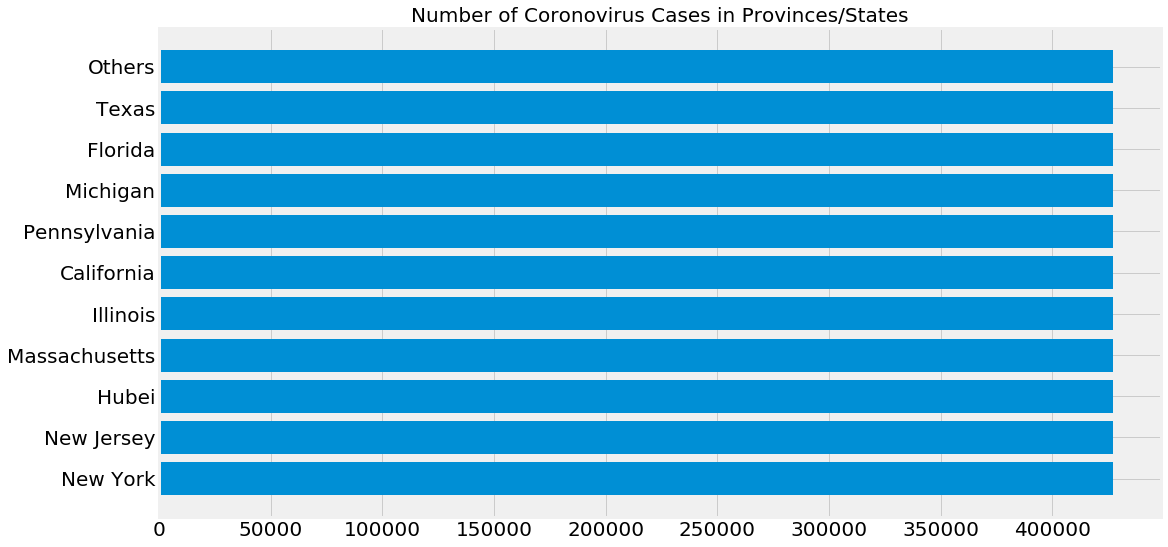

In [106]:
plot_bar_graphs(visual_unique_provinces,visual_confirmed_cases2,'Number of Coronovirus Cases in Provinces/States')

In [131]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = []
    
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases>0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)
            
    for i in no_cases:
            regions.remove(i)
    
    regions = [k for k,v in sorted(zip(regions, confirmed_cases),key=operator.itemgetter(1),reverse=True)]
        
    
    for i in range(len(regions)):
            confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()
            
    if(len(regions)>10):
            regions_10 = regions[:10]
            regions_10.append('Others')
            confirmed_cases_10 = confirmed_cases[:10]
            confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
            plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions, confirmed_cases, title)   
            

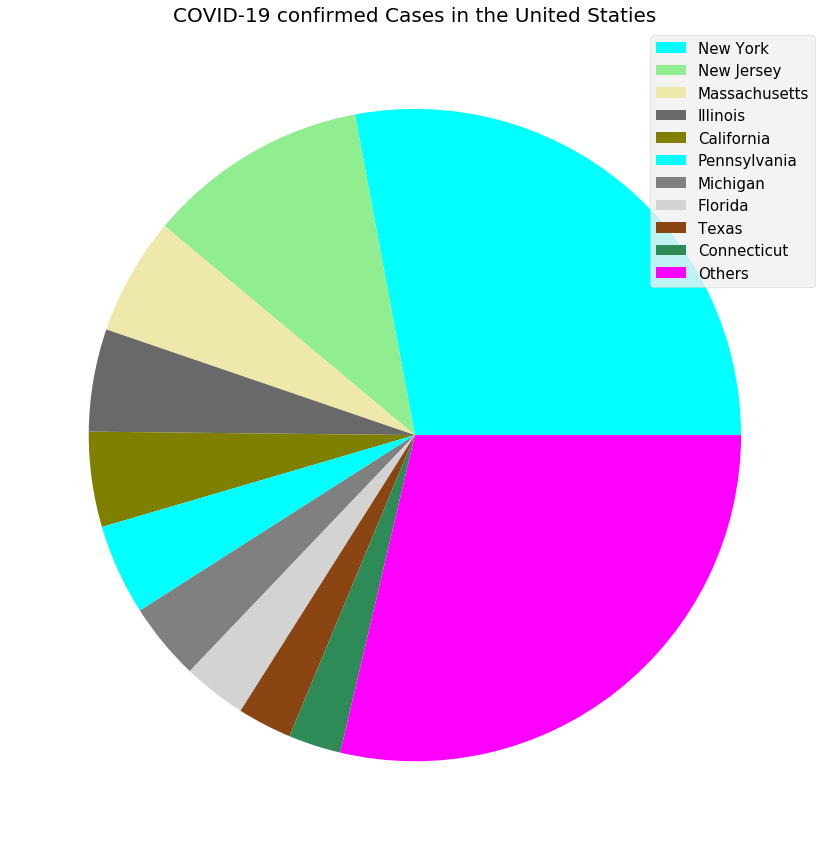

In [132]:
plot_pie_country_with_regions('US','COVID-19 confirmed Cases in the United Staties')

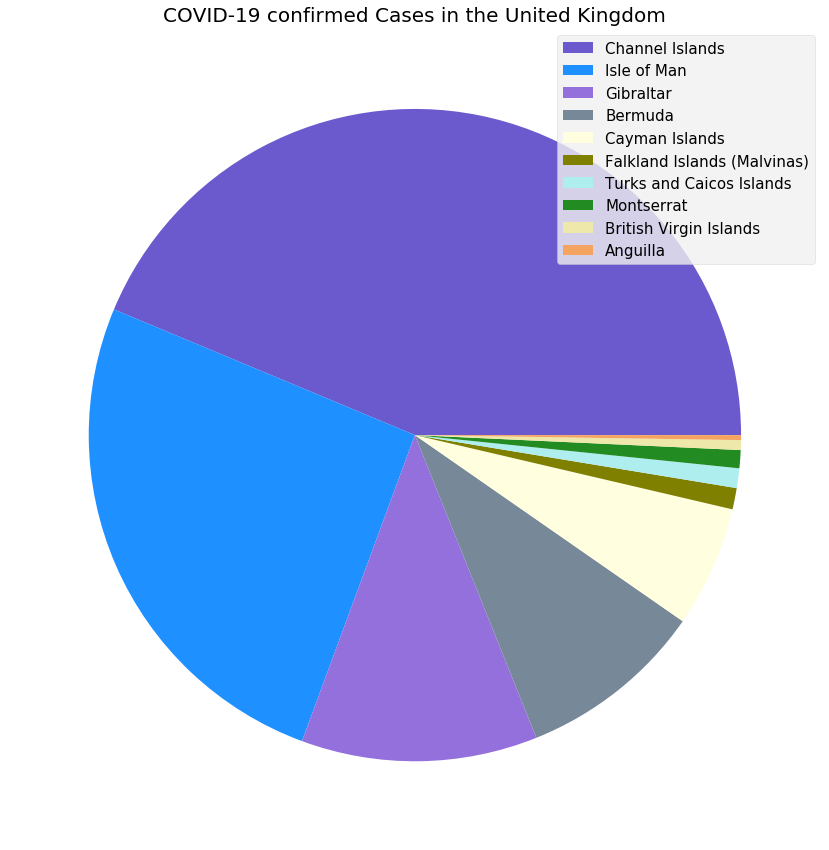

In [135]:
plot_pie_country_with_regions('United Kingdom','COVID-19 confirmed Cases in the United Kingdom')

In [138]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [200]:
days_in_future=20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [145]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    

In [185]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25,shuffle=False)

In [186]:
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [188]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred,y_test_confirmed))

MAE: 401933.40945400816
MSE: 323951727304.22614


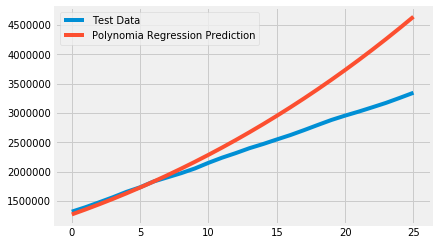

In [189]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data','Polynomia Regression Prediction'])

In [191]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 552719.9968651427
MSE: 628798355392.8613


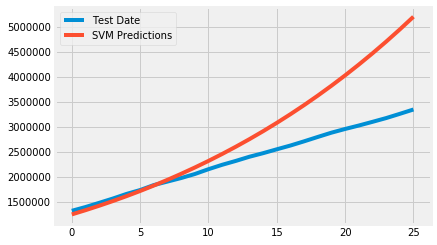

In [194]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Date','SVM Predictions'])
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred,y_test_confirmed))

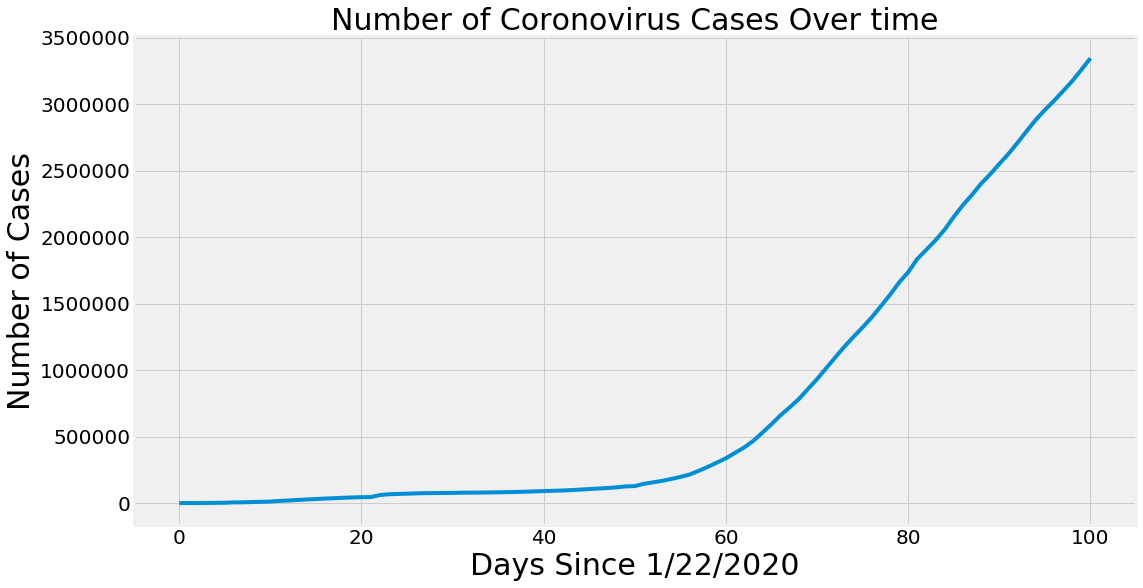

In [203]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronovirus Cases Over time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

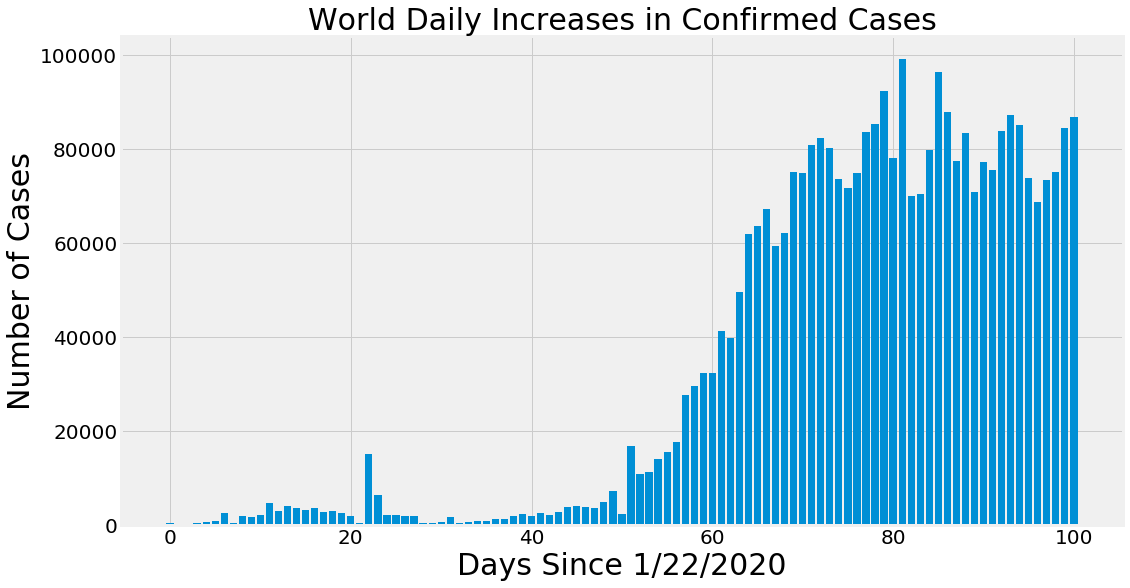

In [217]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [219]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

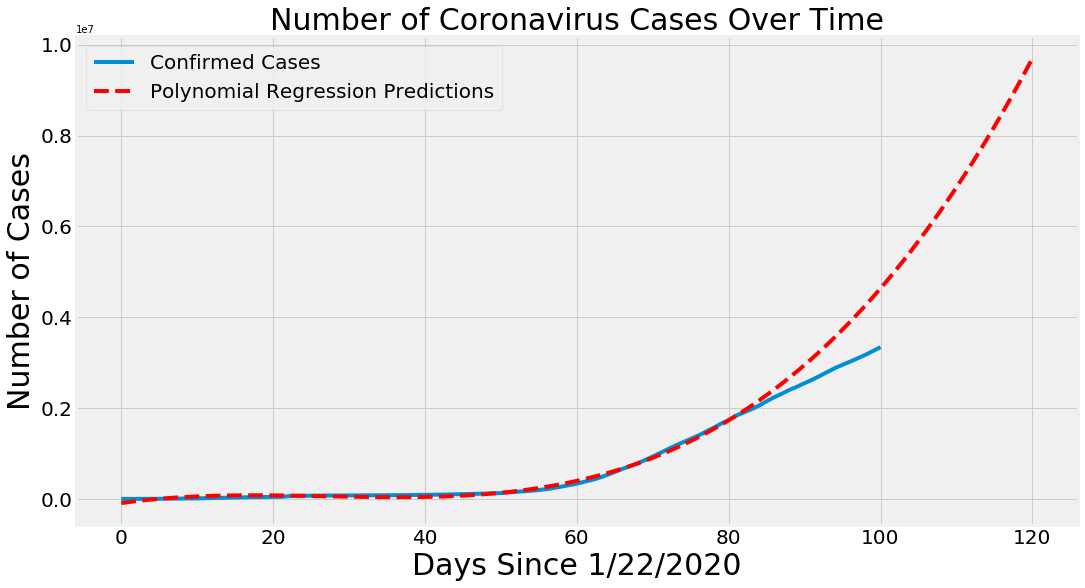

In [220]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'red')

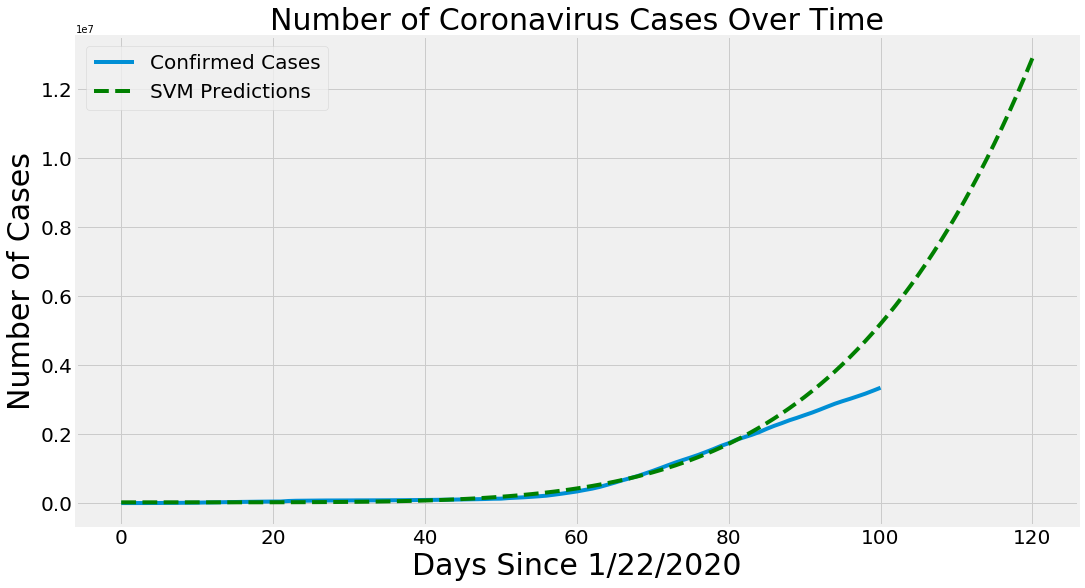

In [221]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'green')

In [222]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases Worldwide': np.round(linear_pred[-20:])})
poly_df

,Date,Predicted number of Confirmed Cases Worldwide
0,05/02/2020,4833711.0
1,05/03/2020,5036264.0
2,05/04/2020,5244370.0
3,05/05/2020,5458104.0
4,05/06/2020,5677539.0
5,05/07/2020,5902748.0
6,05/08/2020,6133807.0
7,05/09/2020,6370789.0
8,05/10/2020,6613767.0
9,05/11/2020,6862816.0


In [223]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-20:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,05/02/2020,5458950.0
1,05/03/2020,5733497.0
2,05/04/2020,6019024.0
3,05/05/2020,6315858.0
4,05/06/2020,6624331.0
5,05/07/2020,6944781.0
6,05/08/2020,7277555.0
7,05/09/2020,7623004.0
8,05/10/2020,7981487.0
9,05/11/2020,8353370.0


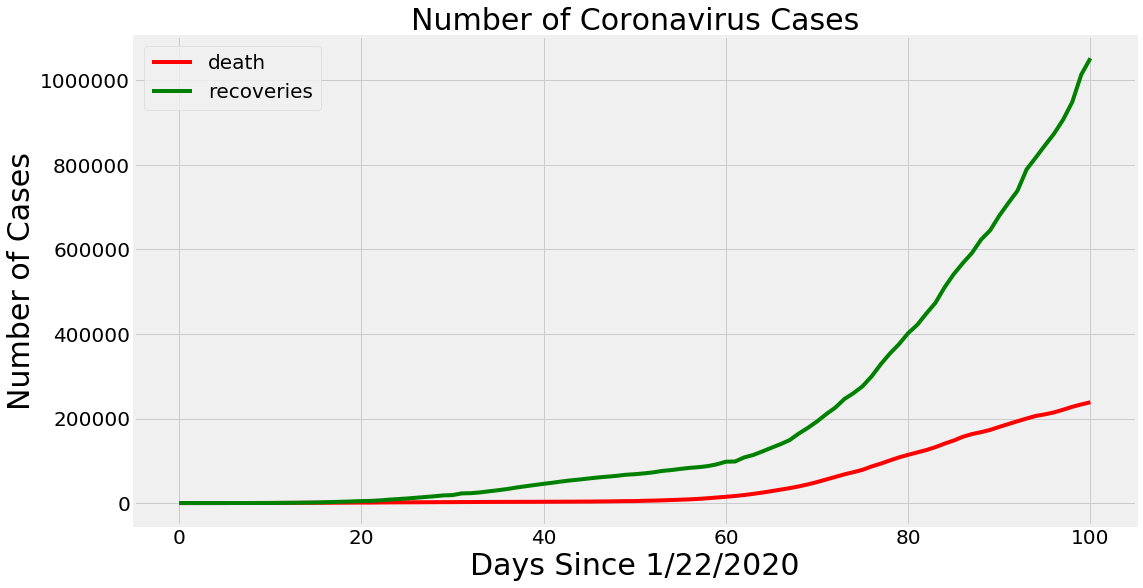

In [224]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

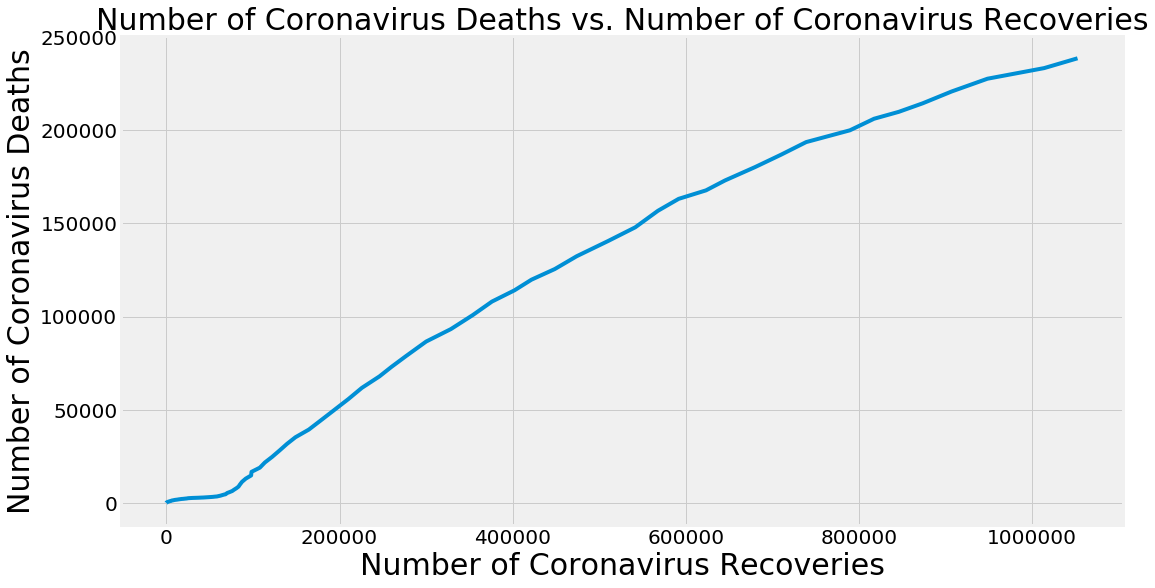

In [225]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [226]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

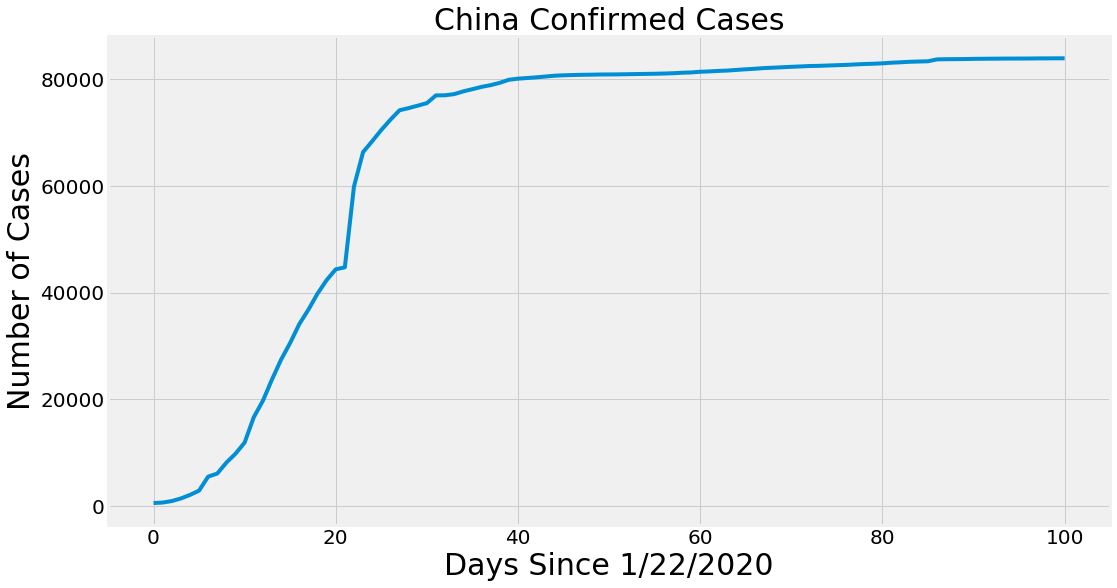

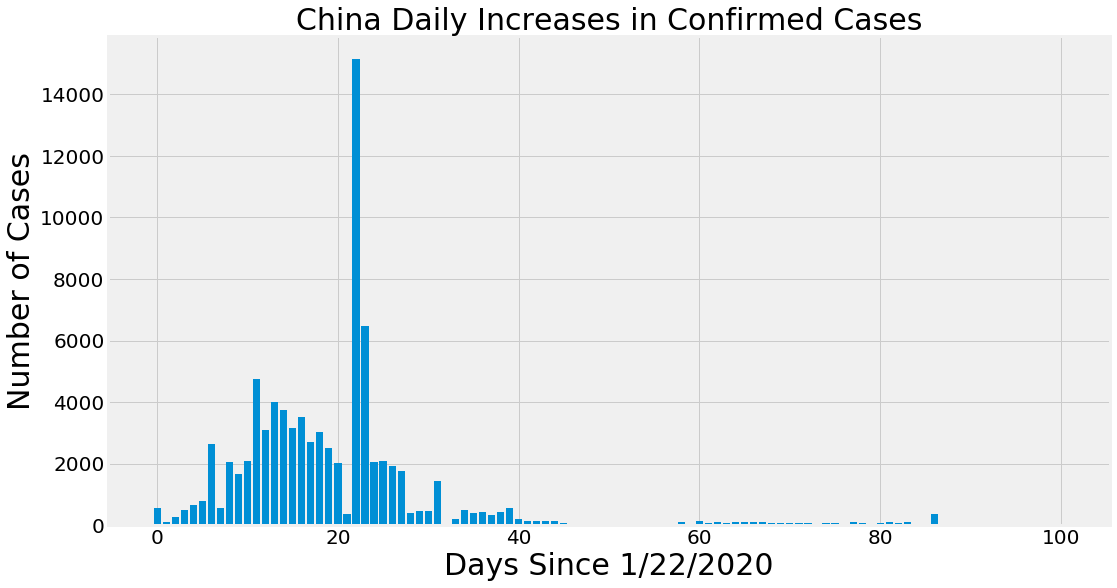

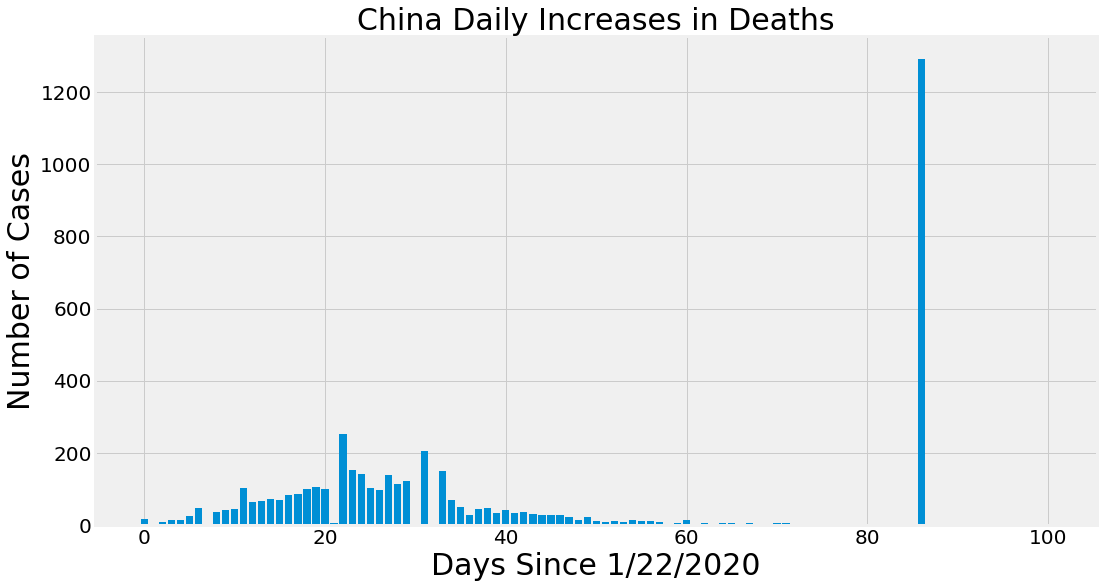

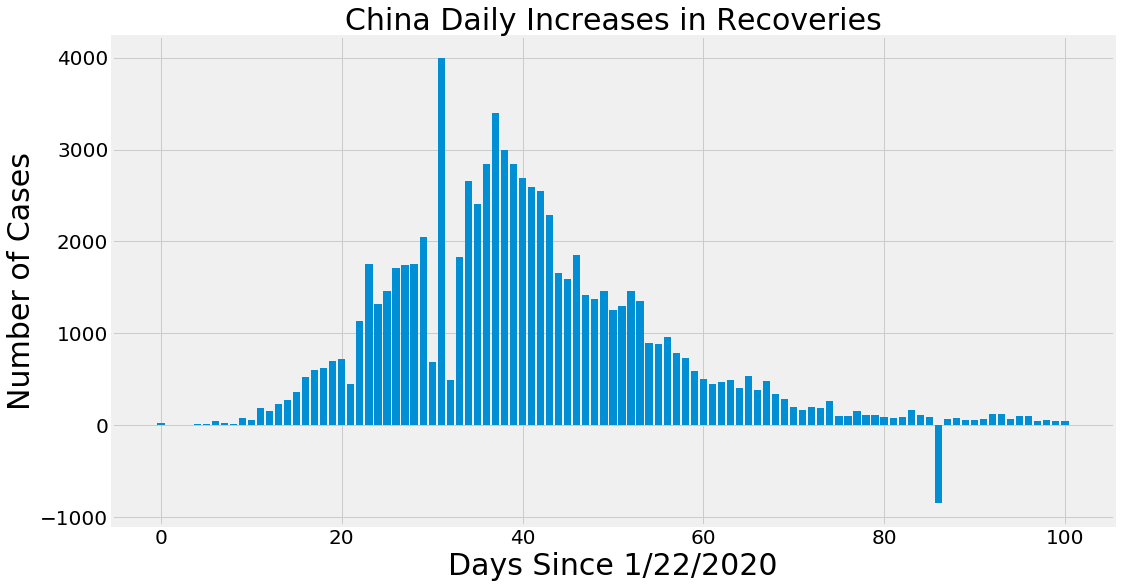

In [230]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

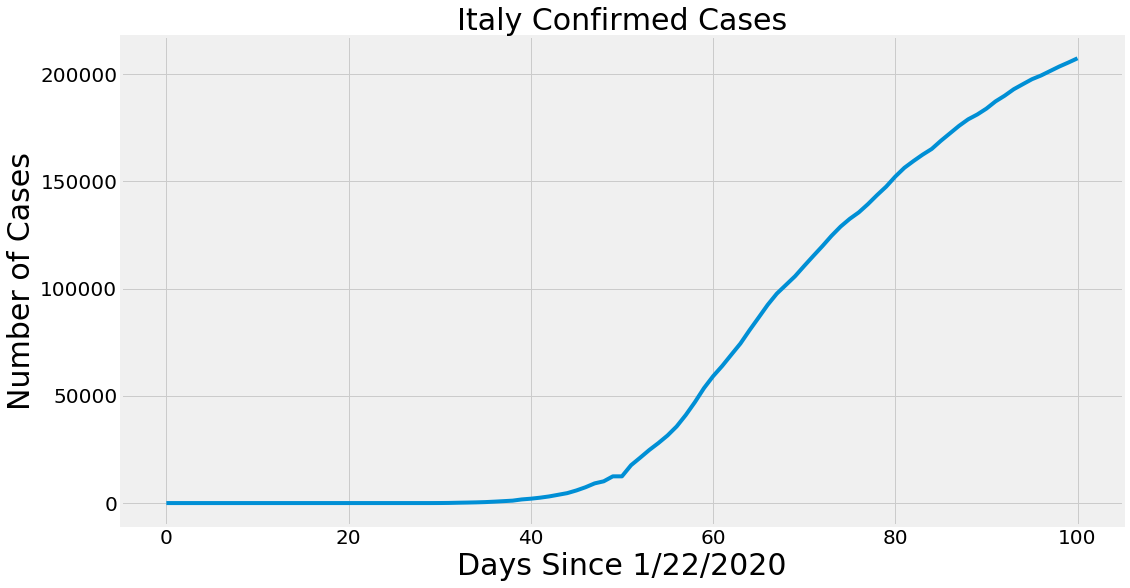

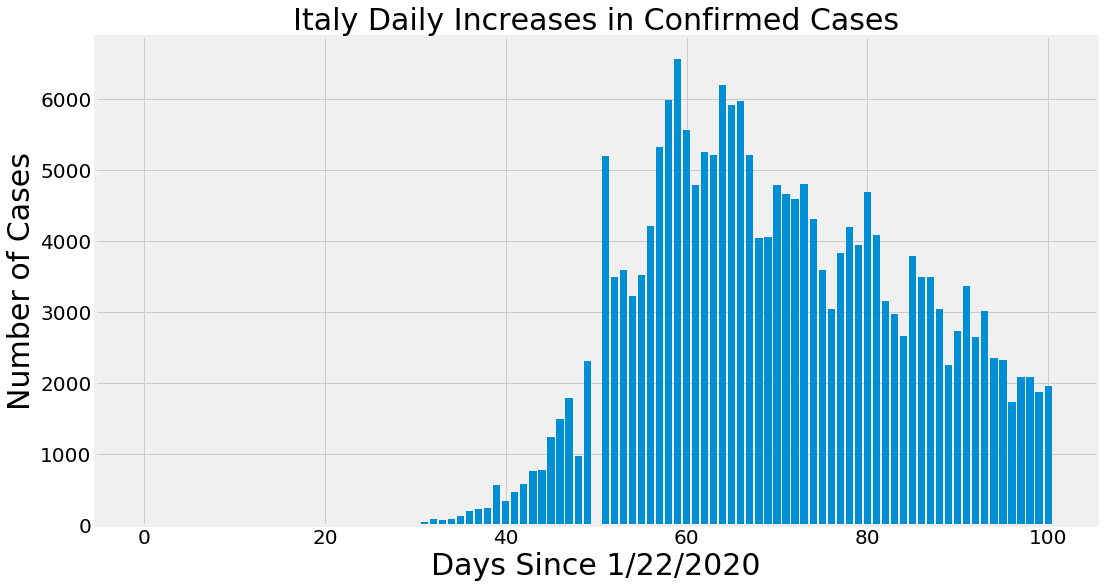

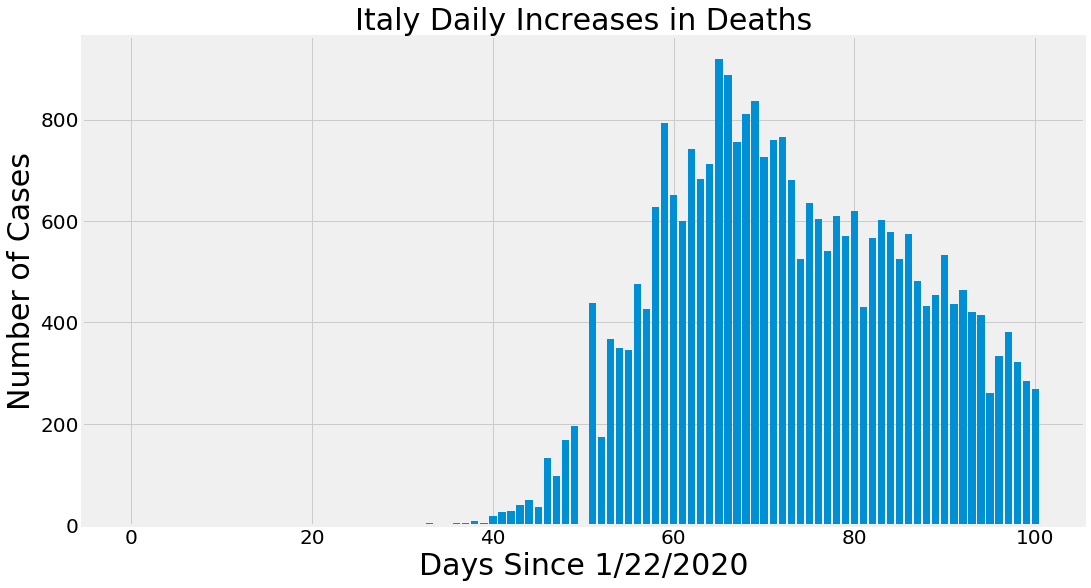

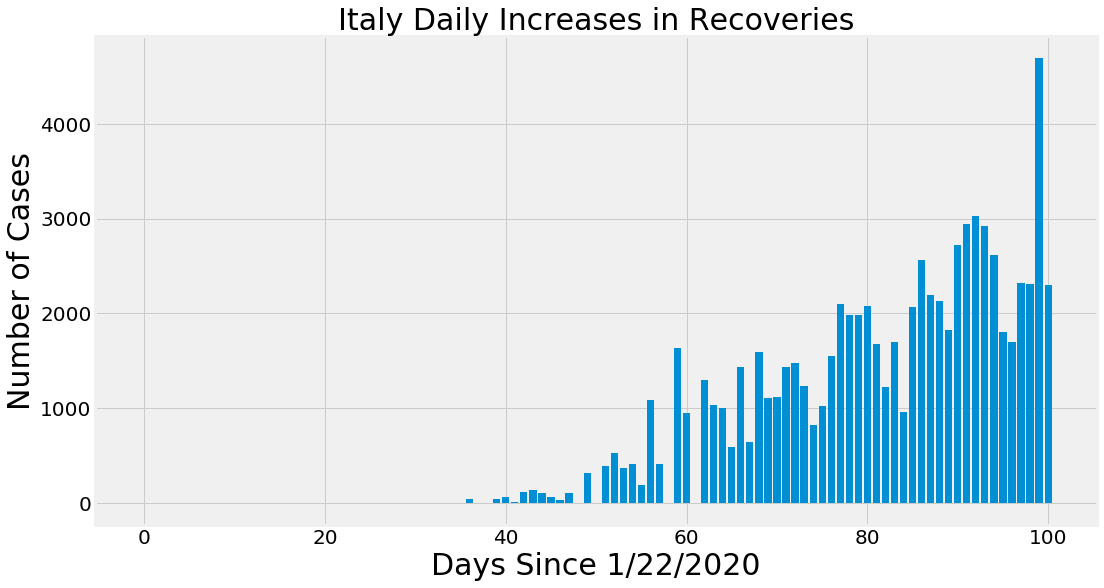

In [229]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

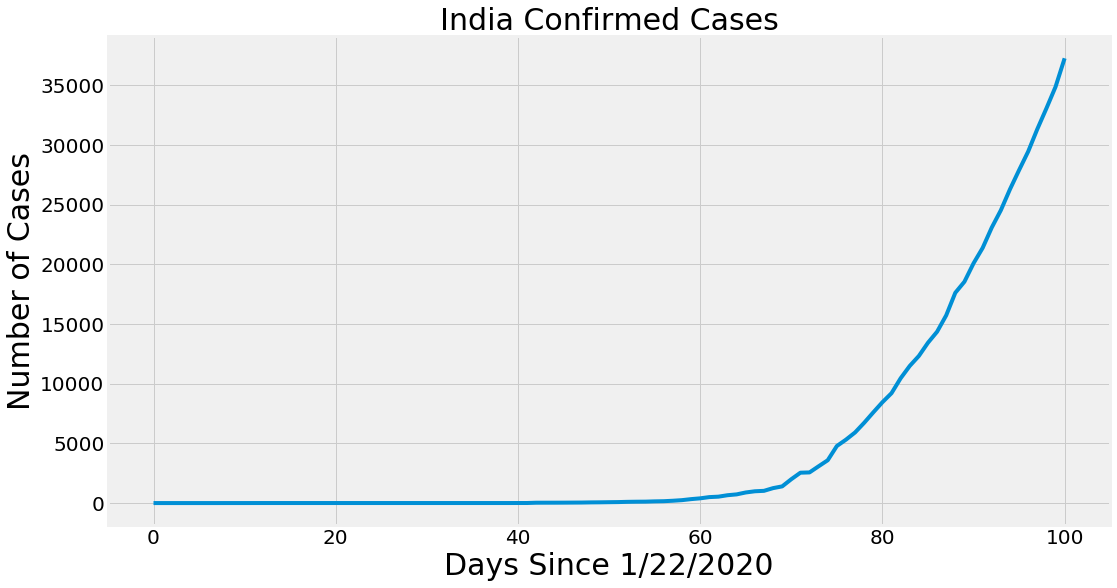

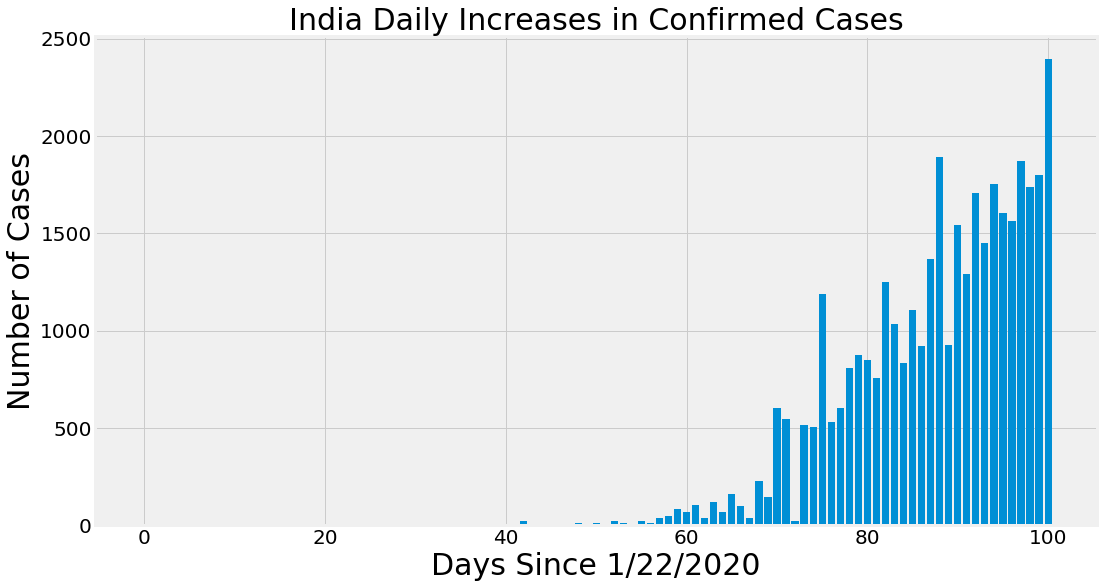

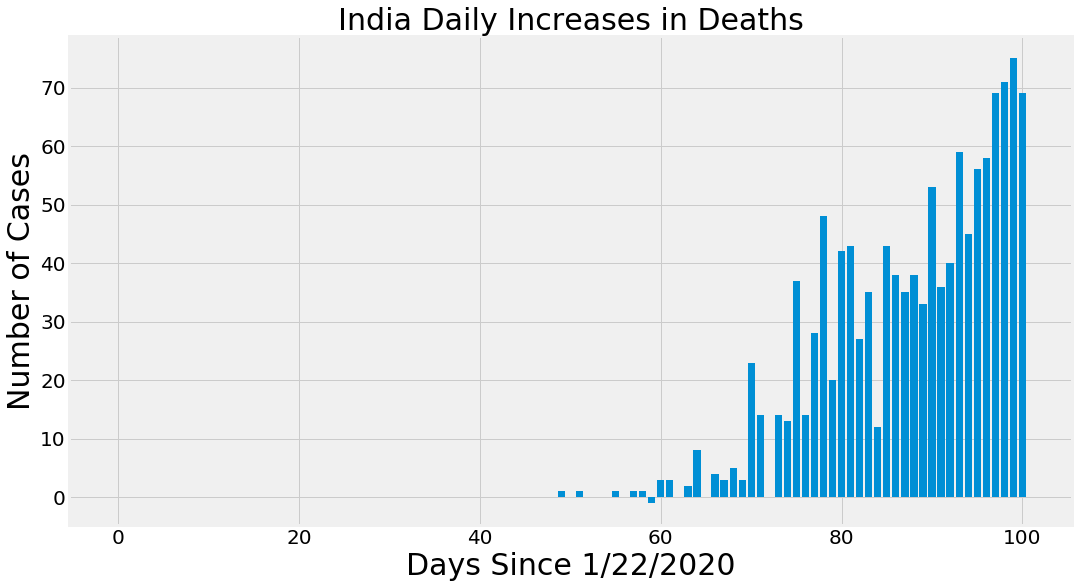

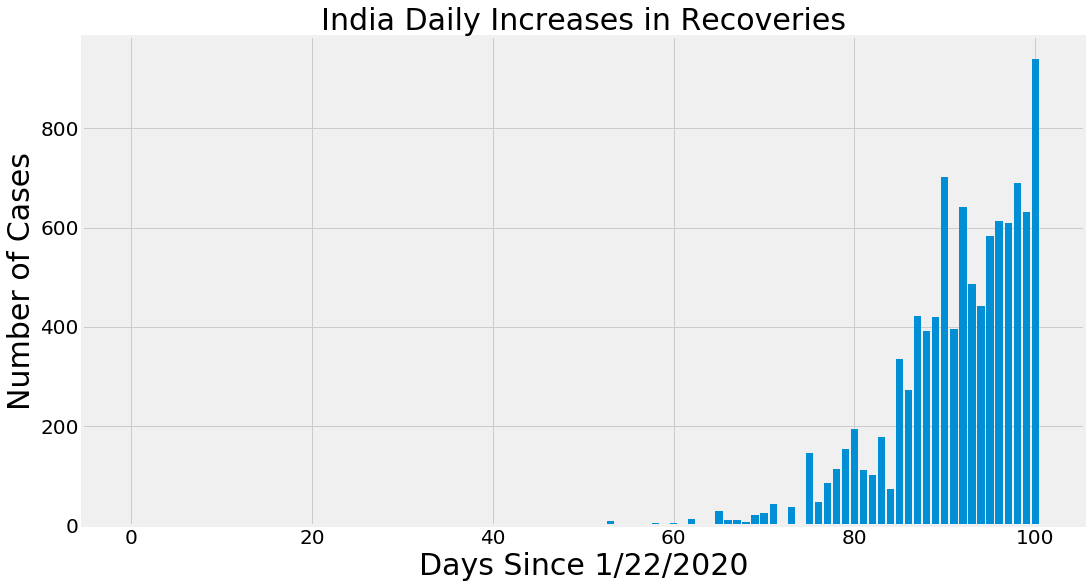

In [231]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

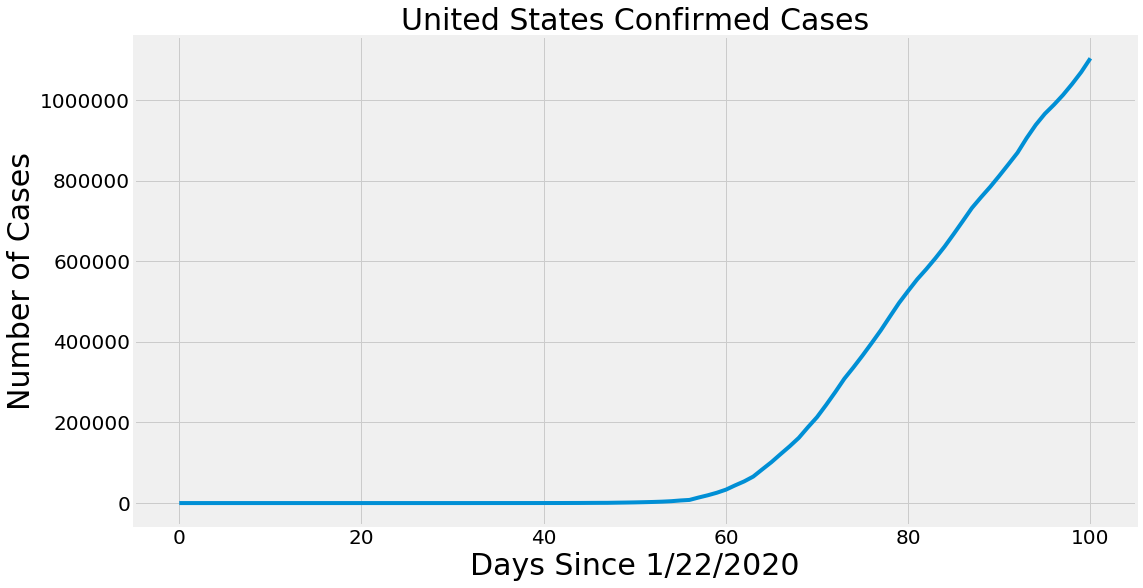

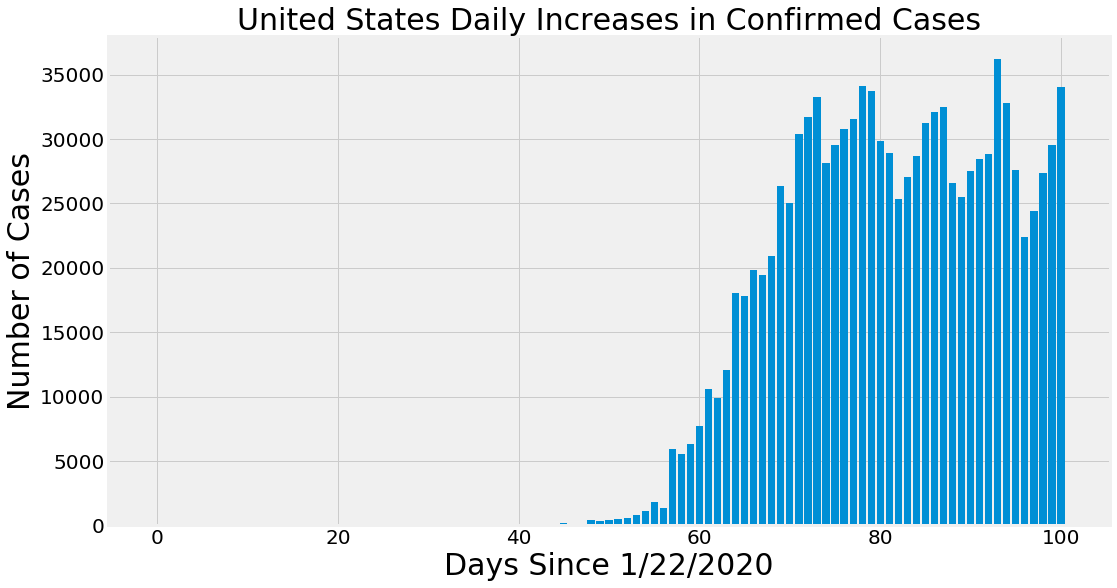

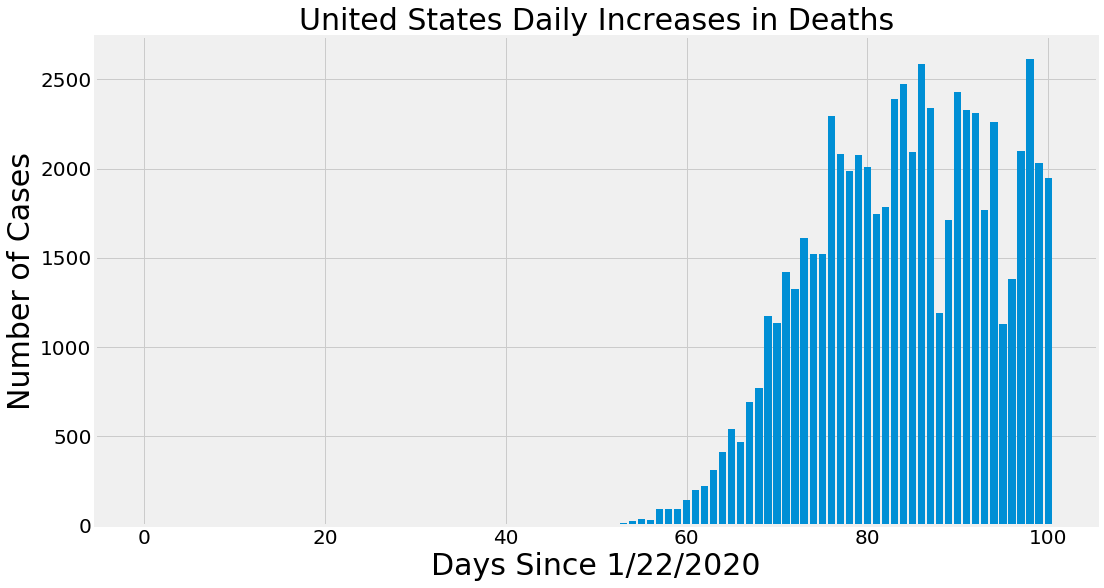

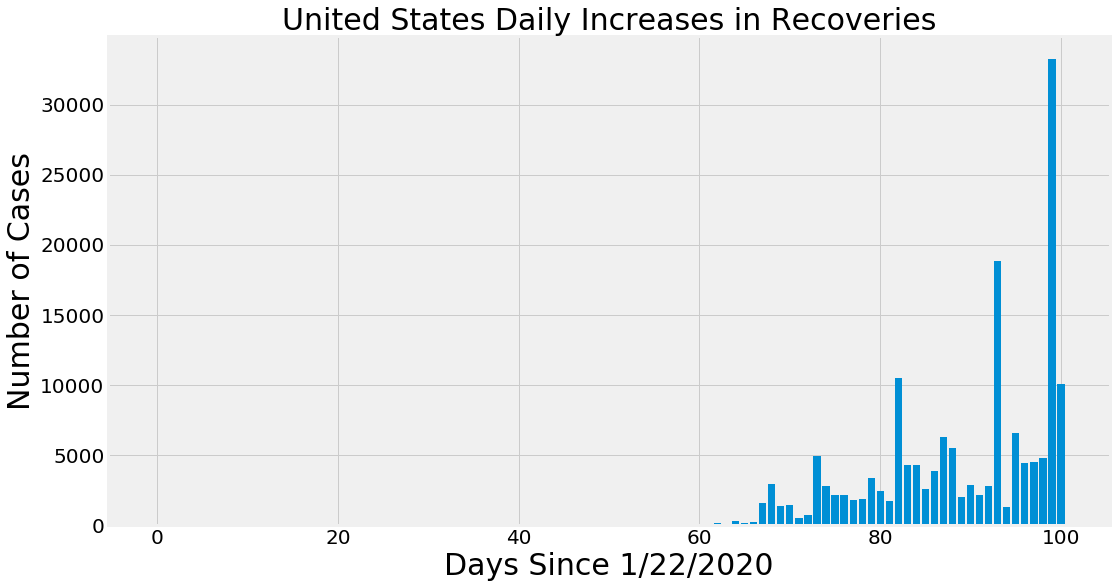

In [232]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

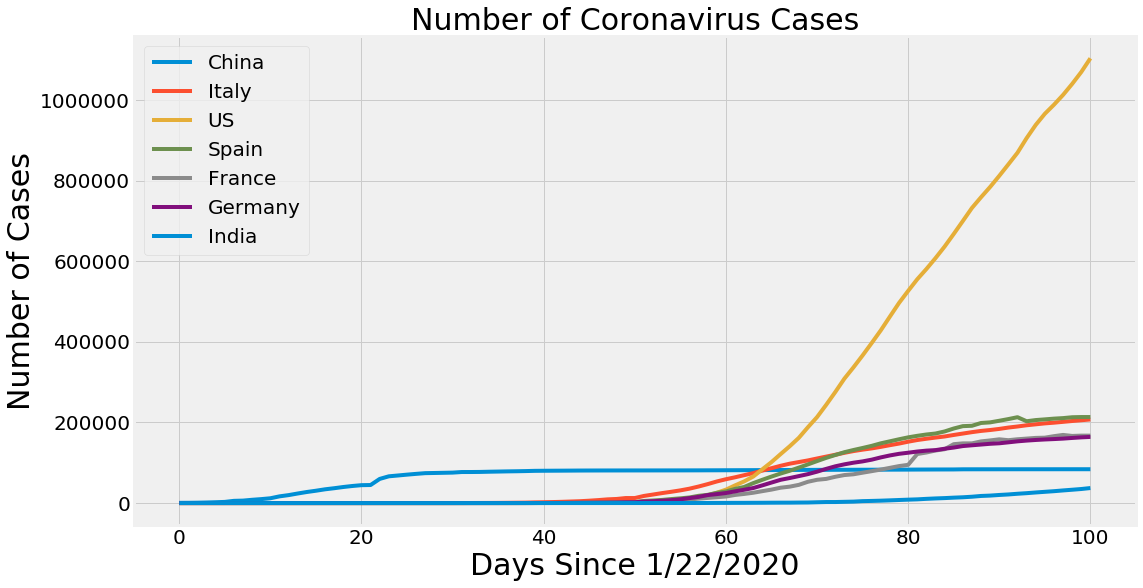

In [253]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

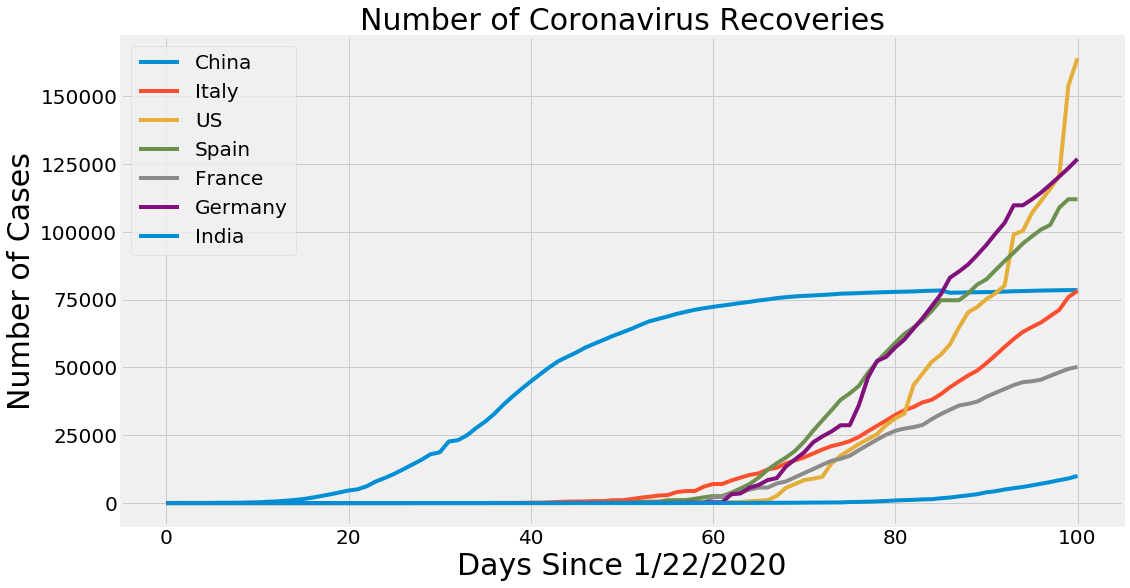

In [257]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

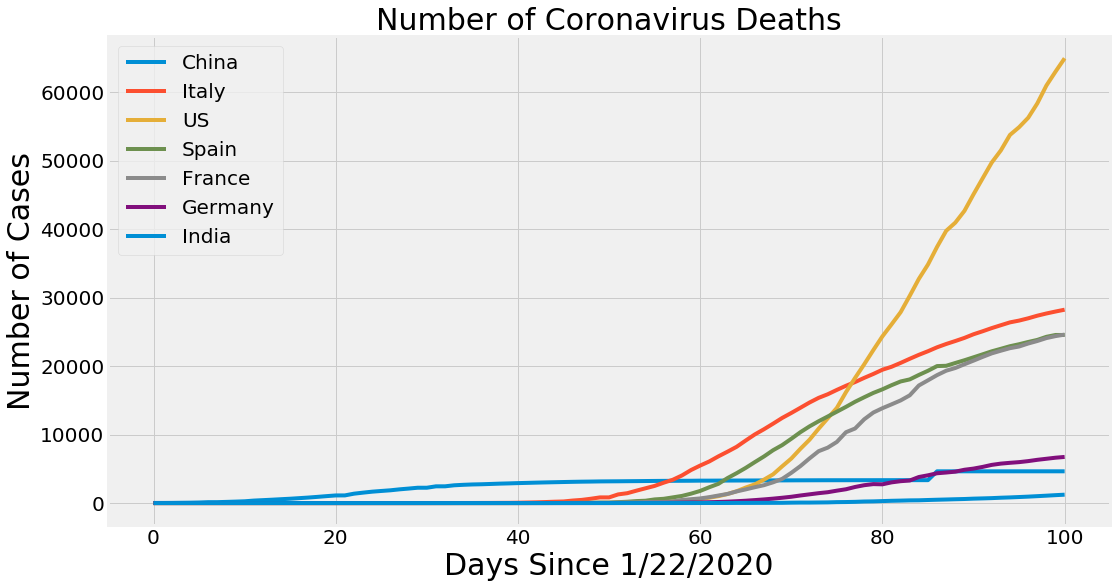

In [256]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)
plt.plot(adjusted_dates, india_deaths)
plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()